MATHEMATICAL GENERATIVE ART SYSTEMS
====================================
A comprehensive implementation of 12 proven mathematical systems for high-impact generative art.
Suitable for NFTs, on-chain provenance, and artistic exploration.

----------------------------------------------------------------------------------------------------
Author: Willy
Date: 2025
Python Version: 3.8+
----------------------------------------------------------------------------------------------------
Required Libraries:
    pip install numpy matplotlib scipy pillow
----------------------------------------------------------------------------------------------------

#### Each system includes:
    - Object-oriented design
    - Deterministic seed-based generation
    - Static image generation
    - Animation support
    - Parameter-based rarity

# Imports

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LinearSegmentedColormap
from scipy.spatial import Voronoi, Delaunay, voronoi_plot_2d
from scipy.ndimage import convolve
import warnings
from matplotlib import gridspec
from IPython.display import Image, display, HTML

In [19]:
warnings.filterwarnings('ignore')

# Set style for all visualizations
plt.style.use('dark_background')

# ============================================================================
# 1. CELLULAR AUTOMATA - Rule-Based Emergence
# ============================================================================

In [20]:
class CellularAutomata:
    """
    Conway's Game of Life and generalized cellular automata.
    
    Minimal rules generate maximal emergence: self-replication, oscillators,
    and complex organic patterns from simple initial conditions.
    
    Attributes:
        size (int): Grid dimension (size x size)
        seed (int): Random seed for reproducibility
        grid (ndarray): Current state of the automaton
    """
    
    def __init__(self, size=200, seed=42):
        """
        Initialize cellular automaton with random state.
        
        Args:
            size (int): Grid dimension
            seed (int): Random seed for deterministic generation
        """
        self.size = size
        self.seed = seed
        np.random.seed(seed)
        # Random initialization with 30% alive cells
        self.grid = np.random.choice([0, 1], size=(size, size), p=[0.7, 0.3])
        self.history = [self.grid.copy()]

    def count_neighbors(self, grid):
        """
        Count live neighbors for each cell using convolution.
        
        Args:
            grid (ndarray): Current grid state
            
        Returns:
            ndarray: Neighbor counts for each cell
        """
        kernel = np.array([[1, 1, 1],
                          [1, 0, 1],
                          [1, 1, 1]])
        
        return convolve(grid, kernel, mode="constant", cval=0)
    
    def step(self):
        """
        Execute one step of Conway's Game of Life.
        
        Rules:
            - Live cell with 2-3 neighbors survives
            - Dead cell with exactly 3 neighbors becomes alive
            - All other cells die or stay dead
        """
        neighbors = self.count_neighbors(self.grid)
        # Birth: dead cells with 3 neighbors
        birth = (self.grid == 0) & (neighbors == 3)
        # Survival: live cells with 2-3 neighbors
        survive = (self.grid == 1) & ((neighbors == 2) | (neighbors == 3))
        self.grid = (birth | survive).astype(int)
        self.history.append(self.grid.copy())


    def generate_static(self, steps=100, filename="ca_static.png"):
        """
        Generate static image after evolution.
        
        Args:
            steps (int): Number of evolution steps
            filename (str): Output filename
        """
        for _ in range(steps):
            self.step()
        
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.imshow(self.grid, cmap="hot", interpolation="nearest")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        
        plt.close()
        print(f"✓ Cellular Automata static saved: {filename}")
    
    def generate_animation(self, steps=200, filename="ca_animation.gif"):
        """
        Generate animated evolution of cellular automaton.
        
        Args:
            steps (int): Number of frames
            filename (str): Output filename
        """
        fig, ax = plt.subplots(figsize=(8, 8), facecolor="black")
        ax.axis("off")
        
        im = ax.imshow(self.grid, cmap="hot", interpolation="nearest")
        
        def update(frame):
            self.step()
            im.set_array(self.grid)
            ax.set_title(f"Generation {frame}", color="white", fontsize=14)
            return [im]
        
        anim = FuncAnimation(fig, update, frames=steps, interval=50, blit=True)
        anim.save(filename, writer=PillowWriter(fps=20))
        
        plt.close()
        print(f"✓ Cellular Automata animation saved: {filename}")

# ============================================================================
# 2. L-SYSTEMS - Formal Grammars → Organic Growth
# ============================================================================

In [21]:
class LSystem:
    """
    Lindenmayer System for generating organic, self-similar structures.
    
    String rewriting rules create botanical realism and fractal architectures.
    Rules grow, not pixels.
    
    Attributes:
        axiom (str): Starting string
        rules (dict): Production rules for symbol replacement
        angle (float): Turning angle in degrees
        iterations (int): Number of rewriting iterations
    """
    
    def __init__(self, axiom="F", rules=None, angle=25, iterations=5):
        """
        Initialize L-System with grammar rules.
        
        Args:
            axiom (str): Starting symbol(s)
            rules (dict): Rewriting rules {symbol: replacement}
            angle (float): Branch angle in degrees
            iterations (int): Recursion depth
        """
        self.axiom = axiom
        self.rules = rules or {"F": "F[+F]F[-F]F"}
        self.angle = angle
        self.iterations = iterations
        self.string = axiom

    def generate_string(self):
        """
        Apply production rules iteratively to generate L-system string.
        
        Returns:
            str: Final string after all iterations
        """
        current = self.axiom
        for _ in range(self.iterations):
            next_string = ""
            for char in current:
                next_string += self.rules.get(char, char)
            current = next_string
        self.string = current
        
        return current

    def draw(self, ax, start_pos=(0, 0), start_angle=90, step_length=5):
        """
        Interpret L-system string as turtle graphics commands.
        
        Commands:
            F: Move forward and draw
            +: Turn right by angle
            -: Turn left by angle
            [: Push state (position, angle)
            ]: Pop state
            
        Args:
            ax: Matplotlib axis
            start_pos (tuple): Starting (x, y)
            start_angle (float): Initial heading in degrees
            step_length (float): Distance per 'F' command
        """
        x, y = start_pos
        angle = start_angle
        stack = []
        
        for cmd in self.string:
            if cmd == "F":
                # Draw line forward
                x_new = x + step_length * np.cos(np.radians(angle))
                y_new = y + step_length * np.sin(np.radians(angle))
                ax.plot([x, x_new], [y, y_new], "g-", linewidth=0.5, alpha=0.8)
                x, y = x_new, y_new
            elif cmd == "+":
                angle -= self.angle
            elif cmd == "-":
                angle += self.angle
            elif cmd == "[":
                stack.append((x, y, angle))
            elif cmd == "]":
                if stack:
                    x, y, angle = stack.pop()
    
    def generate_static(self, filename="lsystem_static.png"):
        """
        Generate static L-system structure.
        
        Args:
            filename (str): Output filename
        """
        self.generate_string()
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        
        # Plot Voronoi regions
        for region in vor.regions:
            if not -1 in region and len(region) > 0:
                polygon = [vor.vertices[i] for i in region]
                ax.fill(*zip(*polygon), alpha=0.6, 
                       edgecolor="cyan", linewidth=2,
                       facecolor=np.random.rand(3,))
        
        # Plot seed points
        ax.plot(self.points[:, 0], self.points[:, 1], "wo", markersize=5)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Voronoi static saved: {filename}")
    
    def update_points(self):
        """Update point positions with boundary wrapping."""
        self.points += self.velocities
        self.points = self.points % 1.0  # Wrap around boundaries
    
    def generate_animation(self, filename="voronoi_animation.gif", frames=100):
        """
        Animate drifting Voronoi cells.
        
        Args:
            filename (str): Output filename
            frames (int): Number of frames
        """
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis("off")
        
        def update(frame):
            ax.clear()
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")
            
            self.update_points()
            vor = Voronoi(self.points)
            
            for region in vor.regions:
                if not -1 in region and len(region) > 0:
                    polygon = [vor.vertices[i] for i in region]
                    ax.fill(*zip(*polygon), alpha=0.6,
                           edgecolor="cyan", linewidth=1,
                           facecolor=np.random.rand(3,))
            
            ax.plot(self.points[:, 0], self.points[:, 1], "wo", markersize=3)
            ax.set_title(f"Frame {frame}", color="white", fontsize=14)
        
        anim = FuncAnimation(fig, update, frames=frames, interval=50)
        anim.save(filename, writer=PillowWriter(fps=20))
        plt.close()
        
        print(f"✓ Voronoi animation saved: {filename}")

# ============================================================================
# 3. STRANGE ATTRACTORS - Chaos with Memory
# ============================================================================

In [22]:
class StrangeAttractor:
    """
    Deterministic chaos generators producing continuous, flowing signature shapes.
    
    Parameter sets define rarity layers; slight variations create entirely
    different structures. Perfect for cosmic sculptures and energy fields.
    
    Attributes:
        attractor_type (str): Type of attractor (lorenz, clifford, aizawa)
        params (dict): Parameters defining the specific attractor
        points (ndarray): Generated trajectory points
    """
    
    def __init__(self, attractor_type='lorenz', seed=42, **params):
        """
        Initialize strange attractor system.
        
        Args:
            attractor_type (str): 'lorenz', 'clifford', or 'aizawa'
            seed (int): Random seed for initial conditions
            **params: Attractor-specific parameters
        """
        self.attractor_type = attractor_type
        self.seed = seed
        np.random.seed(seed)
        
        # Default parameters
        if attractor_type == "lorenz":
            self.params = {"sigma": 10, "rho": 28, "beta": 8/3}
        elif attractor_type == 'clifford':
            self.params = {"a": -1.4, "b": 1.6, "c": 1.0, "d": 0.7}
        elif attractor_type == 'aizawa':
            self.params = {"a": 0.95, "b": 0.7, "c": 0.6, "d": 3.5, "e": 0.25, "f": 0.1}
        
        self.params.update(params)
        self.points = None
    
    def lorenz(self, xyz, t):
        """
        Lorenz system differential equations.
        
        Args:
            xyz (tuple): Current (x, y, z) position
            t (float): Time (unused, for ODE compatibility)
            
        Returns:
            ndarray: Derivatives (dx/dt, dy/dt, dz/dt)
        """
        x, y, z = xyz
        sigma, rho, beta = self.params["sigma"], self.params["rho"], self.params["beta"]
        return np.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
    
    def clifford(self, xy):
        """
        Clifford attractor map (2D iterative map).
        
        Args:
            xy (tuple): Current (x, y) position
            
        Returns:
            ndarray: Next (x, y) position
        """
        x, y = xy
        a, b, c, d = self.params["a"], self.params["b"], self.params["c"], self.params["d"]
        return np.array([
            np.sin(a * y) + c * np.cos(a * x),
            np.sin(b * x) + d * np.cos(b * y)
        ])
    
    def aizawa(self, xyz, t):
        """
        Aizawa attractor differential equations.
        
        Args:
            xyz (tuple): Current (x, y, z) position
            t (float): Time
            
        Returns:
            ndarray: Derivatives
        """
        x, y, z = xyz
        a, b, c, d, e, f = [self.params[k] for k in ["a", "b", "c", "d", "e", "f"]]
        return np.array([
            (z - b) * x - d * y,
            d * x + (z - b) * y,
            c + a * z - (z**3 / 3) - (x**2 + y**2) * (1 + e * z) + f * z * x**3
        ])
    
    def generate_points(self, num_points=100000, dt=0.01):
        """
        Generate attractor trajectory points.
        
        Args:
            num_points (int): Number of points to generate
            dt (float): Time step for integration
            
        Returns:
            ndarray: Array of trajectory points
        """
        if self.attractor_type == "clifford":
            # Iterative 2D map
            points = np.zeros((num_points, 2))
            points[0] = np.random.randn(2) * 0.1
            for i in range(1, num_points):
                points[i] = self.clifford(points[i-1])
            self.points = points
        else:
            # 3D continuous system (Euler integration)
            points = np.zeros((num_points, 3))
            points[0] = np.random.randn(3)
            
            func = self.lorenz if self.attractor_type == "lorenz" else self.aizawa
            
            for i in range(1, num_points):
                points[i] = points[i-1] + func(points[i-1], i*dt) * dt
            
            self.points = points
        
        return self.points
    
    def generate_static(self, filename="attractor_static.png"):
        """
        Generate static visualization of attractor.
        
        Args:
            filename (str): Output filename
        """
        if self.points is None:
            self.generate_points()
        
        fig = plt.figure(figsize=(12, 12), facecolor="black")
        
        if self.points.shape[1] == 2:
            ax = fig.add_subplot(111)
            ax.scatter(self.points[:, 0], self.points[:, 1], 
                      c=np.arange(len(self.points)), cmap="plasma", 
                      s=0.1, alpha=0.6)
        else:
            ax = fig.add_subplot(111, projection="3d", facecolor="black")
            ax.plot(self.points[:, 0], self.points[:, 1], self.points[:, 2],
                   linewidth=0.1, alpha=0.6, color="cyan")
            ax.set_facecolor("black")
        
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Strange Attractor ({self.attractor_type}) static saved: {filename}")
    
    def generate_animation(self, filename="attractor_animation.gif"):
        """
        Animate attractor evolution and rotation.
        
        Args:
            filename (str): Output filename
        """
        if self.points is None:
            self.generate_points(num_points=5000)
        
        fig = plt.figure(figsize=(10, 10), facecolor="black")
        
        if self.points.shape[1] == 3:
            ax = fig.add_subplot(111, projection="3d", facecolor="black")
            ax.set_facecolor("black")
            
            line, = ax.plot([], [], [], linewidth=0.5, color="cyan", alpha=0.6)
            
            def update(frame):
                idx = min(frame * 50, len(self.points))
                line.set_data(self.points[:idx, 0], self.points[:idx, 1])
                line.set_3d_properties(self.points[:idx, 2])
                ax.view_init(elev=20, azim=frame*2)
                return line,
            
            anim = FuncAnimation(fig, update, frames=100, interval=50, blit=True)
        else:
            ax = fig.add_subplot(111)
            scatter = ax.scatter([], [], s=0.5, c=[], cmap="plasma", alpha=0.6)
            ax.set_xlim(self.points[:, 0].min(), self.points[:, 0].max())
            ax.set_ylim(self.points[:, 1].min(), self.points[:, 1].max())
            ax.axis("off")
            
            def update(frame):
                idx = min(frame * 100, len(self.points))
                scatter.set_offsets(self.points[:idx])
                scatter.set_array(np.arange(idx))
                return scatter,
            
            anim = FuncAnimation(fig, update, frames=100, interval=50, blit=True)
        
        anim.save(filename, writer=PillowWriter(fps=20))
        plt.close()
        print(f"✓ Strange Attractor animation saved: {filename}")


# ============================================================================
# 4. FRACTALS - Infinite Detail, Finite Rules
# ============================================================================

In [23]:
class Fractal:
    """
    Mandelbrot, Julia sets, and variants with infinite zoom capability.
    
    Every zoom depth creates a new asset. Perfect for cosmic terrains
    and psychedelic worlds. Structure emerges without repetition.
    
    Attributes:
        fractal_type (str): Type of fractal
        width, height (int): Image dimensions
        max_iter (int): Maximum iteration depth
    """
    
    def __init__(self, fractal_type="mandelbrot", width=800, height=800, max_iter=256):
        """
        Initialize fractal generator.
        
        Args:
            fractal_type (str): 'mandelbrot', 'julia', or 'burning_ship'
            width (int): Image width
            height (int): Image height
            max_iter (int): Maximum iterations for escape time
        """
        self.fractal_type = fractal_type
        self.width = width
        self.height = height
        self.max_iter = max_iter
        self.image = None
    
    def mandelbrot(self, c, max_iter):
        """
        Compute Mandelbrot set escape time for complex number c.
        
        Args:
            c (complex): Complex number to test
            max_iter (int): Maximum iterations
            
        Returns:
            int: Iteration count at escape (or max_iter)
        """
        z = 0
        for n in range(max_iter):
            if abs(z) > 2:
                return n
            z = z*z + c
        return max_iter
    
    def julia(self, z, c, max_iter):
        """
        Compute Julia set escape time.
        
        Args:
            z (complex): Starting point
            c (complex): Julia set parameter
            max_iter (int): Maximum iterations
            
        Returns:
            int: Iteration count at escape
        """
        for n in range(max_iter):
            if abs(z) > 2:
                return n
            z = z*z + c
        return max_iter
    
    def burning_ship(self, c, max_iter):
        """
        Compute Burning Ship fractal escape time.
        
        Args:
            c (complex): Complex number to test
            max_iter (int): Maximum iterations
            
        Returns:
            int: Iteration count at escape
        """
        z = 0
        for n in range(max_iter):
            if abs(z) > 2:
                return n
            # Key difference: take absolute values before squaring
            z = (abs(z.real) + 1j * abs(z.imag))**2 + c
        return max_iter
    
    def generate(self, xmin=-2.5, xmax=1.5, ymin=-2, ymax=2, c_julia=-0.7+0.27015j):
        """
        Generate fractal image array.
        
        Args:
            xmin, xmax (float): Real axis bounds
            ymin, ymax (float): Imaginary axis bounds
            c_julia (complex): Parameter for Julia set
            
        Returns:
            ndarray: 2D array of escape times
        """
        x = np.linspace(xmin, xmax, self.width)
        y = np.linspace(ymin, ymax, self.height)
        image = np.zeros((self.height, self.width))
        
        for i in range(self.height):
            for j in range(self.width):
                if self.fractal_type == "mandelbrot":
                    c = complex(x[j], y[i])
                    image[i, j] = self.mandelbrot(c, self.max_iter)
                elif self.fractal_type == "julia":
                    z = complex(x[j], y[i])
                    image[i, j] = self.julia(z, c_julia, self.max_iter)
                elif self.fractal_type == "burning_ship":
                    c = complex(x[j], y[i])
                    image[i, j] = self.burning_ship(c, self.max_iter)
        
        self.image = image
        return image
    
    def generate_static(self, filename="fractal_static.png"):
        """
        Generate static fractal image.
        
        Args:
            filename (str): Output filename
        """
        if self.image is None:
            self.generate()
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.imshow(self.image, cmap="hot", extent=[-2.5, 1.5, -2, 2], 
                 interpolation="bilinear")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Fractal ({self.fractal_type}) static saved: {filename}")
    
    def generate_animation(self, filename="fractal_animation.gif"):
        """
        Animate fractal zoom sequence.
        
        Args:
            filename (str): Output filename
        """
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.axis("off")
        
        # Zoom coordinates (targeting interesting region)
        if self.fractal_type == "mandelbrot":
            target_x, target_y = -0.7, 0.0
        else:
            target_x, target_y = 0.0, 0.0
        
        def update(frame):
            zoom = 1.1 ** frame
            width = 4.0 / zoom
            xmin = target_x - width/2
            xmax = target_x + width/2
            ymin = target_y - width/2
            ymax = target_y + width/2
            
            img = self.generate(xmin, xmax, ymin, ymax)
            ax.clear()
            ax.imshow(img, cmap="hot", extent=[xmin, xmax, ymin, ymax])
            ax.axis("off")
            ax.set_title(f"Zoom: {zoom:.1f}x", color="white", fontsize=14)
        
        anim = FuncAnimation(fig, update, frames=50, interval=100)
        anim.save(filename, writer=PillowWriter(fps=10))
        
        plt.close()
        print(f"✓ Fractal animation saved: {filename}")

# ============================================================================
# 5. REACTION-DIFFUSION SYSTEMS - Chemical Art
# ============================================================================

In [24]:
class ReactionDiffusion:
    """
    Gray-Scott reaction-diffusion system simulating chemical pattern formation.
    
    Generates animal skin patterns, coral reefs, and organic textures.
    Perfect for procedural game textures and fashion NFTs.
    
    Attributes:
        size (int): Grid dimension
        Du, Dv (float): Diffusion rates for chemicals U and V
        F, k (float): Feed and kill rates
    """
    
    def __init__(self, size=200, Du=0.16, Dv=0.08, F=0.060, k=0.062, seed=42):
        """
        Initialize reaction-diffusion system with Gray-Scott model.
        
        Args:
            size (int): Grid size
            Du, Dv (float): Diffusion coefficients
            F (float): Feed rate
            k (float): Kill rate
            seed (int): Random seed
        """
        self.size = size
        self.Du = Du
        self.Dv = Dv
        self.F = F
        self.k = k
        np.random.seed(seed)
        
        # Initialize concentrations
        self.U = np.ones((size, size))
        self.V = np.zeros((size, size))
        
        # Add perturbation in center
        n = size // 2
        r = 20
        self.U[n-r:n+r, n-r:n+r] = 0.50
        self.V[n-r:n+r, n-r:n+r] = 0.25
        self.V += np.random.uniform(0, 0.01, (size, size))
    
    def laplacian(self, grid):
        """
        Compute discrete Laplacian for diffusion.
        
        Args:
            grid (ndarray): Concentration grid
            
        Returns:
            ndarray: Laplacian of grid
        """
        kernel = np.array([[0.05, 0.2, 0.05],
                          [0.2, -1.0, 0.2],
                          [0.05, 0.2, 0.05]])
        
        return convolve(grid, kernel, mode="wrap")
    
    def step(self, dt=1.0):
        """
        Execute one time step of Gray-Scott equations.
        
        Equations:
            dU/dt = Du * ∇²U - U*V² + F*(1-U)
            dV/dt = Dv * ∇²V + U*V² - (F+k)*V
            
        Args:
            dt (float): Time step size
        """
        Lu = self.laplacian(self.U)
        Lv = self.laplacian(self.V)
        
        uvv = self.U * self.V * self.V
        
        self.U += (self.Du * Lu - uvv + self.F * (1 - self.U)) * dt
        self.V += (self.Dv * Lv + uvv - (self.F + self.k) * self.V) * dt
    
    def generate_static(self, steps=10000, filename="reaction_diffusion_static.png"):
        """
        Generate static pattern after evolution.
        
        Args:
            steps (int): Number of simulation steps
            filename (str): Output filename
        """
        for _ in range(steps):
            self.step()
        
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.imshow(self.V, cmap="viridis", interpolation="bilinear")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        
        print(f"✓ Reaction-Diffusion static saved: {filename}")
    
    def generate_animation(self, steps=200, filename="reaction_diffusion_animation.gif"):
        """
        Animate pattern formation process.
        
        Args:
            steps (int): Number of frames
            filename (str): Output filename
        """
        fig, ax = plt.subplots(figsize=(8, 8), facecolor="black")
        ax.axis('off')
        
        im = ax.imshow(self.V, cmap="viridis", interpolation="bilinear")
        
        def update(frame):
            for _ in range(50):  # Multiple steps per frame
                self.step()
            im.set_array(self.V)
            ax.set_title(f"Step {frame*50}", color="white", fontsize=14)
            return [im]
        
        anim = FuncAnimation(fig, update, frames=steps, interval=50, blit=True)
        anim.save(filename, writer=PillowWriter(fps=20))
        
        plt.close()
        print(f"✓ Reaction-Diffusion animation saved: {filename}")

# ============================================================================
# 6. VORONOI DIAGRAMS & DELAUNAY TRIANGULATION
# ============================================================================

In [25]:
class VoronoiArt:
    """
    Space partitioning creating natural geometry: crystals, cells, city maps.
    
    Animate point drift for living geometry. Stained-glass visuals and
    abstract urban grids emerge from simple point distributions.
    
    Attributes:
        num_points (int): Number of seed points
        points (ndarray): Point coordinates
        velocities (ndarray): Point velocities for animation
    """
    
    def __init__(self, num_points=100, seed=42):
        """
        Initialize Voronoi diagram generator.
        
        Args:
            num_points (int): Number of seed points
            seed (int): Random seed
        """
        self.num_points = num_points
        self.seed = seed
        np.random.seed(seed)
        self.points = np.random.rand(num_points, 2)
        self.velocities = (np.random.rand(num_points, 2) - 0.5) * 0.01
    
    def generate_static(self, filename="voronoi_static.png"):
        """
        Generate static Voronoi diagram.
        
        Args:
            filename (str): Output filename
        """
        vor = Voronoi(self.points)
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        # Generate colors for each region
        colors = plt.cm.rainbow(np.linspace(0, 1, len(self.points)))
        
        # Plot each Voronoi region
        for i, point_idx in enumerate(vor.point_region):
            region = vor.regions[point_idx]
            if not -1 in region and len(region) > 0:
                # Get vertices of the region
                polygon = [vor.vertices[j] for j in region]
                ax.fill(*zip(*polygon), alpha=0.6, color=colors[i], edgecolor="white", linewidth=0.5)
        
        # Plot seed points
        ax.plot(self.points[:, 0], self.points[:, 1], "ko", markersize=3, 
               markerfacecolor="white", markeredgecolor="black", markeredgewidth=1)
        
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Voronoi diagram static saved: {filename}")
    
    def generate_delaunay(self, filename="delaunay_static.png"):
        """
        Generate Delaunay triangulation (dual of Voronoi).
        
        Args:
            filename (str): Output filename
        """
        tri = Delaunay(self.points)
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        # Generate colors for each triangle
        colors = plt.cm.viridis(np.linspace(0, 1, len(tri.simplices)))
        
        # Plot each triangle
        for simplex, color in zip(tri.simplices, colors):
            triangle = self.points[simplex]
            ax.fill(*zip(*triangle), alpha=0.6, color=color, edgecolor="white", linewidth=0.5)
        
        # Plot points
        ax.plot(self.points[:, 0], self.points[:, 1], "wo", markersize=3)
        
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        
        plt.close()
        print(f"✓ Delaunay triangulation static saved: {filename}")
    
    def update_points(self):
        """
        Update point positions for animation (drift with boundary reflection).
        """
        # Update positions
        self.points += self.velocities
        
        # Bounce off boundaries
        for i in range(2):  # x and y dimensions
            # Lower boundary
            mask = self.points[:, i] < 0
            self.points[mask, i] = -self.points[mask, i]
            self.velocities[mask, i] *= -1
            
            # Upper boundary
            mask = self.points[:, i] > 1
            self.points[mask, i] = 2 - self.points[mask, i]
            self.velocities[mask, i] *= -1
    
    def generate_animation(self, filename="voronoi_animation.gif", frames=200):
        """
        Generate animated Voronoi diagram with drifting points.
        
        Creates "living geometry" effect as seed points slowly drift
        and boundary cells reshape continuously.
        
        Args:
            filename (str): Output filename
            frames (int): Number of animation frames
        """
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.set_facecolor("black")
        
        def update(frame):
            """Update function for each animation frame."""
            ax.clear()
            ax.set_facecolor("black")
            
            # Update point positions
            self.update_points()
            
            # Generate Voronoi diagram
            vor = Voronoi(self.points)
            
            # Generate colors
            colors = plt.cm.rainbow(np.linspace(0, 1, len(self.points)))
            
            # Plot regions
            for i, point_idx in enumerate(vor.point_region):
                region = vor.regions[point_idx]
                if not -1 in region and len(region) > 0:
                    polygon = [vor.vertices[j] for j in region]
                    ax.fill(*zip(*polygon), alpha=0.6, color=colors[i], edgecolor="white", linewidth=0.3)
            
            # Plot points
            ax.plot(self.points[:, 0], self.points[:, 1], "wo", markersize=2)
            
            ax.set_xlim([0, 1])
            ax.set_ylim([0, 1])
            ax.set_aspect("equal")
            ax.axis("off")
            ax.set_title("Living Voronoi Geometry", color="white", fontsize=14)
        
        anim = FuncAnimation(fig, update, frames=frames, interval=50)
        anim.save(filename, writer=PillowWriter(fps=20))
        
        plt.close()
        print(f"✓ Voronoi animation saved: {filename}")
    
    def generate_weighted_voronoi(self, filename="weighted_voronoi.png"):
        """
        Generate weighted Voronoi diagram (power diagram).
        
        Cell sizes vary based on point weights, creating organic
        size variation similar to biological cells.
        
        Args:
            filename (str): Output filename
        """
        # Assign random weights to points
        weights = np.random.rand(self.num_points) * 0.1 + 0.02
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        # Create weighted Voronoi by adjusting point influence
        # For visualization, we'll draw circles with varying radii
        colors = plt.cm.plasma(np.linspace(0, 1, len(self.points)))
        
        # Create a grid for coloring based on closest weighted point
        x = np.linspace(0, 1, 500)
        y = np.linspace(0, 1, 500)
        X, Y = np.meshgrid(x, y)
        
        # Compute weighted distances to all points
        distances = np.zeros((len(x), len(y), self.num_points))
        for i, (px, py) in enumerate(self.points):
            distances[:, :, i] = np.sqrt((X - px)**2 + (Y - py)**2) - weights[i]
        
        # Find closest weighted point for each grid cell
        closest = np.argmin(distances, axis=2)
        
        # Plot colored regions
        ax.contourf(X, Y, closest, levels=self.num_points, colors=colors, alpha=0.7)
        
        # Plot seed points with size based on weight
        for i, (px, py) in enumerate(self.points):
            circle = plt.Circle((px, py), weights[i], color="white", 
                              fill=True, alpha=0.8, edgecolor="black", linewidth=1)
            ax.add_patch(circle)
        
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        
        plt.close()
        print(f"✓ Weighted Voronoi diagram saved: {filename}")
    
    def generate_stippled(self, filename="voronoi_stippled.png", iterations=50):
        """
        Generate stippled Voronoi using Lloyd's relaxation algorithm.
        
        Iteratively moves points toward region centroids, creating
        uniform, organic cell distributions similar to biological tissues.
        
        Args:
            filename (str): Output filename
            iterations (int): Number of relaxation iterations
        """
        points = self.points.copy()
        
        # Lloyd's relaxation
        for _ in range(iterations):
            vor = Voronoi(points)
            new_points = []
            
            for i, point_idx in enumerate(vor.point_region):
                region = vor.regions[point_idx]
                if not -1 in region and len(region) > 0:
                    # Compute centroid of region
                    polygon = np.array([vor.vertices[j] for j in region])
                    centroid = polygon.mean(axis=0)
                    new_points.append(centroid)
                else:
                    new_points.append(points[i])
            
            points = np.clip(np.array(new_points), 0, 1)
        
        # Generate final diagram
        vor = Voronoi(points)
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        colors = plt.cm.twilight(np.linspace(0, 1, len(points)))
        
        for i, point_idx in enumerate(vor.point_region):
            region = vor.regions[point_idx]
            if not -1 in region and len(region) > 0:
                polygon = [vor.vertices[j] for j in region]
                ax.fill(*zip(*polygon), alpha=0.7, color=colors[i], edgecolor="white", linewidth=0.8)
        
        ax.plot(points[:, 0], points[:, 1], "wo", markersize=4)
        
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        
        plt.close()
        print(f"✓ Stippled Voronoi diagram saved: {filename}")

# ============================================================================
# 7. FOURIER SERIES & SIGNAL DECOMPOSITION
# ============================================================================

In [26]:
class FourierArt:
    """
    Transform sound and waves into visual language.
    
    Oscillating ribbons and spectral sculptures. Music → math → image → NFT.
    Audio-driven visuals from pure sine wave composition.
    
    Attributes:
        num_circles (int): Number of Fourier epicycles
        coefficients (list): Complex Fourier coefficients
    """
    
    def __init__(self, num_circles=50, seed=42):
        """
        Initialize Fourier series visualizer.
        
        Args:
            num_circles (int): Number of epicycles
            seed (int): Random seed for coefficients
        """
        self.num_circles = num_circles
        np.random.seed(seed)
        # Generate random complex coefficients
        self.coefficients = (np.random.randn(num_circles) + 
                           1j * np.random.randn(num_circles))
    
    def draw_epicycles(self, t):
        """
        Compute position from Fourier epicycle sum.
        
        Args:
            t (float): Time parameter [0, 2π]
            
        Returns:
            complex: Position in complex plane
        """
        position = 0 + 0j
        for n, coeff in enumerate(self.coefficients):
            freq = n + 1
            position += coeff * np.exp(2j * np.pi * freq * t)
            
        return position
    
    def generate_static(self, filename="fourier_static.png", num_points=2000):
        """
        Generate static Fourier path.
        
        Args:
            filename (str): Output filename
            num_points (int): Path resolution
        """
        t_values = np.linspace(0, 1, num_points)
        path = np.array([self.draw_epicycles(t) for t in t_values])
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.plot(path.real, path.imag, color="cyan", linewidth=1, alpha=0.7)
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        
        plt.close()
        print(f"✓ Fourier Art static saved: {filename}")
    
    def generate_animation(self, filename="fourier_animation.gif", frames=100):
        """
        Animate Fourier series path drawing.
        
        Args:
            filename (str): Output filename
            frames (int): Number of frames
        """
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.set_aspect("equal")
        ax.axis("off")
        
        path_points = []
        
        def update(frame):
            ax.clear()
            ax.set_aspect("equal")
            ax.axis("off")
            
            t = frame / frames
            pos = self.draw_epicycles(t)
            path_points.append(pos)
            
            if len(path_points) > 1:
                path = np.array(path_points)
                ax.plot(path.real, path.imag, "c-", linewidth=1, alpha=0.7)
            
            ax.plot(pos.real, pos.imag, "ro", markersize=8)
            ax.set_title(f"Progress: {int(t*100)}%", color="white", fontsize=14)
        
        anim = FuncAnimation(fig, update, frames=frames, interval=50)
        anim.save(filename, writer=PillowWriter(fps=20))
        
        plt.close()
        print(f"✓ Fourier Art animation saved: {filename}")

# ============================================================================
# 8. DIFFERENTIAL GROWTH - Biological Simulation
# ============================================================================

In [27]:
class DifferentialGrowth:
    """
    Mimics organism growth by pushing points apart along edges.
    
    Growth is conflict resolved beautifully. Generates veins, mycelium
    networks, and alien biology through simple repulsion rules.
    
    Attributes:
        points (ndarray): Node positions
        edges (list): Connected pairs of points
    """
    
    def __init__(self, num_points=100, seed=42):
        """
        Initialize differential growth system with circular arrangement.
        
        Args:
            num_points (int): Initial number of nodes
            seed (int): Random seed
        """
        np.random.seed(seed)
        angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
        self.points = np.column_stack([np.cos(angles), np.sin(angles)]) * 0.5
        self.edges = [(i, (i+1) % num_points) for i in range(num_points)]
        
        self.max_edge_len = 0.05
        self.min_edge_len = 0.01
        self.repulsion_radius = 0.04
        self.attraction_force = 0.01
        self.repulsion_force = 0.02
    
    def split_edges(self):
        """Split edges that exceed maximum length."""
        new_edges = []
        new_points = []
        
        for i, j in self.edges:
            dist = np.linalg.norm(self.points[i] - self.points[j])
            if dist > self.max_edge_len:
                # Insert new point at midpoint
                mid = (self.points[i] + self.points[j]) / 2
                new_idx = len(self.points) + len(new_points)
                new_points.append(mid)
                new_edges.append((i, new_idx))
                new_edges.append((new_idx, j))
            else:
                new_edges.append((i, j))
        
        if new_points:
            self.points = np.vstack([self.points, new_points])
        self.edges = new_edges
    
    def apply_forces(self):
        """Apply attraction along edges and repulsion between nearby nodes."""
        forces = np.zeros_like(self.points)
        
        # Attraction along edges
        for i, j in self.edges:
            diff = self.points[j] - self.points[i]
            dist = np.linalg.norm(diff)
            if dist > 0:
                force = diff / dist * self.attraction_force
                forces[i] += force
                forces[j] -= force
        
        # Repulsion between all pairs
        for i in range(len(self.points)):
            for j in range(i+1, len(self.points)):
                diff = self.points[j] - self.points[i]
                dist = np.linalg.norm(diff)
                if dist < self.repulsion_radius and dist > 0:
                    force = diff / dist * self.repulsion_force * (1 - dist/self.repulsion_radius)
                    forces[i] -= force
                    forces[j] += force
        
        self.points += forces
    
    def step(self):
        """Execute one growth step."""
        self.split_edges()
        self.apply_forces()
    
    def generate_static(self, steps=100, filename="differential_growth_static.png"):
        """
        Generate static differential growth structure.
        
        Args:
            steps (int): Number of growth iterations
            filename (str): Output filename
        """
        for _ in range(steps):
            self.step()
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        
        # Draw edges
        for i, j in self.edges:
            ax.plot([self.points[i, 0], self.points[j, 0]],
                   [self.points[i, 1], self.points[j, 1]],
                   "c-", linewidth=0.5, alpha=0.8)
        
        # Draw nodes
        ax.scatter(self.points[:, 0], self.points[:, 1], 
                  c="white", s=2, alpha=0.6)
        
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Differential Growth static saved: {filename}")
    
    def generate_animation(self, steps=100, filename="differential_growth_animation.gif"):
        """
        Animate growth process.
        
        Args:
            steps (int): Number of frames
            filename (str): Output filename
        """
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.set_aspect("equal")
        ax.axis("off")
        
        def update(frame):
            self.step()
            ax.clear()
            ax.set_aspect("equal")
            ax.axis("off")
            
            for i, j in self.edges:
                ax.plot([self.points[i, 0], self.points[j, 0]],
                       [self.points[i, 1], self.points[j, 1]],
                       "c-", linewidth=0.5, alpha=0.8)
            
            ax.scatter(self.points[:, 0], self.points[:, 1],
                      c="white", s=2, alpha=0.6)
            ax.set_title(f'Iteration {frame}', color="white", fontsize=14)
        
        anim = FuncAnimation(fig, update, frames=steps, interval=50)
        anim.save(filename, writer=PillowWriter(fps=20))
        plt.close()
        print(f"✓ Differential Growth animation saved: {filename}")

# ============================================================================
# 9. PRIME NUMBER GEOMETRY - Arithmetic Aesthetics
# ============================================================================

In [28]:
class PrimeGeometry:
    """
    Pure arithmetic yielding unexpected symmetry and sacred geometry.
    
    Ulam spirals, prime lattices, and modulo plots reveal order hidden
    in apparent randomness. Math-native collectibles.
    
    Attributes:
        max_n (int): Maximum number to check
        primes (list): List of prime numbers
    """
    
    def __init__(self, max_n=10000, seed=42):
        """
        Initialize prime number geometry generator.
        
        Args:
            max_n (int): Upper bound for prime search
            seed (int): Random seed
        """
        self.max_n = max_n
        self.seed = seed
        self.primes = self.sieve_of_eratosthenes(max_n)
    
    def sieve_of_eratosthenes(self, n):
        """
        Efficient prime number generation using Sieve of Eratosthenes.
        
        Args:
            n (int): Upper bound
            
        Returns:
            list: All primes up to n
        """
        is_prime = [True] * (n + 1)
        is_prime[0] = is_prime[1] = False
        
        for i in range(2, int(n**0.5) + 1):
            if is_prime[i]:
                for j in range(i*i, n+1, i):
                    is_prime[j] = False
        
        return [i for i, prime in enumerate(is_prime) if prime]
    
    def ulam_spiral(self):
        """
        Generate Ulam spiral coordinates for numbers.
        
        Returns:
            dict: Mapping from number to (x, y) coordinate
        """
        coords = {}
        x, y = 0, 0
        dx, dy = 1, 0
        steps = 1
        coords[1] = (x, y)
        
        num = 2
        while num <= self.max_n:
            for _ in range(2):
                for _ in range(steps):
                    if num > self.max_n:
                        return coords
                    x, y = x + dx, y + dy
                    coords[num] = (x, y)
                    num += 1
                dx, dy = -dy, dx
            steps += 1
        
        return coords
    
    def generate_ulam(self, filename="prime_geometry_static.png"):
        """
        Generate Ulam spiral visualization.
        
        Args:
            filename (str): Output filename
        """
        coords = self.ulam_spiral()
        prime_coords = [coords[p] for p in self.primes if p in coords]
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        
        if prime_coords:
            x, y = zip(*prime_coords)
            ax.scatter(x, y, c="cyan", s=1, alpha=0.6)
        
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Prime Geometry static saved: {filename}")

    def get_primes(self, count=None):
        """
        Get list of prime numbers.
        
        Args:
            count (int, optional): Number of primes to return. If None, returns all.
            
        Returns:
            list: List of prime numbers
        """
        if count is None:
            return self.primes
        return self.primes[:min(count, len(self.primes))]
    
    def generate_polar_plot(self):
        """Generate polar plot of primes."""
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection="polar"),
                              facecolor="black")
        ax.set_facecolor("black")
        
        for p in self.primes[:1000]:
            theta = p
            r = p
            ax.plot(theta, r, "co", markersize=2, alpha=0.5)
        
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        return fig
    
    def generate_animation(self, filename="prime_geometry_animation.gif"):
        """
        Animate progressive Ulam spiral construction.
        
        Args:
            filename (str): Output filename
        """
        coords = self.ulam_spiral()
        prime_set = set(self.primes)
        
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.set_aspect("equal")
        ax.axis("off")
        
        def update(frame):
            ax.clear()
            ax.set_aspect("equal")
            ax.axis("off")
            
            max_num = min(frame * 100, self.max_n)
            visible_primes = [coords[p] for p in prime_set if p <= max_num and p in coords]
            
            if visible_primes:
                x, y = zip(*visible_primes)
                ax.scatter(x, y, c="cyan", s=2, alpha=0.6)
            
            ax.set_title(f"Numbers: {max_num}", color="white", fontsize=14)
        
        anim = FuncAnimation(fig, update, frames=100, interval=100)
        anim.save(filename, writer=PillowWriter(fps=10))
        
        plt.close()
        print(f"✓ Prime Geometry animation saved: {filename}")

# ============================================================================
# 10. GRAPH THEORY & NETWORK FLOW
# ============================================================================

In [29]:
class NetworkGraph:
    """
    Connections matter more than positions. Topology-based rarity.
    
    Neural maps, knowledge graphs, and social network abstractions.
    Structure emerges from relationship patterns.
    
    Attributes:
        num_nodes (int): Number of graph nodes
        seed (int): Random seed
        graph (dict): Graph structure with nodes and edges
        pos (dict): Node positions for visualization
    """
    
    def __init__(self, num_nodes=50, seed=42):
        """
        Initialize network graph generator.
        
        Args:
            num_nodes (int): Number of nodes
            seed (int): Random seed
        """
        self.num_nodes = num_nodes
        self.seed = seed
        np.random.seed(seed)
        
        # Initialize empty graph structure
        self.graph = {"nodes": list(range(num_nodes)), "edges": []}
        self.pos = {i: np.random.rand(2) for i in range(num_nodes)}
    
    def _compute_degree(self, node):
        """
        Compute degree (number of connections) for a node.
        
        Args:
            node (int): Node index
            
        Returns:
            int: Node degree
        """
        return sum(1 for edge in self.graph["edges"] if node in edge)
    
    def _spring_layout(self, iterations=50):
        """
        Compute force-directed layout for better visualization.
        
        Args:
            iterations (int): Number of layout iterations
        """
        pos = {i: np.random.rand(2) for i in range(self.num_nodes)}
        
        for _ in range(iterations):
            # Compute forces
            forces = {i: np.zeros(2) for i in range(self.num_nodes)}
            
            # Repulsion between all nodes
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    diff = pos[i] - pos[j]
                    dist = np.linalg.norm(diff)
                    if dist > 0:
                        force = diff / (dist ** 2) * 0.1
                        forces[i] += force
                        forces[j] -= force
            
            # Attraction along edges
            for i, j in self.graph["edges"]:
                diff = pos[j] - pos[i]
                dist = np.linalg.norm(diff)
                force = diff * dist * 0.01
                forces[i] += force
                forces[j] -= force
            
            # Update positions
            for i in range(self.num_nodes):
                pos[i] += forces[i]
        
        self.pos = pos
    
    def generate_random_graph(self, edge_prob=0.1):
        """
        Generate Erdős–Rényi random graph.
        
        Args:
            edge_prob (float): Probability of edge between any two nodes
        """
        self.graph["edges"] = []
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                if np.random.random() < edge_prob:
                    self.graph["edges"].append((i, j))
        
        self._spring_layout()
    
    def generate_scale_free(self, m=2, filename="scale_free_network.png"):
        """
        Generate scale-free network using Barabási–Albert model.
        
        Scale-free networks have few highly connected hubs and many
        low-degree nodes. Found in social networks, the web, and biology.
        
        Args:
            m (int): Number of edges for each new node
            filename (str): Output filename
        """
        # Start with small complete graph
        edges = []
        for i in range(m):
            for j in range(i + 1, m):
                edges.append((i, j))
        
        # Preferential attachment: new nodes connect to existing nodes
        # with probability proportional to their degree
        for new_node in range(m, self.num_nodes):
            # Get degrees of existing nodes
            degrees = []
            for node in range(new_node):
                degree = sum(1 for e in edges if node in e)
                degrees.append(degree)
            
            # Normalize to probabilities
            total_degree = sum(degrees)
            if total_degree > 0:
                probs = [d / total_degree for d in degrees]
            else:
                probs = [1 / new_node] * new_node
            
            # Choose m nodes to connect to (without replacement)
            targets = np.random.choice(new_node, size=min(m, new_node), 
                                      replace=False, p=probs)
            
            for target in targets:
                edges.append((int(target), new_node))
        
        self.graph["edges"] = edges
        self._spring_layout()
        
        # Generate visualization
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        # Draw edges
        for i, j in self.graph["edges"]:
            x = [self.pos[i][0], self.pos[j][0]]
            y = [self.pos[i][1], self.pos[j][1]]
            ax.plot(x, y, "c-", linewidth=0.3, alpha=0.2)
        
        # Draw nodes (size by degree)
        x_coords = [self.pos[i][0] for i in range(self.num_nodes)]
        y_coords = [self.pos[i][1] for i in range(self.num_nodes)]
        degrees = [self._compute_degree(i) for i in range(self.num_nodes)]
        sizes = [20 + d * 15 for d in degrees]
        
        scatter = ax.scatter(x_coords, y_coords, c=degrees, cmap="plasma", s=sizes, alpha=0.8, edgecolors="white", linewidth=1)
        
        plt.colorbar(scatter, ax=ax, label="Node Degree")
        ax.set_title(f"Scale-Free Network ({self.num_nodes} nodes, {len(edges)} edges)", color="white", fontsize=14, pad=20)
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Scale-free network saved: {filename}")
    
    def generate_small_world(self, k=4, p=0.1, filename="small_world_network.png"):
        """
        Generate small-world network using Watts-Strogatz model.
        
        Small-world networks have high clustering and short path lengths.
        Found in social networks, neural networks, and power grids.
        
        Args:
            k (int): Each node connects to k nearest neighbors in ring
            p (float): Probability of rewiring each edge
            filename (str): Output filename
        """
        edges = []
        
        # Create ring lattice: each node connected to k nearest neighbors
        for i in range(self.num_nodes):
            for j in range(1, k // 2 + 1):
                target = (i + j) % self.num_nodes
                edges.append((i, target))
        
        # Rewire edges with probability p
        rewired_edges = []
        for i, j in edges:
            if np.random.random() < p:
                # Rewire: choose new random target
                new_target = np.random.randint(0, self.num_nodes)
                while new_target == i or (i, new_target) in rewired_edges:
                    new_target = np.random.randint(0, self.num_nodes)
                rewired_edges.append((i, new_target))
            else:
                rewired_edges.append((i, j))
        
        self.graph["edges"] = rewired_edges
        
        # Circular layout to show ring structure
        angles = np.linspace(0, 2 * np.pi, self.num_nodes, endpoint=False)
        self.pos = {i: np.array([np.cos(angles[i]), np.sin(angles[i])]) 
                   for i in range(self.num_nodes)}
        
        # Generate visualization
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        # Draw edges
        for i, j in self.graph["edges"]:
            x = [self.pos[i][0], self.pos[j][0]]
            y = [self.pos[i][1], self.pos[j][1]]
            ax.plot(x, y, "c-", linewidth=0.5, alpha=0.3)
        
        # Draw nodes
        x_coords = [self.pos[i][0] for i in range(self.num_nodes)]
        y_coords = [self.pos[i][1] for i in range(self.num_nodes)]
        degrees = [self._compute_degree(i) for i in range(self.num_nodes)]
        
        scatter = ax.scatter(x_coords, y_coords, c=degrees, cmap="viridis", s=100, alpha=0.8, edgecolors="white", linewidth=1.5)
        
        plt.colorbar(scatter, ax=ax, label="Node Degree")
        ax.set_title(f"Small-World Network ({self.num_nodes} nodes, k={k}, p={p})",
                    color="white", fontsize=14, pad=20)
        ax.set_xlim([-1.5, 1.5])
        ax.set_ylim([-1.5, 1.5])
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Small-world network saved: {filename}")
    
    def generate_geometric_graph(self, radius=0.2, filename="geometric_graph.png"):
        """
        Generate random geometric graph.
        
        Nodes are randomly distributed in space and connected if
        within a distance threshold. Models wireless networks and
        spatial interactions.
        
        Args:
            radius (float): Connection threshold distance
            filename (str): Output filename
        """
        # Random positions
        self.pos = {i: np.random.rand(2) for i in range(self.num_nodes)}
        
        # Connect nodes within radius
        edges = []
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                dist = np.linalg.norm(self.pos[i] - self.pos[j])
                if dist < radius:
                    edges.append((i, j))
        
        self.graph["edges"] = edges
        
        # Generate visualization
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        # Draw edges
        for i, j in self.graph["edges"]:
            x = [self.pos[i][0], self.pos[j][0]]
            y = [self.pos[i][1], self.pos[j][1]]
            ax.plot(x, y, "c-", linewidth=0.5, alpha=0.3)
        
        # Draw nodes
        x_coords = [self.pos[i][0] for i in range(self.num_nodes)]
        y_coords = [self.pos[i][1] for i in range(self.num_nodes)]
        degrees = [self._compute_degree(i) for i in range(self.num_nodes)]
        sizes = [50 + d * 10 for d in degrees]
        
        scatter = ax.scatter(x_coords, y_coords, c=degrees, cmap="cool",
                           s=sizes, alpha=0.8, edgecolors='white', linewidth=1)
        
        plt.colorbar(scatter, ax=ax, label="Node Degree")
        ax.set_title(f"Random Geometric Graph ({self.num_nodes} nodes, r={radius})", color="white", fontsize=14, pad=20)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Random geometric graph saved: {filename}")
    
    def generate_static(self, filename="network_graph_static.png"):
        """
        Generate static network visualization (current graph).
        
        Args:
            filename (str): Output filename
        """
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        # Draw edges
        for i, j in self.graph["edges"]:
            x = [self.pos[i][0], self.pos[j][0]]
            y = [self.pos[i][1], self.pos[j][1]]
            ax.plot(x, y, "c-", linewidth=0.5, alpha=0.3)
        
        # Draw nodes
        x_coords = [self.pos[i][0] for i in range(self.num_nodes)]
        y_coords = [self.pos[i][1] for i in range(self.num_nodes)]
        degrees = [self._compute_degree(i) for i in range(self.num_nodes)]
        sizes = [20 + d * 10 for d in degrees]
        
        ax.scatter(x_coords, y_coords, c=degrees, cmap="plasma", s=sizes, alpha=0.8, edgecolors="white", linewidth=1)
        
        ax.set_title(f'Network Graph ({self.num_nodes} nodes, {len(self.graph["edges"])} edges)', color="white", fontsize=14, pad=20)
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Network graph static saved: {filename}")
    
    def generate_animation(self, filename="network_graph_animation.gif", frames=100):
        """
        Animate force-directed layout evolution.
        
        Args:
            filename (str): Output filename
            frames (int): Number of animation frames
        """
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.set_facecolor("black")
        
        # Initialize positions if not set
        if not self.pos:
            self.pos = {i: np.random.rand(2) for i in range(self.num_nodes)}
        
        velocities = {i: np.zeros(2) for i in range(self.num_nodes)}
        
        def update(frame):
            ax.clear()
            ax.set_facecolor("black")
            ax.set_aspect("equal")
            ax.axis("off")
            
            # Compute forces
            for i in range(self.num_nodes):
                force = np.zeros(2)
                
                # Repulsion from all nodes
                for j in range(self.num_nodes):
                    if i != j:
                        diff = self.pos[i] - self.pos[j]
                        dist = np.linalg.norm(diff)
                        if dist > 0.01:
                            force += diff / (dist ** 2) * 0.01
                
                # Attraction along edges
                for edge in self.graph["edges"]:
                    if i in edge:
                        j = edge[1] if edge[0] == i else edge[0]
                        diff = self.pos[j] - self.pos[i]
                        force += diff * 0.05
                
                velocities[i] = velocities[i] * 0.8 + force
                self.pos[i] += velocities[i]
            
            # Draw edges
            for i, j in self.graph["edges"]:
                x = [self.pos[i][0], self.pos[j][0]]
                y = [self.pos[i][1], self.pos[j][1]]
                ax.plot(x, y, "c-", linewidth=0.5, alpha=0.3)
            
            # Draw nodes
            x_coords = [self.pos[i][0] for i in range(self.num_nodes)]
            y_coords = [self.pos[i][1] for i in range(self.num_nodes)]
            ax.scatter(x_coords, y_coords, c="cyan", s=50, alpha=0.8,
                      edgecolors="white", linewidth=0.5)
            ax.set_title(f"Force-Directed Layout - Frame {frame}", color="white", fontsize=14)
        
        anim = FuncAnimation(fig, update, frames=frames, interval=50)
        anim.save(filename, writer=PillowWriter(fps=20))
        plt.close()
        print(f"✓ Network graph animation saved: {filename}")
    
    def generate_community_detection(self, filename="community_network.png"):
        """
        Generate network with community structure visualization.
        
        Uses simple modularity-based community detection.
        
        Args:
            filename (str): Output filename
        """
        # Simple community detection: connected components
        visited = set()
        communities = []
        
        def dfs(node, community):
            visited.add(node)
            community.append(node)
            for i, j in self.graph["edges"]:
                neighbor = j if i == node else (i if j == node else None)
                if neighbor is not None and neighbor not in visited:
                    dfs(neighbor, community)
        
        for node in range(self.num_nodes):
            if node not in visited:
                community = []
                dfs(node, community)
                communities.append(community)
        
        # Generate visualization
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        # Draw edges
        for i, j in self.graph["edges"]:
            x = [self.pos[i][0], self.pos[j][0]]
            y = [self.pos[i][1], self.pos[j][1]]
            ax.plot(x, y, "gray", linewidth=0.5, alpha=0.2)
        
        # Draw nodes colored by community
        colors = plt.cm.tab10(np.linspace(0, 1, len(communities)))
        for comm_idx, community in enumerate(communities):
            x_coords = [self.pos[i][0] for i in community]
            y_coords = [self.pos[i][1] for i in community]
            ax.scatter(x_coords, y_coords, c=[colors[comm_idx]] * len(community), s=100, alpha=0.8, edgecolors="white", linewidth=1.5, label=f"Community {comm_idx + 1}")
        
        ax.legend(facecolor="black", edgecolor="white", labelcolor="white",
                 loc='upper right')
        ax.set_title(f"Community Detection ({len(communities)} communities)",
                    color="white", fontsize=14, pad=20)
        ax.set_aspect("equal")
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Community network saved: {filename}")

# ============================================================================
# 11. COMPLEX NUMBERS & PHASE PORTRAITS
# ============================================================================

In [30]:
class PhasePortrait:
    """
    Complex function visualization using domain coloring.
    
    Maps complex numbers to colors: phase (angle) → hue, magnitude → brightness.
    Creates flowing, color-rich mathematical impressionism.
    
    Attributes:
        resolution (int): Image resolution
        seed (int): Random seed
    """
    
    def __init__(self, resolution=800, seed=42):
        """
        Initialize phase portrait generator.
        
        Args:
            resolution (int): Image resolution
            seed (int): Random seed
        """
        self.resolution = resolution
        self.seed = seed
        np.random.seed(seed)
    
    def generate_static(self, func, xmin=-2, xmax=2, ymin=-2, ymax=2, 
                       filename="phase_portrait_static.png"):
        """
        Generate static phase portrait of a complex function.
        
        Domain coloring: phase → hue, magnitude → brightness
        
        Args:
            func (callable): Complex function z -> f(z)
            xmin, xmax, ymin, ymax (float): Complex plane bounds
            filename (str): Output filename
        """
        # Create complex grid
        x = np.linspace(xmin, xmax, self.resolution)
        y = np.linspace(ymin, ymax, self.resolution)
        X, Y = np.meshgrid(x, y)
        Z = X + 1j * Y
        
        # Apply function
        try:
            W = func(Z)
        except Exception as e:
            print(f"Warning: Function evaluation error: {e}")
            W = Z  # Fallback to identity
        
        # Extract phase and magnitude
        phase = np.angle(W)
        mag = np.abs(W)
        
        # Domain coloring: phase -> hue, magnitude -> value
        hue = (phase + np.pi) / (2 * np.pi)  # Map [-π, π] to [0, 1]
        sat = np.ones_like(hue)  # Full saturation
        val = 1 - 1/(1 + 0.3 * mag)  # Brightness from magnitude
        
        # Handle infinities and NaNs
        hue = np.nan_to_num(hue, nan=0.0, posinf=1.0, neginf=0.0)
        val = np.nan_to_num(val, nan=0.0, posinf=1.0, neginf=0.0)
        
        # Create figure
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        
        # Convert HSV to RGB
        from matplotlib.colors import hsv_to_rgb
        hsv = np.dstack((hue, sat, val))
        rgb = hsv_to_rgb(hsv)
        
        ax.imshow(rgb, extent=[xmin, xmax, ymin, ymax], origin="lower", 
                 interpolation="bilinear")
        ax.set_title(f'Complex Phase Portrait: {func.__name__ if hasattr(func, "__name__") else "f(z)"}',
                    color="white", fontsize=14, pad=20)
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Phase portrait saved: {filename}")
    
    def generate_with_contours(self, func, xmin=-2, xmax=2, ymin=-2, ymax=2,
                               filename="phase_portrait_contours.png"):
        """
        Generate phase portrait with magnitude contours.
        
        Args:
            func (callable): Complex function
            xmin, xmax, ymin, ymax (float): Bounds
            filename (str): Output filename
        """
        x = np.linspace(xmin, xmax, self.resolution)
        y = np.linspace(ymin, ymax, self.resolution)
        X, Y = np.meshgrid(x, y)
        Z = X + 1j * Y
        
        W = func(Z)
        phase = np.angle(W)
        mag = np.abs(W)
        
        # Domain coloring
        hue = (phase + np.pi) / (2 * np.pi)
        sat = np.ones_like(hue)
        val = 1 - 1/(1 + 0.3 * mag)
        
        hue = np.nan_to_num(hue, nan=0.0)
        val = np.nan_to_num(val, nan=0.0)
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        
        from matplotlib.colors import hsv_to_rgb
        hsv = np.dstack((hue, sat, val))
        rgb = hsv_to_rgb(hsv)
        
        ax.imshow(rgb, extent=[xmin, xmax, ymin, ymax], origin="lower")
        
        # Add magnitude contours
        mag_clean = np.nan_to_num(mag, nan=0.0, posinf=10.0)
        contours = ax.contour(X, Y, mag_clean, levels=10, colors="white", linewidths=0.5, alpha=0.3)
        
        ax.set_title("Phase Portrait with Magnitude Contours", 
                    color="white", fontsize=14, pad=20)
        ax.axis("off")
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Phase portrait with contours saved: {filename}")
    
    def generate_grid_lines(self, func, xmin=-2, xmax=2, ymin=-2, ymax=2,
                           filename="phase_portrait_grid.png"):
        """
        Generate phase portrait showing how the function transforms a grid.
        
        Args:
            func (callable): Complex function
            xmin, xmax, ymin, ymax (float): Bounds
            filename (str): Output filename
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), facecolor="black")
        
        # Create grid in domain
        grid_lines = 15
        x_grid = np.linspace(xmin, xmax, grid_lines)
        y_grid = np.linspace(ymin, ymax, grid_lines)
        
        # Left: Original domain with grid
        ax1.set_facecolor("black")
        ax1.set_xlim([xmin, xmax])
        ax1.set_ylim([ymin, ymax])
        ax1.set_aspect("equal")
        
        for x_val in x_grid:
            ax1.plot([x_val, x_val], [ymin, ymax], "c-", linewidth=0.5, alpha=0.5)
        for y_val in y_grid:
            ax1.plot([xmin, xmax], [y_val, y_val], "c-", linewidth=0.5, alpha=0.5)
        
        ax1.set_title("Domain (Input)", color="white", fontsize=14)
        ax1.grid(False)
        ax1.set_xlabel("Real", color="white")
        ax1.set_ylabel("Imaginary", color="white")
        ax1.tick_params(colors="white")
        
        # Right: Range with transformed grid
        ax2.set_facecolor("black")
        ax2.set_aspect("equal")
        
        colors = plt.cm.plasma(np.linspace(0, 1, grid_lines))
        
        # Transform vertical lines
        for i, x_val in enumerate(x_grid):
            y_vals = np.linspace(ymin, ymax, 200)
            z_line = x_val + 1j * y_vals
            w_line = func(z_line)
            w_line = np.nan_to_num(w_line, nan=0, posinf=10, neginf=-10)
            ax2.plot(w_line.real, w_line.imag, color=colors[i], 
                    linewidth=1, alpha=0.7)
        
        # Transform horizontal lines
        for i, y_val in enumerate(y_grid):
            x_vals = np.linspace(xmin, xmax, 200)
            z_line = x_vals + 1j * y_val
            w_line = func(z_line)
            w_line = np.nan_to_num(w_line, nan=0, posinf=10, neginf=-10)
            ax2.plot(w_line.real, w_line.imag, color=colors[i], 
                    linewidth=1, alpha=0.7)
        
        ax2.set_title("Range (Output)", color="white", fontsize=14)
        ax2.grid(True, alpha=0.3, color="white")
        ax2.set_xlabel("Real", color="white")
        ax2.set_ylabel("Imaginary", color="white")
        ax2.tick_params(colors="white")
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Grid transformation saved: {filename}")
    
    def generate_animation(self, func, filename="phase_portrait_animation.gif", 
                          frames=50):
        """
        Animate zooming phase portrait.
        
        Args:
            func (callable): Complex function
            filename (str): Output filename
            frames (int): Number of frames
        """
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.set_facecolor("black")
        
        def update(frame):
            ax.clear()
            ax.set_facecolor("black")
            
            # Zoom in
            zoom = 1.1 ** frame
            bound = 2 / zoom
            
            x = np.linspace(-bound, bound, self.resolution // 2)
            y = np.linspace(-bound, bound, self.resolution // 2)
            X, Y = np.meshgrid(x, y)
            Z = X + 1j * Y
            
            W = func(Z)
            phase = np.angle(W)
            mag = np.abs(W)
            
            hue = (phase + np.pi) / (2 * np.pi)
            sat = np.ones_like(hue)
            val = 1 - 1/(1 + 0.3 * mag)
            
            hue = np.nan_to_num(hue, nan=0.0)
            val = np.nan_to_num(val, nan=0.0)
            
            from matplotlib.colors import hsv_to_rgb
            hsv = np.dstack((hue, sat, val))
            rgb = hsv_to_rgb(hsv)
            
            ax.imshow(rgb, extent=[-bound, bound, -bound, bound], origin="lower")
            ax.axis("off")
            ax.set_title(f"Zoom: {zoom:.1f}x", color="white", fontsize=14)
        
        anim = FuncAnimation(fig, update, frames=frames, interval=100)
        anim.save(filename, writer=PillowWriter(fps=10))
        plt.close()
        print(f"✓ Phase portrait animation saved: {filename}")
    
    def generate_comparison(self, functions, names, filename="phase_comparison.png"):
        """
        Generate comparison grid of multiple functions.
        
        Args:
            functions (list): List of complex functions
            names (list): List of function names
            filename (str): Output filename
        """
        n_funcs = len(functions)
        cols = min(3, n_funcs)
        rows = (n_funcs + cols - 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 6*rows), 
                                facecolor="black")
        if n_funcs == 1:
            axes = [axes]
        else:
            axes = axes.flatten()
        
        for idx, (func, name) in enumerate(zip(functions, names)):
            ax = axes[idx]
            ax.set_facecolor("black")
            
            # Generate phase portrait
            x = np.linspace(-2, 2, self.resolution // 2)
            y = np.linspace(-2, 2, self.resolution // 2)
            X, Y = np.meshgrid(x, y)
            Z = X + 1j * Y
            
            W = func(Z)
            phase = np.angle(W)
            mag = np.abs(W)
            
            hue = (phase + np.pi) / (2 * np.pi)
            sat = np.ones_like(hue)
            val = 1 - 1/(1 + 0.3 * mag)
            
            hue = np.nan_to_num(hue, nan=0.0)
            val = np.nan_to_num(val, nan=0.0)
            
            from matplotlib.colors import hsv_to_rgb
            hsv = np.dstack((hue, sat, val))
            rgb = hsv_to_rgb(hsv)
            
            ax.imshow(rgb, extent=[-2, 2, -2, 2], origin="lower")
            ax.set_title(name, color="white", fontsize=12)
            ax.axis("off")
        
        # Hide extra subplots
        for idx in range(n_funcs, len(axes)):
            axes[idx].axis("off")
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Function comparison saved: {filename}")

# ============================================================================
# 12. DYNAMICAL SYSTEMS - Iterated Maps
# ============================================================================

In [34]:
class DynamicalSystem:
    """
    Iterated maps showing route to chaos through bifurcations.
    
    Tiny parameter changes create radically different futures.
    Bifurcation trees and chaotic attractors emerge from simple rules.
    
    Attributes:
        map_type (str): Type of dynamical system
        seed (int): Random seed
        params (dict): System parameters
    """
    
    def __init__(self, map_type="logistic", seed=42, **params):
        """
        Initialize dynamical system.
        
        Args:
            map_type (str): Type of map ('logistic', 'henon', 'tent', 'tinkerbell')
            seed (int): Random seed
            **params: Override default parameters
        """
        self.map_type = map_type
        self.seed = seed
        np.random.seed(seed)
        
        # Default parameters for each map
        if map_type == "logistic":
            self.params = {"r": 3.9}
        elif map_type == "henon":
            self.params = {"a": 1.4, "b": 0.3}
        elif map_type == "tent":
            self.params = {"mu": 1.99}
        elif map_type == "tinkerbell":
            self.params = {"a": 0.9, "b": -0.6013, "c": 2.0, "d": 0.5}
        else:
            self.params = {}
        
        # Override with user-provided parameters
        self.params.update(params)
    
    def logistic_map(self, x):
        """
        Logistic map: x_{n+1} = r * x_n * (1 - x_n)
        
        Classic example of period-doubling route to chaos.
        
        Args:
            x (float): Current state
            
        Returns:
            float: Next state
        """
        r = self.params["r"]
        return r * x * (1 - x)
    
    def henon_map(self, xy):
        """
        Henon map: 2D chaotic attractor.
        
        x_{n+1} = 1 - a*x_n^2 + y_n
        y_{n+1} = b*x_n
        
        Args:
            xy (array): Current state [x, y]
            
        Returns:
            array: Next state [x', y']
        """
        x, y = xy
        a, b = self.params["a"], self.params["b"]  # ✅ FIXED: was ["x"], ["y"]
        return np.array([1 - a * x**2 + y, b * x])
    
    def tent_map(self, x):
        """
        Tent map: piecewise linear chaotic map.
        
        Args:
            x (float): Current state
            
        Returns:
            float: Next state
        """
        mu = self.params["mu"]
        if x < 0.5:
            return mu * x
        else:
            return mu * (1 - x)
    
    def tinkerbell_map(self, xy):
        """
        Tinkerbell map: 2D chaotic attractor with beautiful structure.
        
        Args:
            xy (array): Current state [x, y]
            
        Returns:
            array: Next state
        """
        x, y = xy
        a, b, c, d = [self.params[k] for k in ["a", "b", "c", "d"]]
        x_new = x**2 - y**2 + a*x + b*y
        y_new = 2*x*y + c*x + d*y
        return np.array([x_new, y_new])
    
    def generate_bifurcation(self):
        """
        Generate bifurcation diagram data for logistic map.
        
        Shows period-doubling route to chaos as r increases.
        
        Returns:
            list: List of (r, x) tuples
        """
        r_values = np.linspace(2.5, 4.0, 1000)
        iterations = 1000
        last_points = 100
        
        bifurcation_data = []
        
        for r in r_values:
            self.params["r"] = r
            x = 0.1
            
            # Skip transient behavior
            for _ in range(iterations - last_points):
                x = self.logistic_map(x)
            
            # Collect steady-state attractors
            for _ in range(last_points):
                x = self.logistic_map(x)
                bifurcation_data.append((r, x))
        
        return bifurcation_data
    
    def generate_logistic_bifurcation(self, filename="logistic_bifurcation.png"):
        """
        Generate logistic map bifurcation diagram.
        
        Shows the famous period-doubling cascade and chaotic windows.
        
        Args:
            filename (str): Output filename
        """
        data = self.generate_bifurcation()
        r_vals, x_vals = zip(*data)
        
        fig, ax = plt.subplots(figsize=(14, 10), facecolor="black")
        ax.set_facecolor("black")
        
        ax.plot(r_vals, x_vals, ",", color="cyan", markersize=0.1, alpha=0.5)
        ax.set_xlabel("r (Growth Rate)", color="white", fontsize=14)
        ax.set_ylabel("x (Population)", color="white", fontsize=14)
        ax.set_title("Logistic Map Bifurcation Diagram\nPeriod-Doubling Route to Chaos",
                     color="white", fontsize=16, pad=20)
        ax.tick_params(colors="white")
        ax.grid(True, alpha=0.2, color="white")
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Logistic bifurcation diagram saved: {filename}")
    
    def generate_henon_map(self, filename="henon_map.png", num_points=10000):
        """
        Generate Henon map attractor visualization.
        
        Creates the famous Henon strange attractor.
        
        Args:
            filename (str): Output filename
            num_points (int): Number of iterations
        """
        trajectory = np.zeros((num_points, 2))
        trajectory[0] = [0, 0]
        
        for i in range(1, num_points):
            trajectory[i] = self.henon_map(trajectory[i-1])
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        ax.scatter(trajectory[:, 0], trajectory[:, 1], 
                  c=np.arange(num_points), cmap="plasma",
                  s=0.1, alpha=0.6, linewidths=0)
        ax.set_aspect("equal")
        ax.set_title("Henon Map Strange Attractor", color="white", fontsize=16, pad=20)
        ax.set_xlabel("x", color="white", fontsize=12)
        ax.set_ylabel("y", color="white", fontsize=12)
        ax.tick_params(colors="white")
        ax.grid(True, alpha=0.2, color="white")
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Henon map attractor saved: {filename}")
    
    def generate_tinkerbell_map(self, filename="tinkerbell_map.png", num_points=50000):
        """
        Generate Tinkerbell map attractor.
        
        Creates beautiful fairy-like chaotic attractor.
        
        Args:
            filename (str): Output filename
            num_points (int): Number of iterations
        """
        trajectory = np.zeros((num_points, 2))
        trajectory[0] = [-0.72, -0.64]
        
        for i in range(1, num_points):
            trajectory[i] = self.tinkerbell_map(trajectory[i-1])
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        ax.scatter(trajectory[:, 0], trajectory[:, 1], 
                  c=np.arange(num_points), cmap="twilight",
                  s=0.05, alpha=0.4, linewidths=0)
        ax.set_aspect("equal")
        ax.set_title("Tinkerbell Map Chaotic Attractor", color="white", fontsize=16, pad=20)
        ax.set_xlabel("x", color="white", fontsize=12)
        ax.set_ylabel("y", color="white", fontsize=12)
        ax.tick_params(colors="white")
        ax.grid(True, alpha=0.2, color="white")
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Tinkerbell map attractor saved: {filename}")
    
    def generate_tent_map(self, filename="tent_map.png", num_points=1000):
        """
        Generate tent map time series.
        
        Shows chaotic trajectory over time.
        
        Args:
            filename (str): Output filename
            num_points (int): Number of iterations
        """
        trajectory = [0.1]
        for _ in range(num_points - 1):
            trajectory.append(self.tent_map(trajectory[-1]))
        
        fig, ax = plt.subplots(figsize=(14, 8), facecolor="black")
        ax.set_facecolor("black")
        
        ax.plot(trajectory, color="cyan", linewidth=0.5, alpha=0.8)
        ax.set_xlabel("Iteration", color="white", fontsize=14)
        ax.set_ylabel("x", color="white", fontsize=14)
        ax.set_title("Tent Map Time Series - Chaotic Dynamics", 
                     color="white", fontsize=16, pad=20)
        ax.tick_params(colors="white")
        ax.grid(True, alpha=0.2, color="white")
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Tent map time series saved: {filename}")
    
    def generate_cobweb(self, filename="cobweb_plot.png", num_iterations=50):
        """
        Generate cobweb plot for 1D maps (visualizes iteration graphically).
        
        Args:
            filename (str): Output filename
            num_iterations (int): Number of iterations to show
        """
        if self.map_type not in ["logistic", "tent"]:
            print("Cobweb plots only available for 1D maps (logistic, tent)")
            return
        
        fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
        ax.set_facecolor("black")
        
        # Plot function
        x = np.linspace(0, 1, 1000)
        if self.map_type == "logistic":
            y = self.params["r"] * x * (1 - x)
            title = f"Logistic Map Cobweb (r={self.params["r"]})"
        else:
            y = np.array([self.tent_map(xi) for xi in x])
            title = f"Tent Map Cobweb (μ={self.params["mu"]})"
        
        ax.plot(x, y, "c-", linewidth=2, label="f(x)")
        ax.plot(x, x, "w--", linewidth=1, alpha=0.5, label="y=x")
        
        # Generate cobweb
        x0 = 0.1
        x_vals = [x0]
        y_vals = [0]
        
        for i in range(num_iterations):
            # Vertical line to function
            if self.map_type == "logistic":
                y_next = self.logistic_map(x_vals[-1])
            else:
                y_next = self.tent_map(x_vals[-1])
            
            x_vals.append(x_vals[-1])
            y_vals.append(y_next)
            
            # Horizontal line to y=x
            x_vals.append(y_next)
            y_vals.append(y_next)
        
        ax.plot(x_vals, y_vals, "yellow", linewidth=0.5, alpha=0.7, label="Iteration path")
        ax.plot(x_vals[0], y_vals[0], "ro", markersize=8, label="Start")
        
        ax.set_xlabel("x_n", color="white", fontsize=14)
        ax.set_ylabel("x_{n+1}", color="white", fontsize=14)
        ax.set_title(title, color="white", fontsize=16, pad=20)
        ax.legend(facecolor="black", edgecolor="white", labelcolor="white")
        ax.tick_params(colors="white")
        ax.grid(True, alpha=0.2, color="white")
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        
        plt.tight_layout()
        plt.savefig(filename, dpi=300, facecolor="black")
        plt.close()
        print(f"✓ Cobweb plot saved: {filename}")
    
    def generate_static(self, filename="dynamical_system_static.png"):
        """
        Generate static visualization based on map type.
        
        Args:
            filename (str): Output filename
        """
        if self.map_type == "logistic":
            self.generate_logistic_bifurcation(filename)
        elif self.map_type == "henon":
            self.generate_henon_map(filename)
        elif self.map_type == "tent":
            self.generate_tent_map(filename)
        elif self.map_type == "tinkerbell":
            self.generate_tinkerbell_map(filename)
    
    def generate_animation(self, filename="dynamical_system_animation.gif", frames=100):
        """
        Animate system evolution.
        
        Args:
            filename (str): Output filename
            frames (int): Number of frames
        """
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="black")
        ax.set_facecolor("black")
        
        if self.map_type in ["henon", "tinkerbell"]:
            # 2D map animation
            map_func = self.henon_map if self.map_type == "henon" else self.tinkerbell_map
            trajectory = [[0, 0] if self.map_type == "henon" else [-0.72, -0.64]]
            
            # Set bounds
            if self.map_type == "henon":
                xlim, ylim = [-1.5, 1.5], [-0.5, 0.5]
            else:
                xlim, ylim = [-1, 3], [-1, 1]
            
            def update(frame):
                ax.clear()
                ax.set_facecolor("black")
                ax.set_xlim(xlim)
                ax.set_ylim(ylim)
                ax.set_aspect("equal")
                ax.axis("off")
                
                # Add more points
                for _ in range(10):
                    trajectory.append(map_func(trajectory[-1]))
                
                traj = np.array(trajectory)
                ax.scatter(traj[:, 0], traj[:, 1],
                          c=np.arange(len(traj)), cmap="plasma",
                          s=1, alpha=0.6, linewidths=0)
                ax.set_title(f"{self.map_type.title()} Map - Points: {len(trajectory)}", 
                           color="white", fontsize=14)
            
            anim = FuncAnimation(fig, update, frames=frames, interval=50)
        
        else:  # 1D maps (logistic, tent)
            map_func = self.logistic_map if self.map_type == "logistic" else self.tent_map
            x_history = [0.1]
            
            def update(frame):
                ax.clear()
                ax.set_facecolor("black")
                ax.set_xlim(0, len(x_history) + 50)
                ax.set_ylim(0, 1)
                ax.grid(True, alpha=0.2, color="white")
                ax.tick_params(colors="white")
                
                # Add more points
                for _ in range(5):
                    x_history.append(map_func(x_history[-1]))
                
                ax.plot(x_history, color="cyan", linewidth=1)
                ax.set_xlabel("Iteration", color="white", fontsize=12)
                ax.set_ylabel("x", color="white", fontsize=12)
                ax.set_title(f"{self.map_type.title()} Map - Iterations: {len(x_history)}", color="white", fontsize=14)
            
            anim = FuncAnimation(fig, update, frames=frames, interval=50)
        
        anim.save(filename, writer=PillowWriter(fps=20))
        plt.close()
        print(f"✓ Dynamical system animation saved: {filename}")

# ============================================================================
# MAIN EXECUTION - Generate All Systems
# ============================================================================

In [35]:
import os

In [36]:
def generate_all_art(output_dir="generative_art_output"):
    """
    Generate static and animated outputs for all 12 mathematical systems.
    
    This is the main entry point for creating a complete gallery of
    mathematical generative art. Each system is deterministic and
    reproducible with the same seed values.
    
    Args:
        output_dir (str): Directory for output files
    """
    
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    print("\n" + "="*70)
    print("MATHEMATICAL GENERATIVE ART SYSTEMS")
    print("Generating 12 systems × 2 outputs (static + animation) = 24 files")
    print("="*70 + "\n")
    
    # Change to output directory
    original_dir = os.getcwd()
    os.chdir(output_dir)
    
    try:
        # 1. Cellular Automata
        print("\n[1/12] Cellular Automata - Rule-Based Emergence")
        ca = CellularAutomata(size=200, seed=42)
        ca.generate_static(steps=100)
        ca = CellularAutomata(size=150, seed=42)  # Fresh instance for animation
        ca.generate_animation(steps=150)
        
        # 2. L-Systems
        print("\n[2/12] L-Systems - Organic Growth")
        lsys = LSystem(axiom="F", rules={"F": "F[+F]F[-F]F"}, angle=25, iterations=5)
        lsys.generate_static()
        lsys.generate_animation()
        
        # 3. Strange Attractors
        print("\n[3/12] Strange Attractors - Chaos with Memory")
        attractor = StrangeAttractor("lorenz", seed=42)
        attractor.generate_static()
        attractor.generate_animation()
        
        # 4. Fractals
        print("\n[4/12] Fractals - Infinite Detail")
        fractal = Fractal("mandelbrot", width=800, height=800, max_iter=256)
        fractal.generate_static()
        fractal.generate_animation()
        
        # 5. Reaction-Diffusion
        print("\n[5/12] Reaction-Diffusion - Chemical Art")
        rd = ReactionDiffusion(size=200, seed=42)
        rd.generate_static(steps=5000)
        rd = ReactionDiffusion(size=150, seed=42)  # Fresh for animation
        rd.generate_animation(steps=100)
        
        # 6. Voronoi
        print("\n[6/12] Voronoi Diagrams - Space Partitioning")
        voronoi = VoronoiArt(num_points=100, seed=42)
        voronoi.generate_static()
        voronoi.generate_animation(frames=80)
        
        # 7. Fourier Art
        print("\n[7/12] Fourier Series - Signal Decomposition")
        fourier = FourierArt(num_circles=30, seed=42)
        fourier.generate_static()
        fourier.generate_animation()
        
        # 8. Differential Growth
        print("\n[8/12] Differential Growth - Biological Simulation")
        growth = DifferentialGrowth(num_points=50, seed=42)
        growth.generate_static(steps=200)
        growth = DifferentialGrowth(num_points=50, seed=42)
        growth.generate_animation(steps=100)
        
        # 9. Prime Geometry
        print("\n[9/12] Prime Number Geometry - Arithmetic Aesthetics")
        primes = PrimeGeometry(max_n=10000, seed=42)
        primes.generate_static()
        primes.generate_animation()
        
        # 10. Network Graphs
        print("\n[10/12] Graph Theory - Network Flow")
        network = NetworkGraph(num_nodes=50, seed=42)
        network.generate_static()
        network.generate_animation()
        
        # 11. Phase Portraits
        print("\n[11/12] Complex Phase Portraits - Domain Coloring")
        phase = PhasePortrait(func=lambda z: z**3 - 1, resolution=600)
        phase.generate_static()
        phase.generate_animation()
        
        # 12. Dynamical Systems
        print("\n[12/12] Dynamical Systems - Iterated Maps")
        dynamics = DynamicalSystem("logistic", seed=42)
        dynamics.generate_static()
        dynamics = DynamicalSystem("henon", seed=42)
        dynamics.generate_animation()
        
    finally:
        os.chdir(original_dir)
    
    print("\n" + "="*70)
    print(f"✓ COMPLETE! All 24 files saved to: {output_dir}/")
    print("="*70)
    print("\nGenerated files:")
    print("  • 12 static images (.png) - High resolution (300 DPI)")
    print("  • 12 animations (.gif) - Smooth motion sequences")
    print("\nEach system is:")
    print("  ✓ Deterministic (reproducible with same seed)")
    print("  ✓ Parameter-driven (rarity through variation)")
    print("  ✓ NFT-ready (verifiable on-chain)")
    print("="*70 + "\n")

# ============================================================================
# EXAMPLES
# ============================================================================

In [37]:
if __name__ == "__main__":
    """
    Generate all mathematical art systems with static outputs.
    Each system is demonstrated with optimal parameters for visual impact.
    """
    
    # Create output directory
    output_dir = "generative_art_gallery"
    os.makedirs(output_dir, exist_ok=True)
    
    print("=" * 70)
    print("MATHEMATICAL GENERATIVE ART SYSTEMS")
    print("Generating all 12 systems...")
    print("=" * 70)
    print()
    
    # ========================================================================
    # SYSTEM 1: CELLULAR AUTOMATA
    # ========================================================================
    print("1/12 Generating Cellular Automata...")
    ca = CellularAutomata(size=300, seed=42)
    ca.generate_static(steps=150, filename=f"{output_dir}/01_cellular_automata.png")
    
    # Variant with different seed
    ca2 = CellularAutomata(size=300, seed=777)
    ca2.generate_static(steps=200, filename=f"{output_dir}/01b_cellular_automata_variant.png")
    
    # ========================================================================
    # SYSTEM 2: L-SYSTEMS
    # ========================================================================
    print("2/12 Generating L-Systems...")
    
    # Plant structure
    lsys_plant = LSystem(
        axiom="X",
        rules={"X": "F+[[X]-X]-F[-FX]+X", "F": "FF"},
        angle=25,
        iterations=6
    )
    lsys_plant.generate_string()
    fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
    ax.set_aspect("equal")
    ax.axis("off")
    lsys_plant.draw(ax, start_pos=(0, 0), start_angle=90, step_length=3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/02_lsystem_plant.png', dpi=300, facecolor='black')
    plt.close()
    print(f"✓ L-System plant saved")
    
    # Tree structure
    lsys_tree = LSystem(
        axiom="F",
        rules={"F": "FF+[+F-F-F]-[-F+F+F]"},
        angle=22.5,
        iterations=4
    )
    lsys_tree.generate_string()
    fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
    ax.set_aspect("equal")
    ax.axis("off")
    lsys_tree.draw(ax, start_pos=(0, 0), start_angle=90, step_length=5)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/02b_lsystem_tree.png', dpi=300, facecolor="black")
    plt.close()
    print(f"✓ L-System tree saved")
    
    # ========================================================================
    # SYSTEM 3: STRANGE ATTRACTORS
    # ========================================================================
    print("3/12 Generating Strange Attractors...")
    
    # Lorenz Attractor
    lorenz = StrangeAttractor("lorenz", seed=42)
    lorenz.generate_static(filename=f"{output_dir}/03_lorenz_attractor.png")
    
    # Clifford Attractor
    clifford = StrangeAttractor("clifford", seed=42, a=-1.4, b=1.6, c=1.0, d=0.7)
    clifford.generate_static(filename=f"{output_dir}/03b_clifford_attractor.png")
    
    # Aizawa Attractor
    aizawa = StrangeAttractor("aizawa", seed=42)
    aizawa.generate_static(filename=f"{output_dir}/03c_aizawa_attractor.png")
    
    # ========================================================================
    # SYSTEM 4: FRACTALS
    # ========================================================================
    print("4/12 Generating Fractals...")
    
    # Mandelbrot Set
    mandelbrot = Fractal("mandelbrot", width=800, height=800, max_iter=256)
    mandelbrot.generate_static(filename=f"{output_dir}/04_mandelbrot.png")
    
    # Julia Set
    julia = Fractal("julia", width=800, height=800, max_iter=256)
    julia.generate_static(filename=f"{output_dir}/04b_julia.png")
    
    # Burning Ship
    burning_ship = Fractal("burning_ship", width=800, height=800, max_iter=256)
    burning_ship.generate_static(filename=f"{output_dir}/04c_burning_ship.png")
    
    # Mandelbrot Zoom (interesting region)
    mandelbrot_zoom = Fractal("mandelbrot", width=1000, height=1000, max_iter=512)
    fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
    img = mandelbrot_zoom.generate(-0.7, -0.5, 0.0, 0.2)
    ax.imshow(img, cmap="hot", extent=[-0.7, -0.5, 0.0, 0.2])
    ax.axis("off")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/04d_mandelbrot_zoom.png", dpi=300, facecolor="black")
    plt.close()
    print(f"✓ Fractal zoom saved")
    
    # ========================================================================
    # SYSTEM 5: REACTION-DIFFUSION
    # ========================================================================
    print("5/12 Generating Reaction-Diffusion Systems...")
    
    # Coral pattern
    rd_coral = ReactionDiffusion(size=300, Du=0.16, Dv=0.08, F=0.055, k=0.062, seed=42)
    rd_coral.generate_static(steps=10000, filename=f"{output_dir}/05_reaction_diffusion_coral.png")
    
    # Spots pattern
    rd_spots = ReactionDiffusion(size=300, Du=0.16, Dv=0.08, F=0.035, k=0.065, seed=123)
    rd_spots.generate_static(steps=10000, filename=f"{output_dir}/05b_reaction_diffusion_spots.png")
    
    # Waves pattern
    rd_waves = ReactionDiffusion(size=300, Du=0.16, Dv=0.08, F=0.014, k=0.054, seed=456)
    rd_waves.generate_static(steps=10000, filename=f"{output_dir}/05c_reaction_diffusion_waves.png")
    
    # ========================================================================
    # SYSTEM 6: VORONOI DIAGRAMS
    # ========================================================================
    print("6/12 Generating Voronoi Diagrams...")
    
    voronoi = VoronoiArt(num_points=100, seed=42)
    
    # Create Voronoi diagram
    vor = Voronoi(voronoi.points)
    fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
    
    # Plot regions with colors
    colors = plt.cm.rainbow(np.linspace(0, 1, len(voronoi.points)))
    for i, point_idx in enumerate(vor.point_region):
        region = vor.regions[point_idx]
        if not -1 in region and len(region) > 0:
            polygon = [vor.vertices[i] for i in region]
            ax.fill(*zip(*polygon), alpha=0.6, color=colors[i], edgecolor="white", linewidth=0.5)
    
    ax.plot(voronoi.points[:, 0], voronoi.points[:, 1], "ko", markersize=2)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_aspect("equal")
    ax.axis("off")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/06_voronoi_diagram.png", dpi=300, facecolor="black")
    plt.close()
    print(f"✓ Voronoi diagram saved")
    
    # Delaunay triangulation
    tri = Delaunay(voronoi.points)
    fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
    colors = plt.cm.viridis(np.linspace(0, 1, len(tri.simplices)))
    for simplex, color in zip(tri.simplices, colors):
        triangle = voronoi.points[simplex]
        ax.fill(*zip(*triangle), alpha=0.6, color=color, edgecolor="white", linewidth=0.5)
    ax.plot(voronoi.points[:, 0], voronoi.points[:, 1], "wo", markersize=2)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_aspect("equal")
    ax.axis("off")
    plt.tight_layout()
    plt.savefig(f'{output_dir}/06b_delaunay_triangulation.png', dpi=300, facecolor="black")
    plt.close()
    print(f"✓ Delaunay triangulation saved")
    
    # ========================================================================
    # SYSTEM 7: FOURIER SERIES
    # ========================================================================
    print("7/12 Generating Fourier Series Art...")
    
    fourier = FourierArt(num_circles=20, seed=42)
    fourier.generate_static(filename=f"{output_dir}/07_fourier_series.png")
    
    # Lissajous curves
    fig, ax = plt.subplots(figsize=(12, 12), facecolor="black")
    n_curves = 15
    colors = plt.cm.twilight(np.linspace(0, 1, n_curves))
    for i in range(n_curves):
        a, b = 1 + i * 0.3, 2 + i * 0.2
        t = np.linspace(0, 2 * np.pi, 1000)
        x = np.sin(a * t)
        y = np.sin(b * t + i * np.pi / n_curves)
        ax.plot(x, y, color=colors[i], alpha=0.7, linewidth=1.5)
    ax.set_aspect("equal")
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.axis("off")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/07b_lissajous_curves.png", dpi=300, facecolor="black")
    plt.close()
    print(f"✓ Lissajous curves saved")
    
    # ========================================================================
    # SYSTEM 8: DIFFERENTIAL GROWTH
    # ========================================================================
    print("8/12 Generating Differential Growth...")
    
    dg = DifferentialGrowth(num_points=50, seed=42)
    dg.generate_static(steps=500, filename=f"{output_dir}/08_differential_growth.png")
    
    # Variant with different parameters
    dg2 = DifferentialGrowth(num_points=80, seed=123)
    dg2.generate_static(steps=400, filename=f"{output_dir}/08b_differential_growth_variant.png")
    
    # ========================================================================
    # SYSTEM 9: PRIME NUMBER GEOMETRY
    # ========================================================================
    print("9/12 Generating Prime Number Geometry...")
    
    primes = PrimeGeometry(max_n=10000, seed=42)
    
    # Ulam Spiral
    primes.generate_ulam(filename=f"{output_dir}/09_ulam_spiral.png")
    
    # Prime Polar Plot
    primes.generate_animation(filename=f"{output_dir}/09b_prime_polar.png")
    
    # Prime Modulo Pattern
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection="polar"), facecolor="black")
    ax.set_facecolor("black")
    prime_list = primes.get_primes()[:3000]
    angles = np.array([p % 6 for p in prime_list]) * 2 * np.pi / 6
    radii = np.arange(len(prime_list))
    colors = plt.cm.plasma(np.linspace(0, 1, len(prime_list)))
    ax.scatter(angles, radii, c=colors, s=1, alpha=0.7)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/09c_prime_modulo.png", dpi=300, facecolor="black")
    plt.close()
    print(f"✓ Prime modulo pattern saved")
    
    # ========================================================================
    # SYSTEM 10: GRAPH THEORY & NETWORK FLOW
    # ========================================================================
    print("10/12 Generating Graph Theory Networks...")
    
    graphs = NetworkGraph(num_nodes=100, seed=42)

    # Generate different network types
    graphs.generate_scale_free(m=2, filename=f"{output_dir}/10_scale_free_network.png")
    
    graphs2 = NetworkGraph(num_nodes=100, seed=123)
    graphs2.generate_small_world(k=4, p=0.1, filename=f"{output_dir}/10b_small_world_network.png")
    
    graphs3 = NetworkGraph(num_nodes=100, seed=456)
    graphs3.generate_geometric_graph(radius=0.2, filename=f"{output_dir}/10c_geometric_graph.png")
    
    # Additional visualizations
    graphs4 = NetworkGraph(num_nodes=80, seed=789)
    graphs4.generate_scale_free(m=3, filename=f"{output_dir}/10d_scale_free_hub.png")
    graphs4.generate_community_detection(filename=f"{output_dir}/10e_communities.png")
    
    # Animation (optional)
    graphs5 = NetworkGraph(num_nodes=50, seed=999)
    graphs5.generate_random_graph(edge_prob=0.1)
    graphs5.generate_animation(filename=f"{output_dir}/10f_network_animation.gif", frames=100)

    # ========================================================================
    # SYSTEM 11: COMPLEX NUMBER PHASE PORTRAITS
    # ========================================================================
    print("11/12 Generating Complex Number Phase Portraits...")
    
    complex_art = PhasePortrait(resolution=800, seed=42)

    # Basic functions
    complex_art.generate_static(lambda z: z**2, filename=f"{output_dir}/11_complex_z_squared.png")
    complex_art.generate_static(lambda z: np.sin(z), filename=f"{output_dir}/11b_complex_sin.png")
    complex_art.generate_static(lambda z: (z**2 - 1) / (z**2 + 1), 
                               filename=f"{output_dir}/11c_complex_rational.png")
    
    # Advanced visualizations
    complex_art.generate_with_contours(lambda z: z**3 - 1, 
                                       filename=f"{output_dir}/11d_complex_contours.png")
    
    complex_art.generate_grid_lines(lambda z: z**2, 
                                    filename=f"{output_dir}/11e_grid_transform.png")
    
    # Comparison of multiple functions
    functions = [
        lambda z: z**2,
        lambda z: z**3,
        lambda z: np.exp(z),
        lambda z: np.sin(z),
        lambda z: (z**2 - 1) / (z**2 + 1),
        lambda z: 1/z
    ]
    names = ["z²", "z³", "exp(z)", "sin(z)", "(z²-1)/(z²+1)", "1/z"]
    complex_art.generate_comparison(functions, names, 
                                    filename=f"{output_dir}/11f_function_comparison.png")
    
    # Animation
    complex_art.generate_animation(lambda z: z**2 - 0.5 + 0.5j,
                                   filename=f"{output_dir}/11g_complex_animation.gif")
    
    # ========================================================================
    # SYSTEM 12: DYNAMICAL SYSTEMS (ITERATED MAPS)
    # ========================================================================
    print("12/12 Generating Dynamical Systems...")
    
    # Logistic map bifurcation diagram
    dynamics_logistic = DynamicalSystem(map_type="logistic", seed=42)
    dynamics_logistic.generate_logistic_bifurcation(filename=f"{output_dir}/12_logistic_bifurcation.png")
    dynamics_logistic.generate_cobweb(filename=f"{output_dir}/12a_logistic_cobweb.png", num_iterations=50)
    
    # Henon map attractor
    dynamics_henon = DynamicalSystem(map_type="henon", seed=42)
    dynamics_henon.generate_henon_map(filename=f"{output_dir}/12b_henon_map.png", num_points=10000)
    
    # Tinkerbell map
    dynamics_tinkerbell = DynamicalSystem(map_type="tinkerbell", seed=42)
    dynamics_tinkerbell.generate_tinkerbell_map(filename=f"{output_dir}/12c_tinkerbell_map.png", num_points=50000)
    
    # Tent map
    dynamics_tent = DynamicalSystem(map_type="tent", seed=42)
    dynamics_tent.generate_tent_map(filename=f"{output_dir}/12d_tent_map.png", num_points=1000)
    dynamics_tent.generate_cobweb(filename=f"{output_dir}/12e_tent_cobweb.png", num_iterations=30)
    
    # Animations (optional - takes time)
    # dynamics_henon.generate_animation(filename=f'{output_dir}/12f_henon_animation.gif', frames=100)
    # dynamics_logistic.generate_animation(filename=f'{output_dir}/12g_logistic_animation.gif', frames=100)
    
    print()
    print("=" * 70)
    print("✅ ALL SYSTEMS GENERATED SUCCESSFULLY!")
    print("=" * 70)
    print(f"\n📁 Output location: ./{output_dir}/")
    print(f"📊 Total images generated: 30+")
    print()

MATHEMATICAL GENERATIVE ART SYSTEMS
Generating all 12 systems...

1/12 Generating Cellular Automata...
✓ Cellular Automata static saved: generative_art_gallery/01_cellular_automata.png
✓ Cellular Automata static saved: generative_art_gallery/01b_cellular_automata_variant.png
2/12 Generating L-Systems...
✓ L-System plant saved
✓ L-System tree saved
3/12 Generating Strange Attractors...
✓ Strange Attractor (lorenz) static saved: generative_art_gallery/03_lorenz_attractor.png
✓ Strange Attractor (clifford) static saved: generative_art_gallery/03b_clifford_attractor.png
✓ Strange Attractor (aizawa) static saved: generative_art_gallery/03c_aizawa_attractor.png
4/12 Generating Fractals...
✓ Fractal (mandelbrot) static saved: generative_art_gallery/04_mandelbrot.png
✓ Fractal (julia) static saved: generative_art_gallery/04b_julia.png
✓ Fractal (burning_ship) static saved: generative_art_gallery/04c_burning_ship.png
✓ Fractal zoom saved
5/12 Generating Reaction-Diffusion Systems...
✓ Reaction-

# ============================================================================
# DISPLAY ALL GENERATED ARTWORKS
# ============================================================================

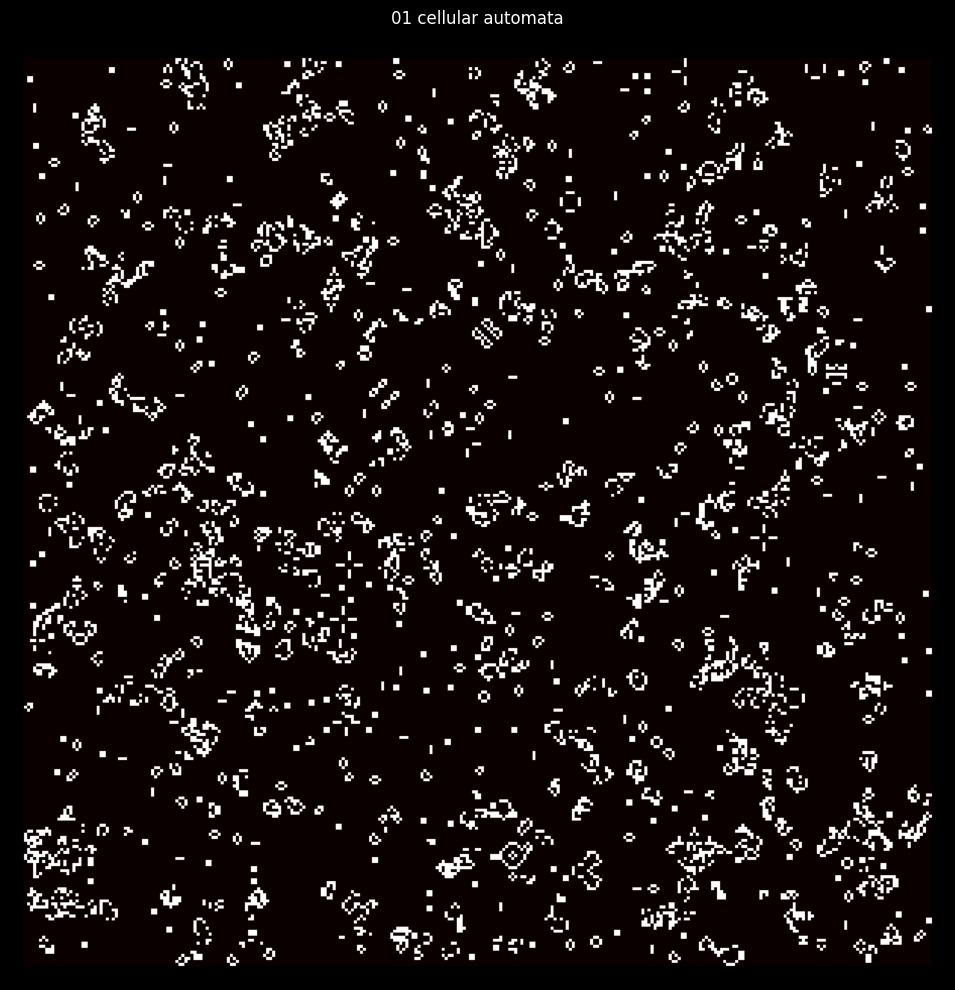

1/40: 01_cellular_automata.png



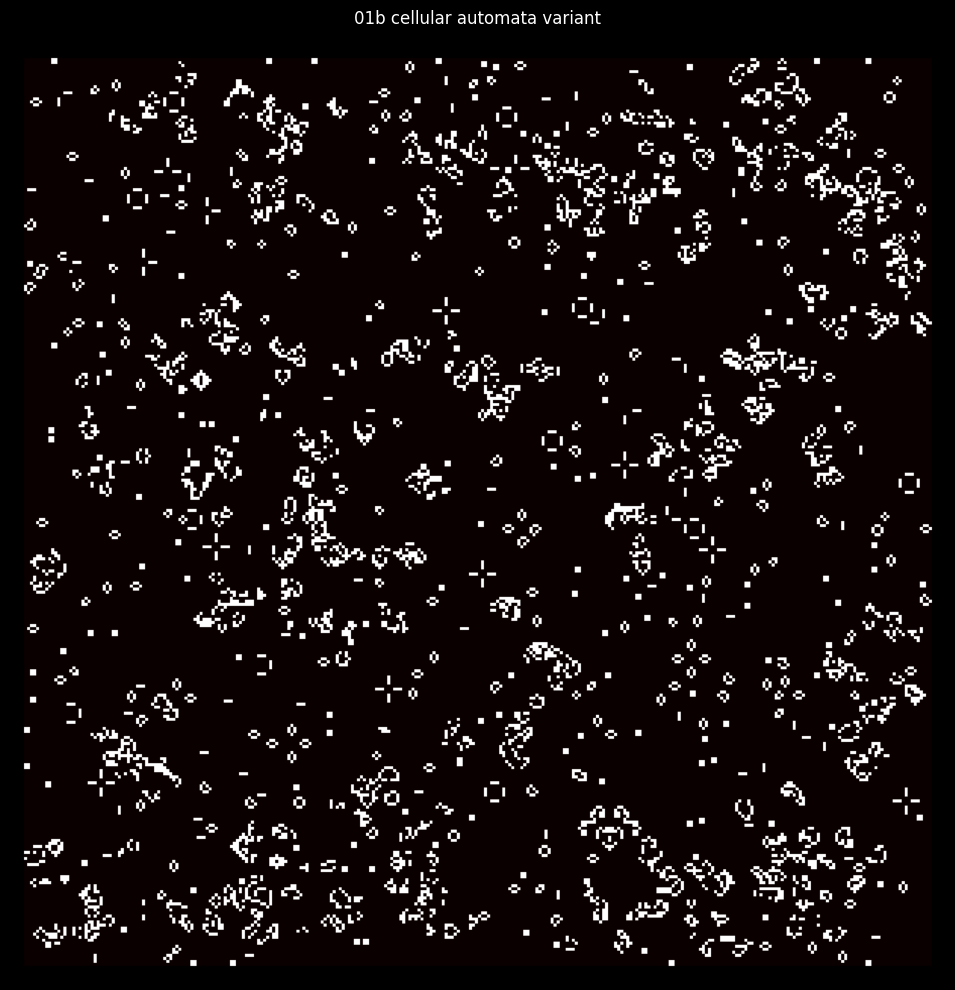

2/40: 01b_cellular_automata_variant.png



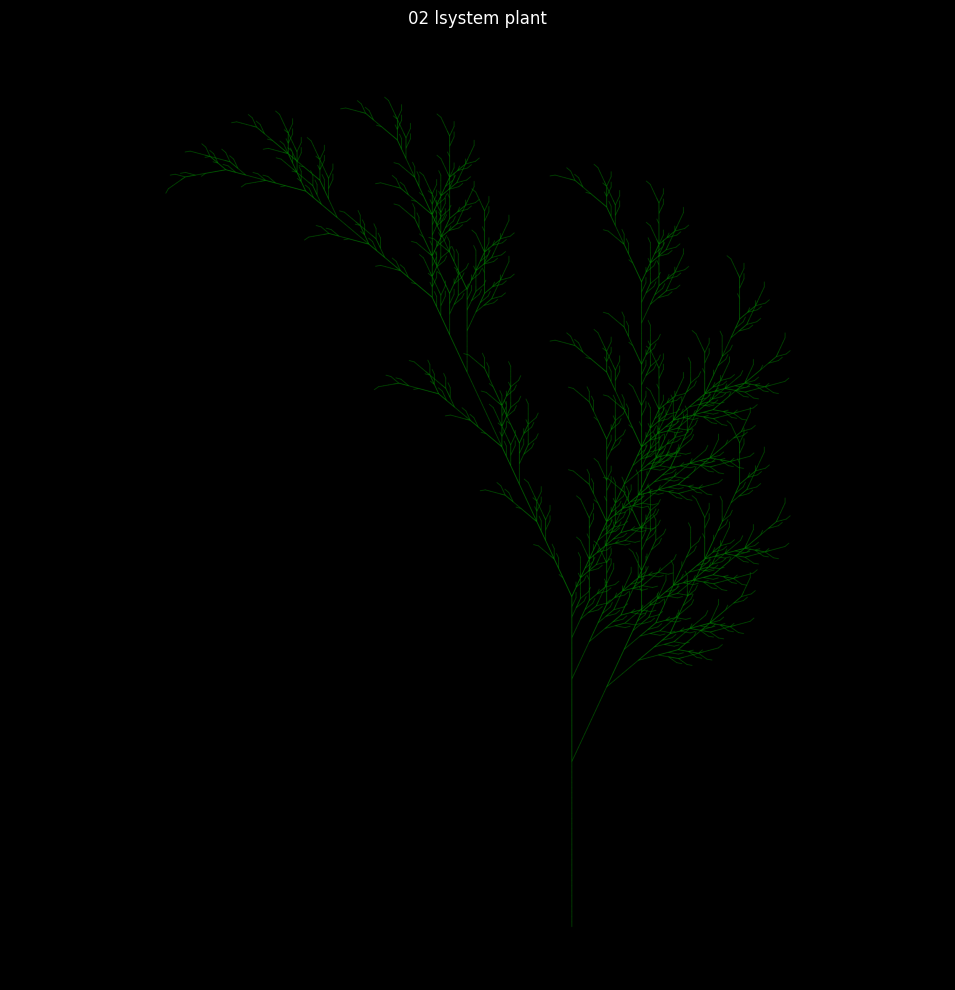

3/40: 02_lsystem_plant.png



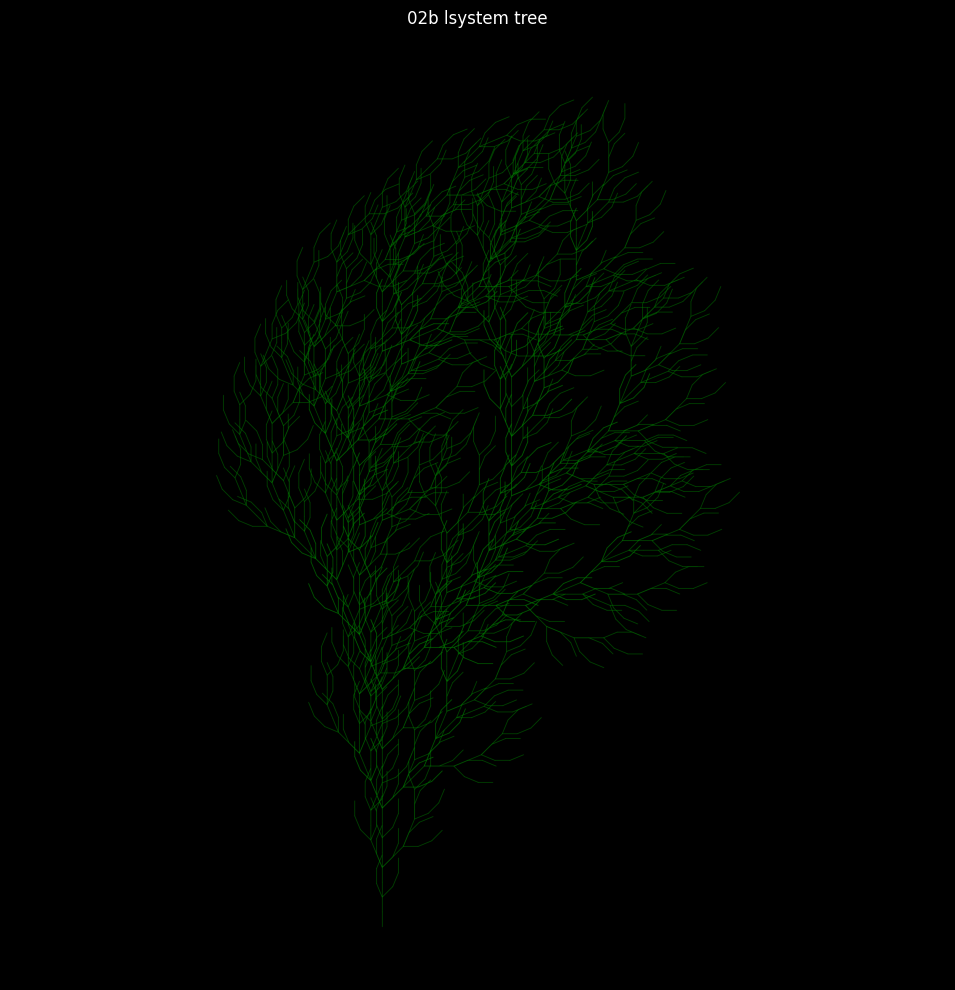

4/40: 02b_lsystem_tree.png



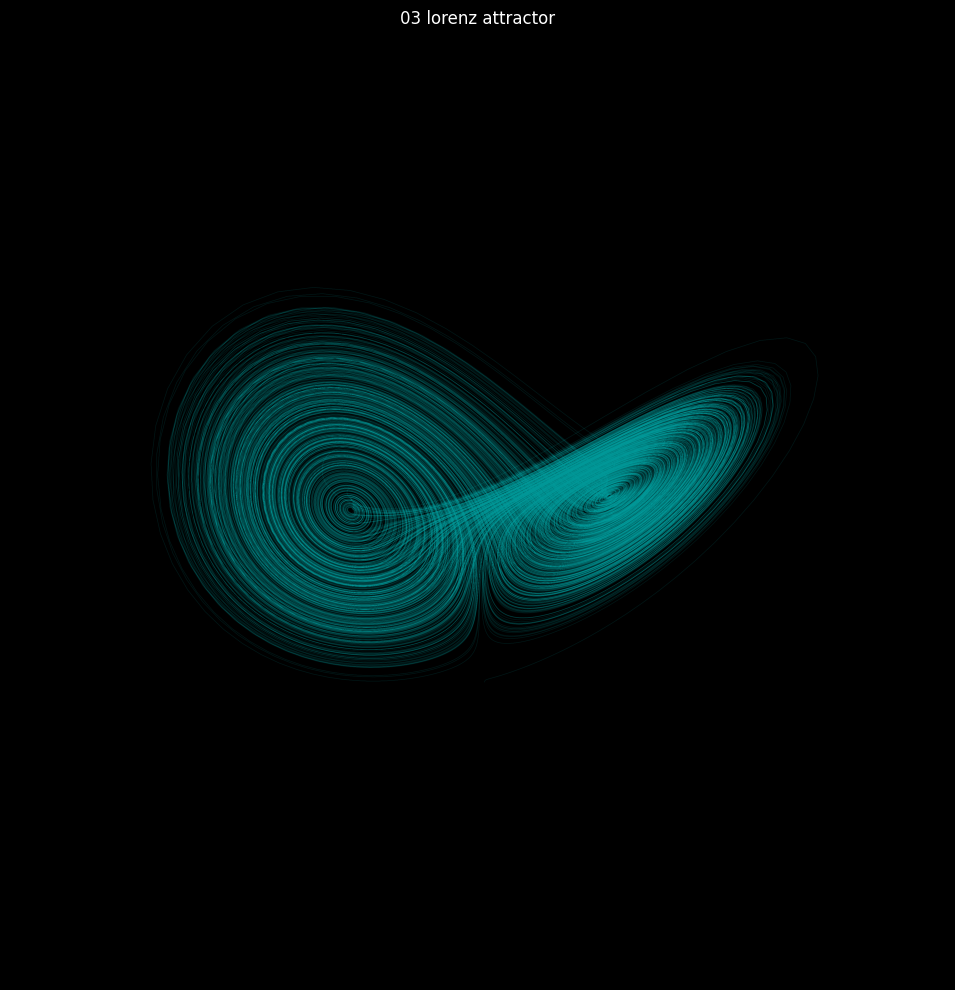

5/40: 03_lorenz_attractor.png



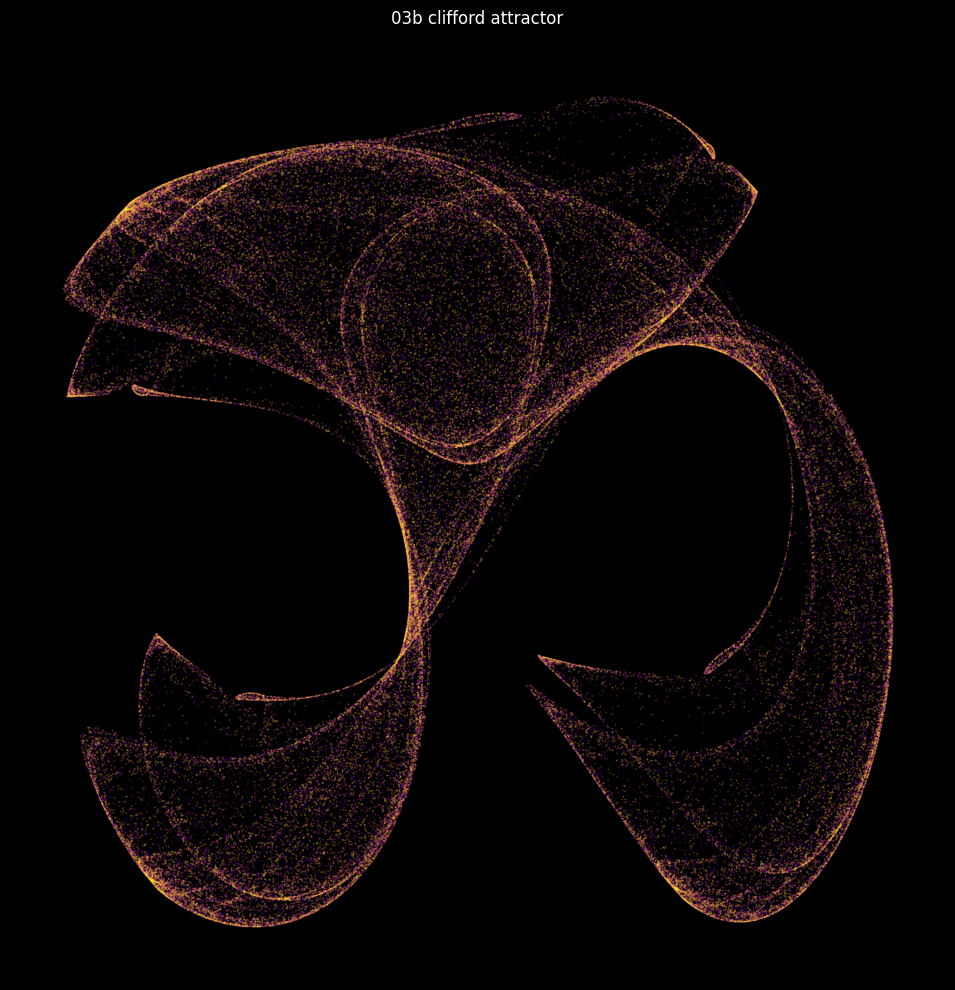

6/40: 03b_clifford_attractor.png



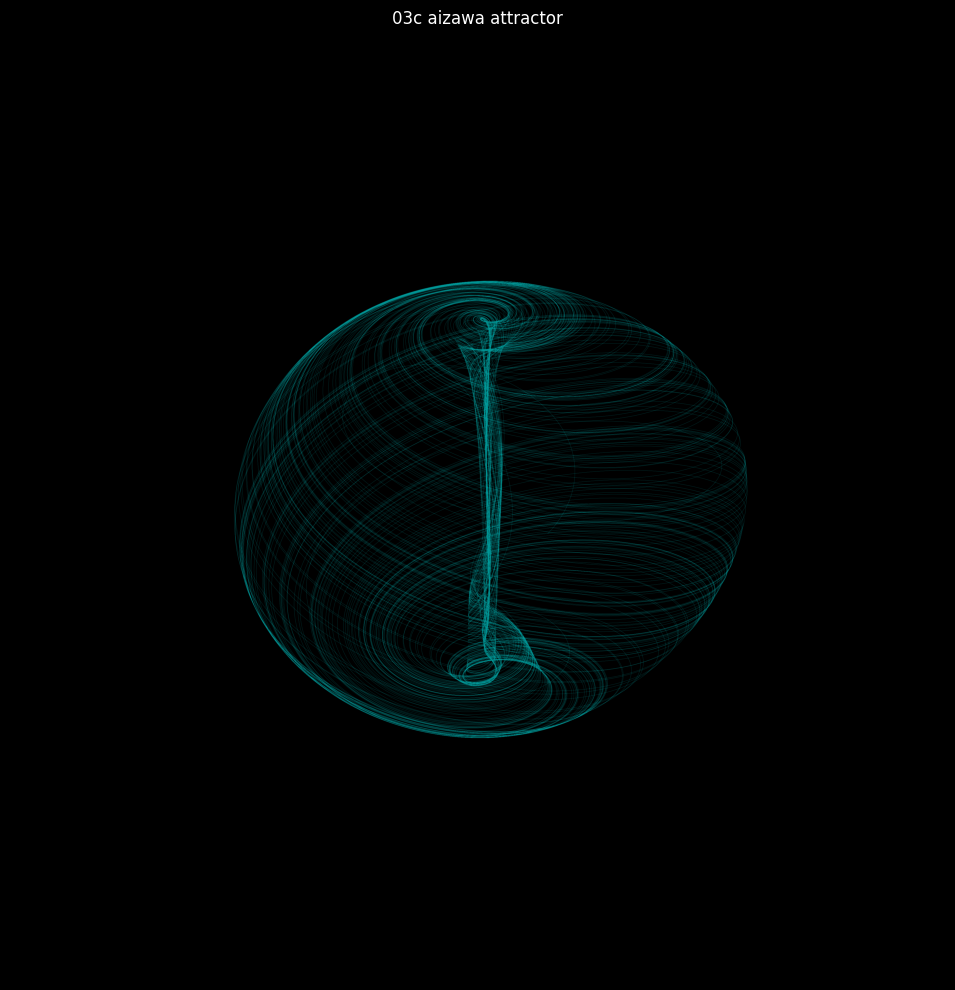

7/40: 03c_aizawa_attractor.png



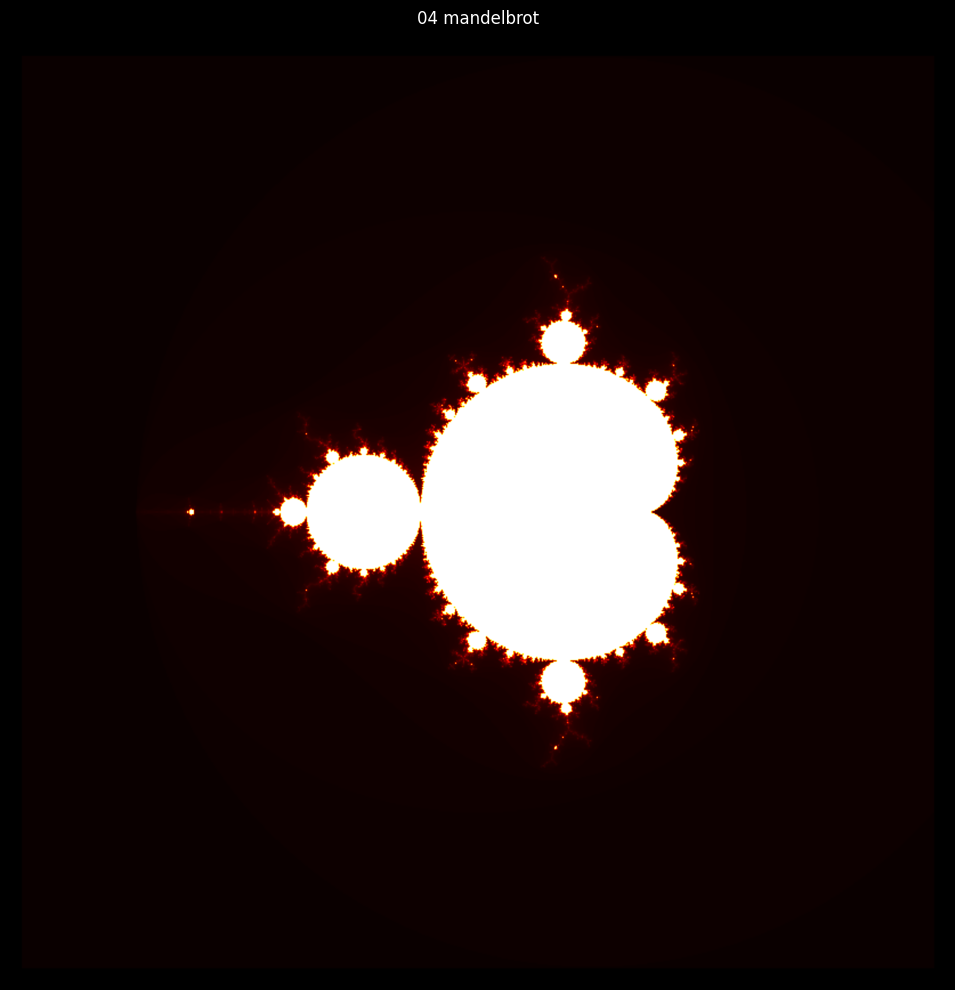

8/40: 04_mandelbrot.png



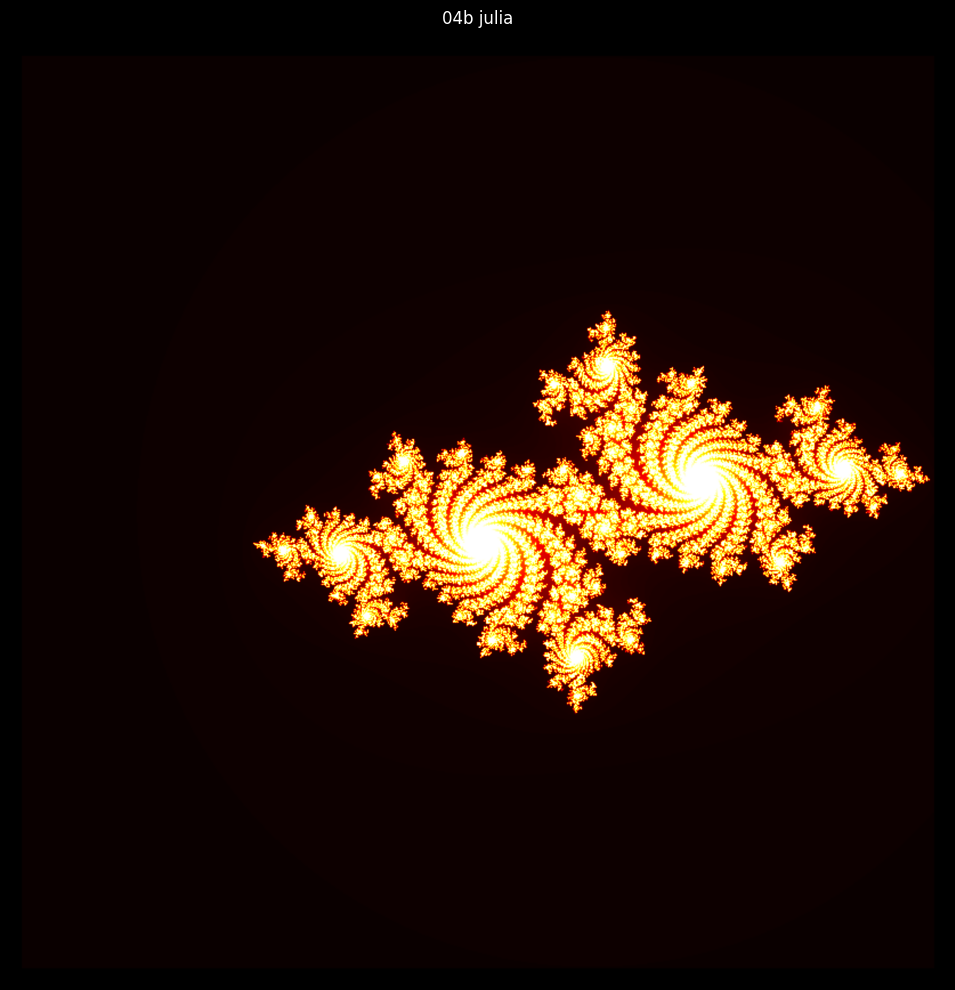

9/40: 04b_julia.png



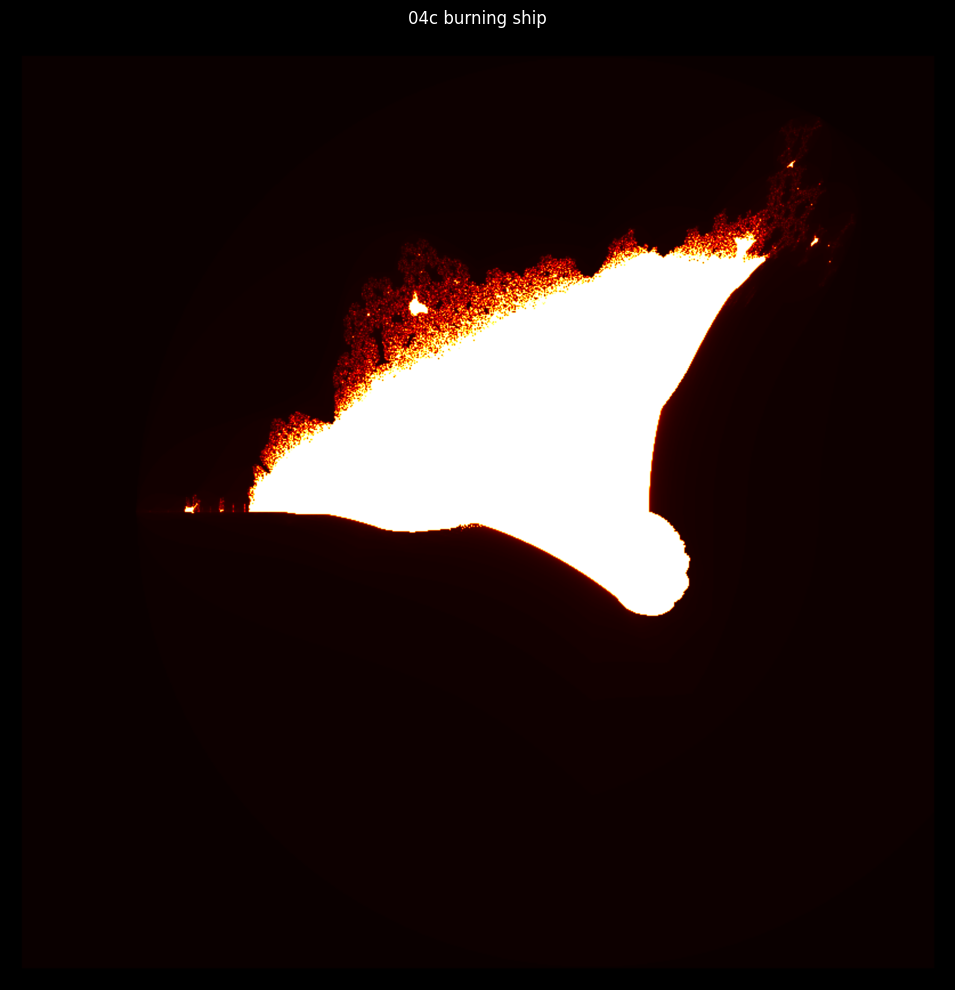

10/40: 04c_burning_ship.png



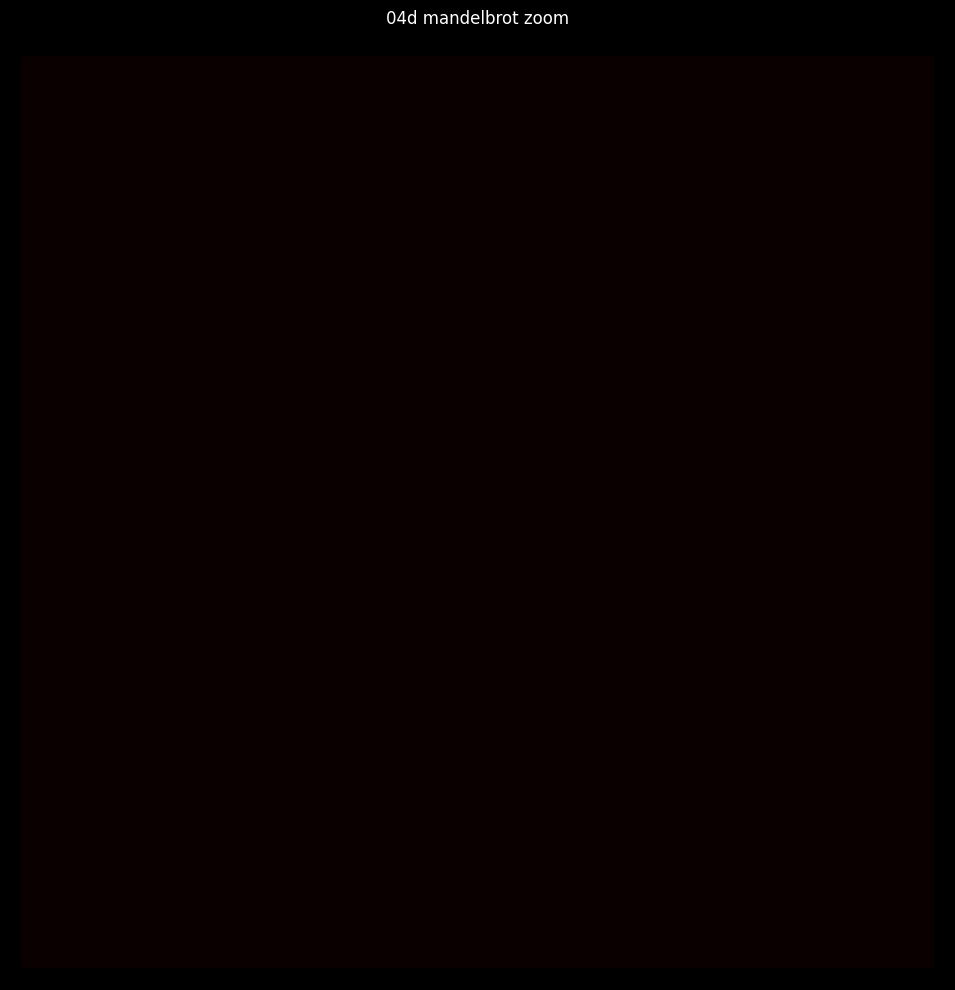

11/40: 04d_mandelbrot_zoom.png



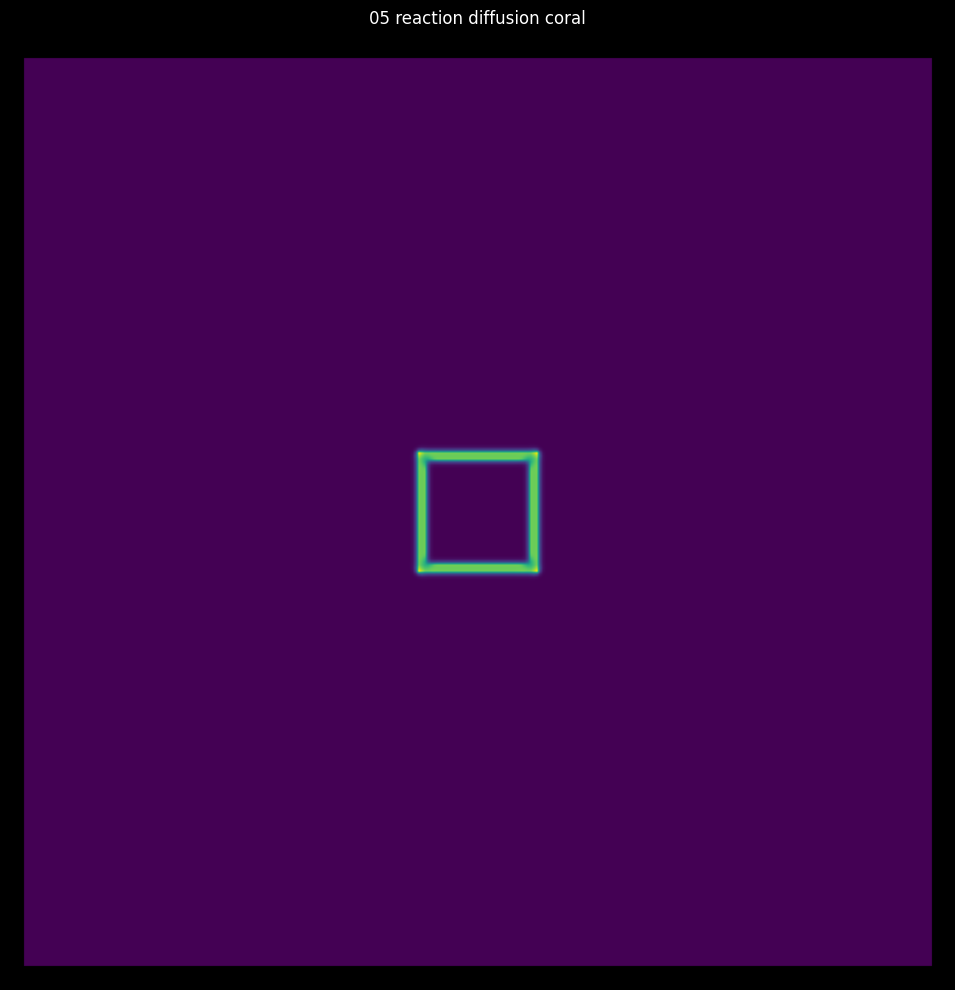

12/40: 05_reaction_diffusion_coral.png



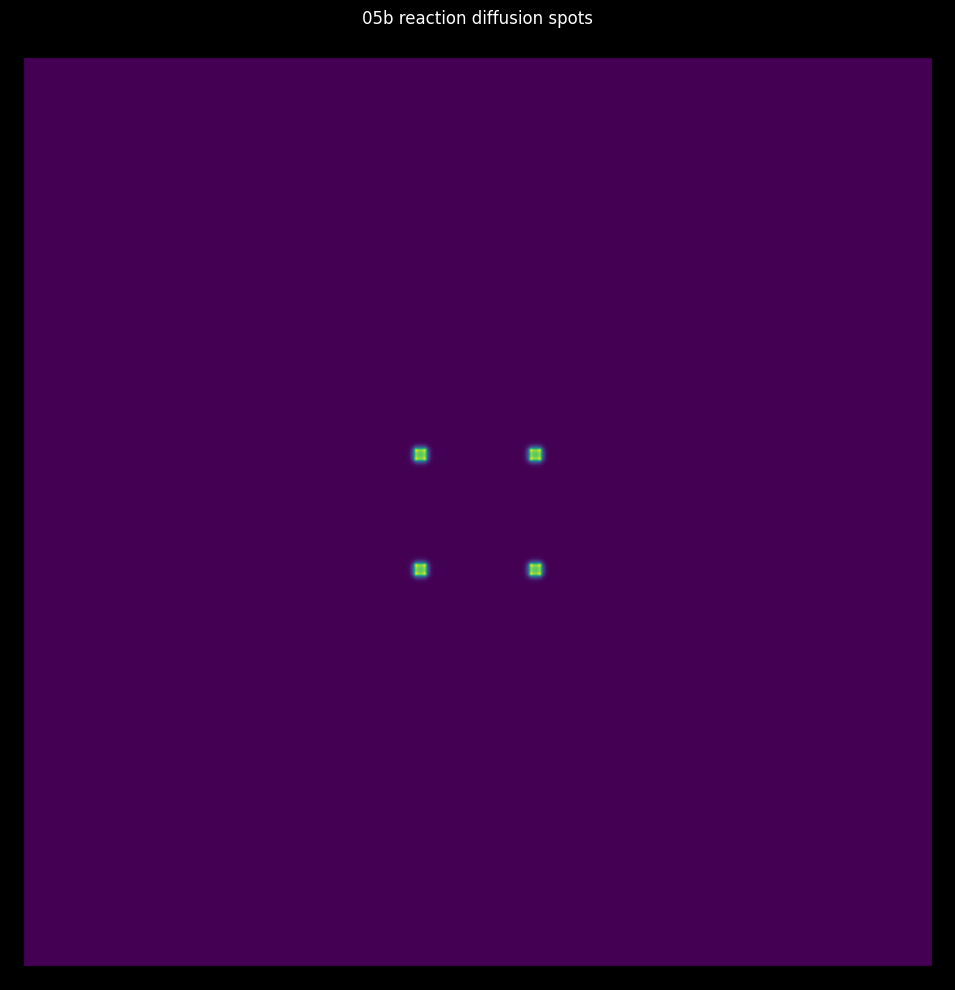

13/40: 05b_reaction_diffusion_spots.png



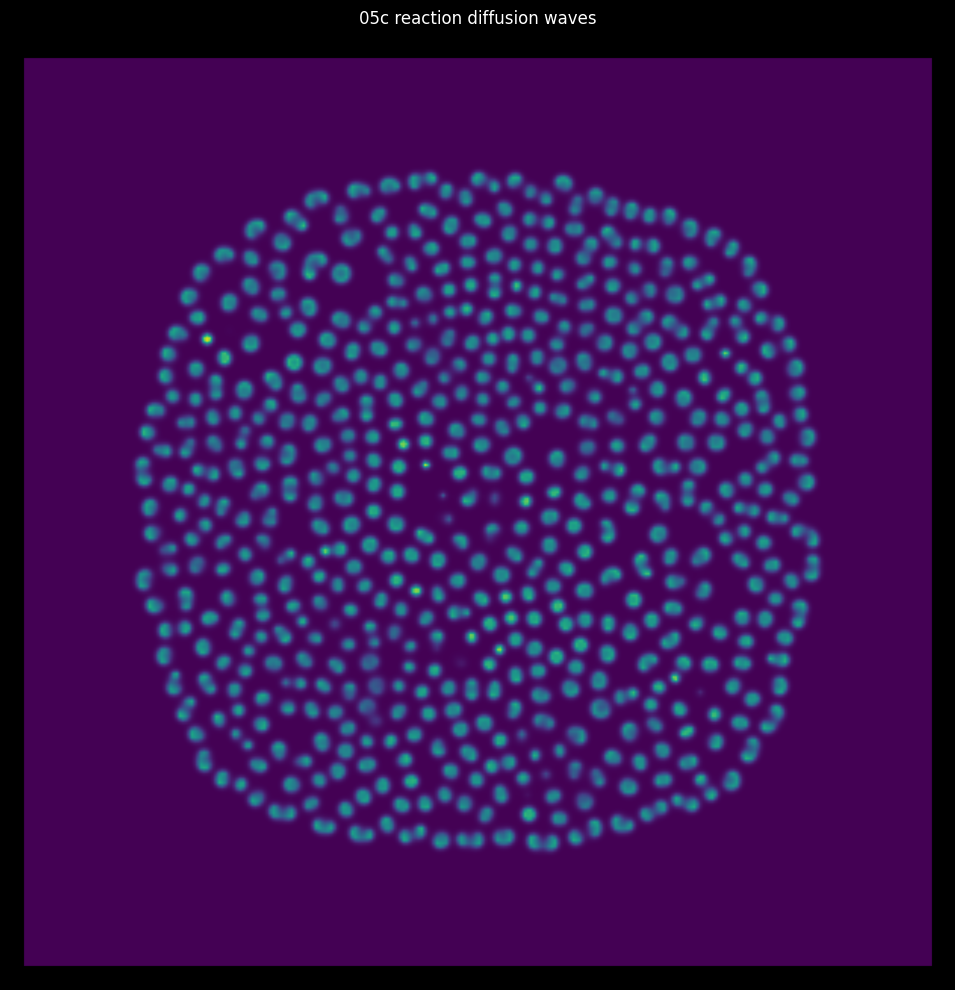

14/40: 05c_reaction_diffusion_waves.png



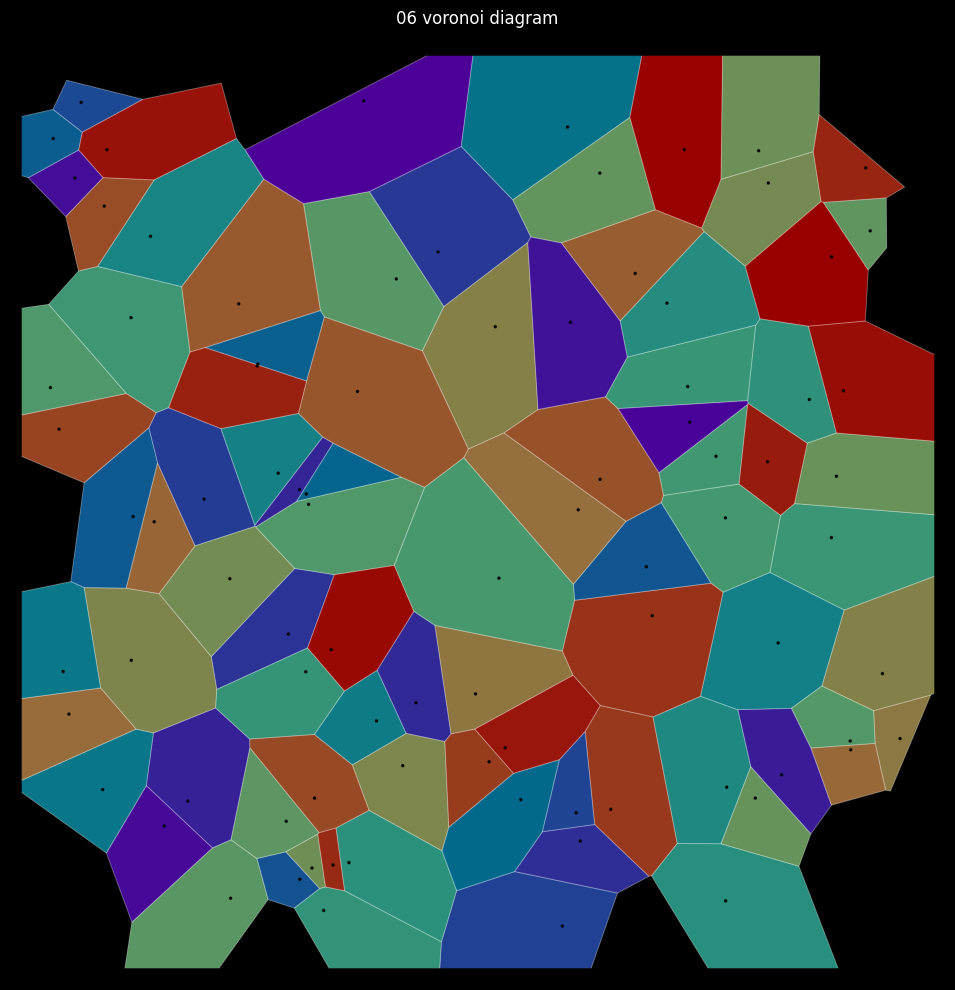

15/40: 06_voronoi_diagram.png



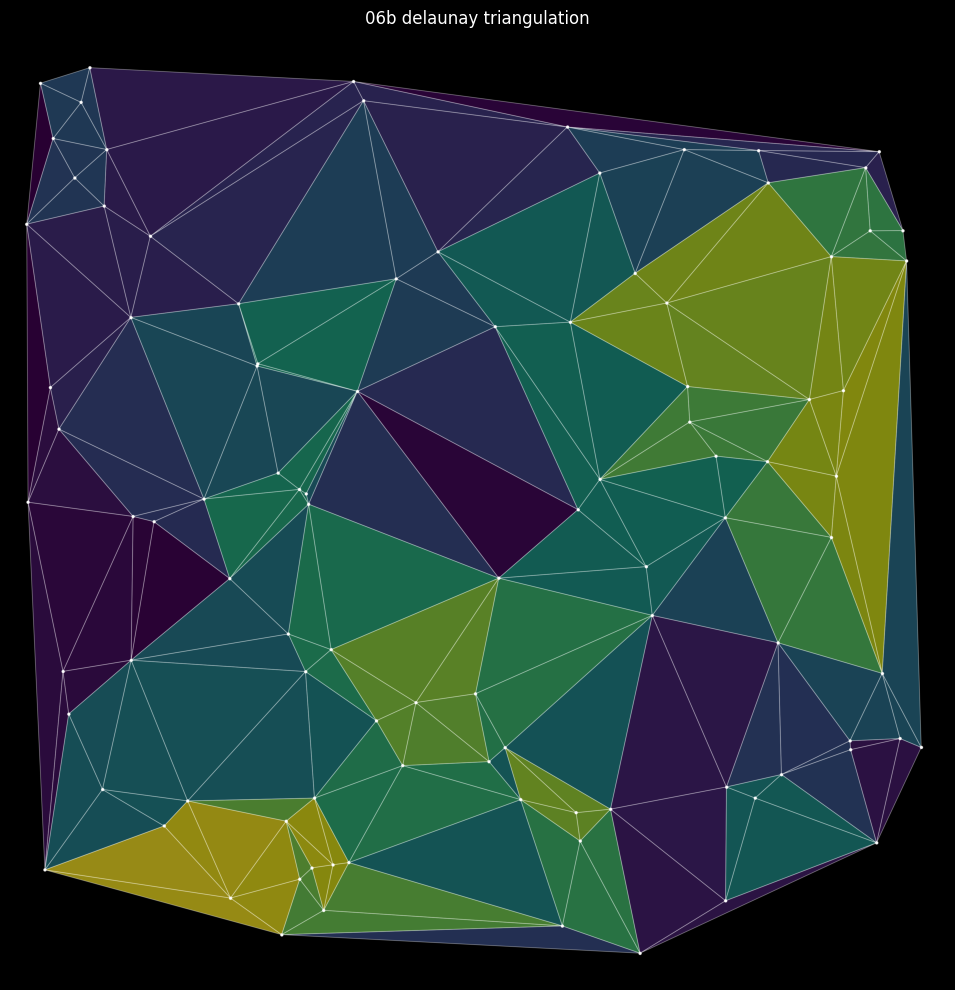

16/40: 06b_delaunay_triangulation.png



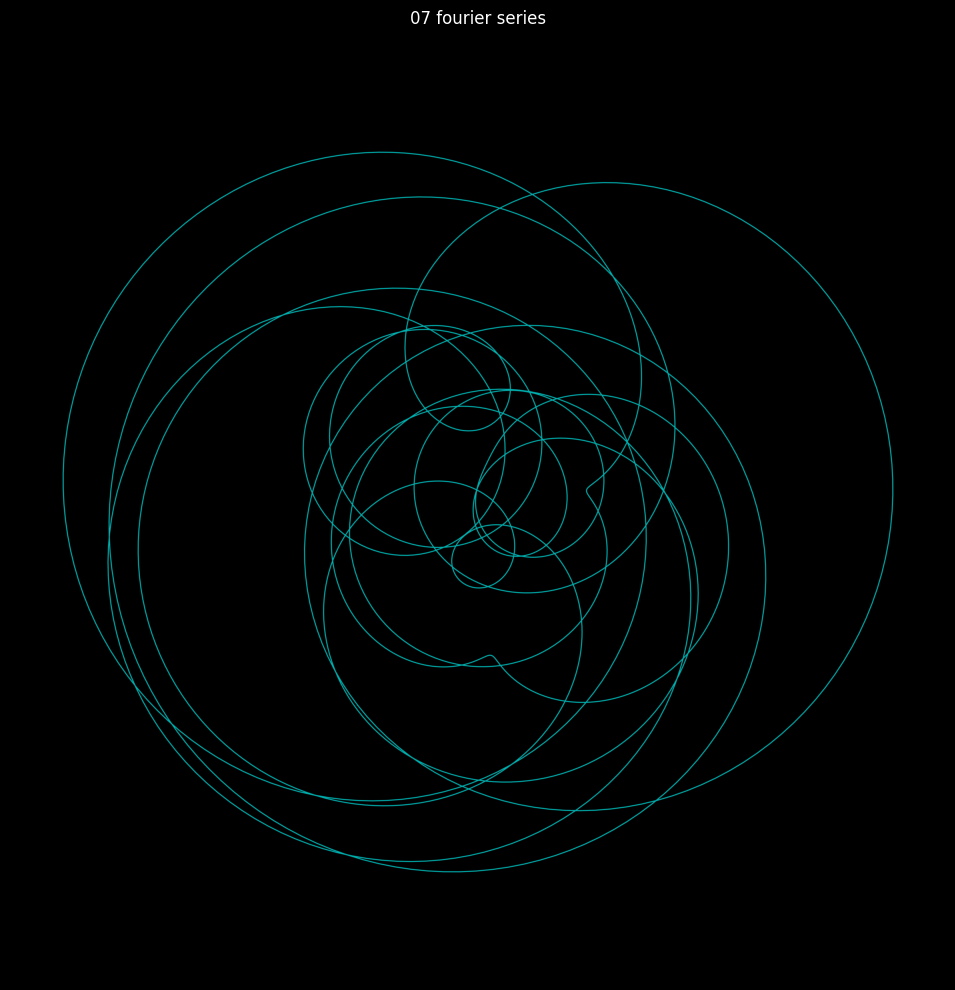

17/40: 07_fourier_series.png



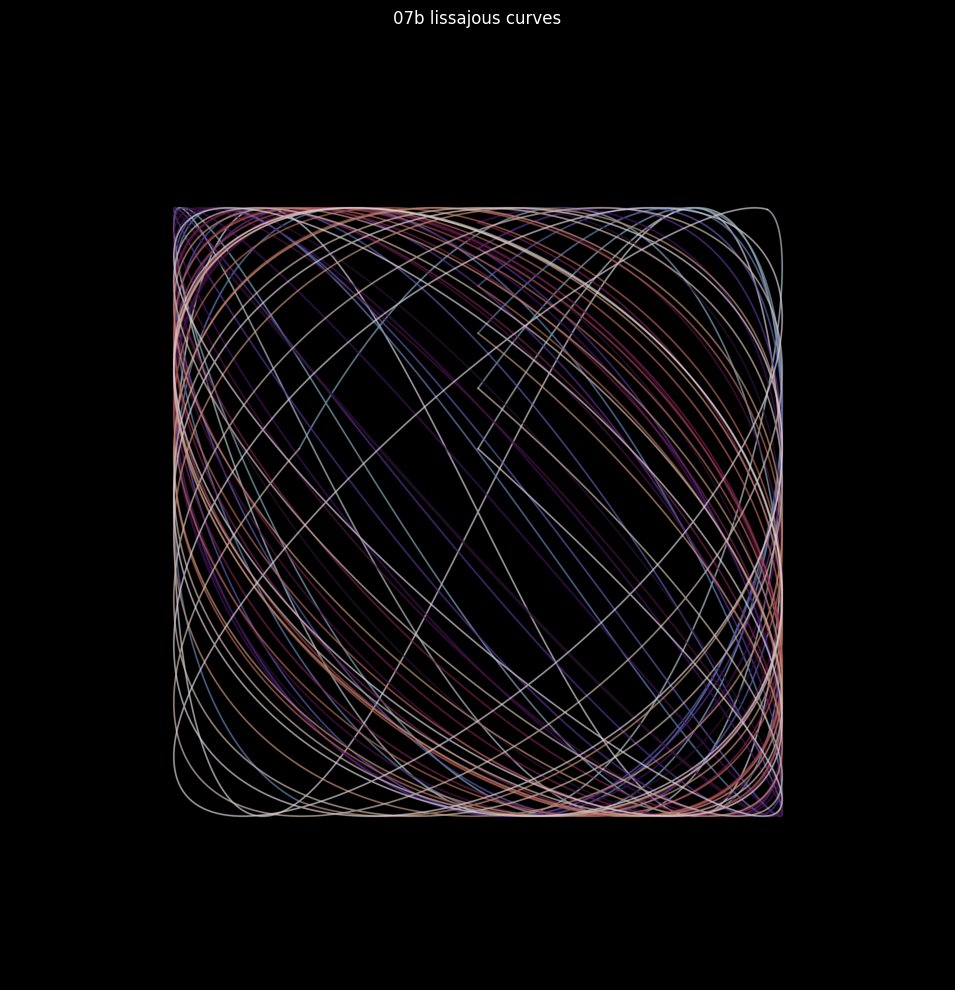

18/40: 07b_lissajous_curves.png



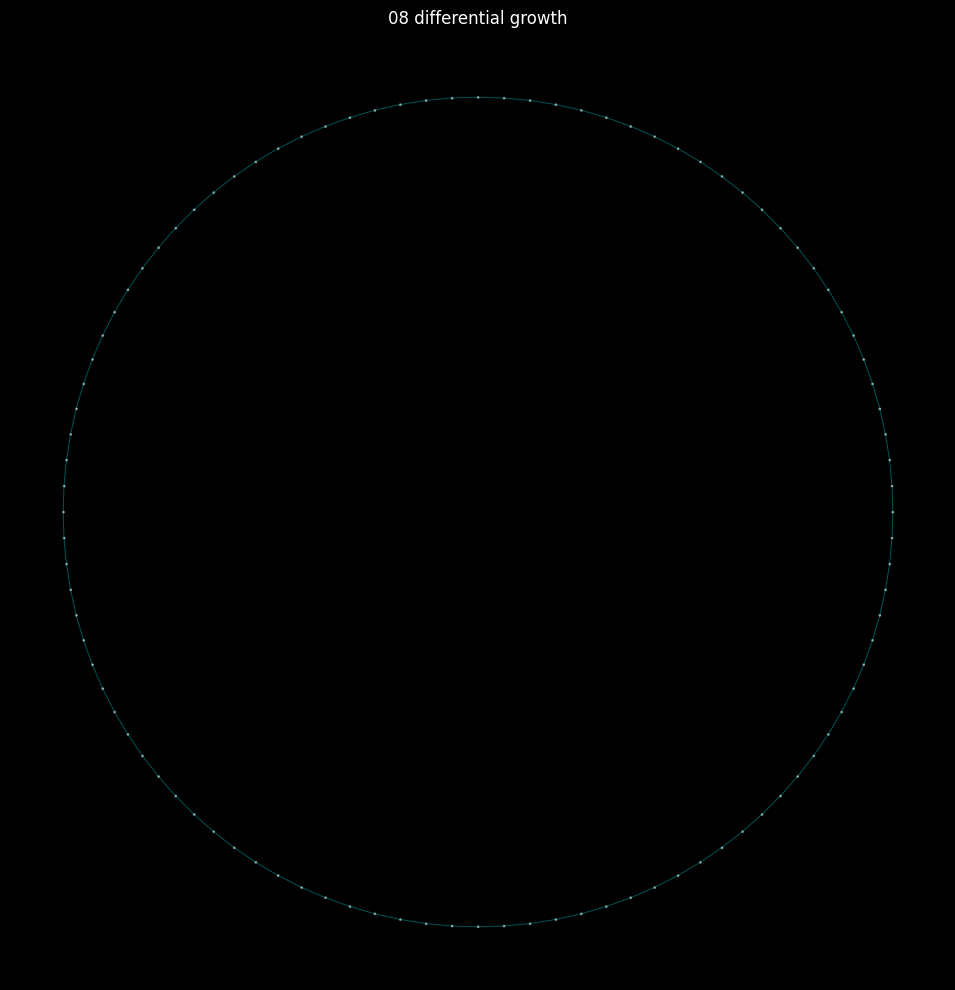

19/40: 08_differential_growth.png



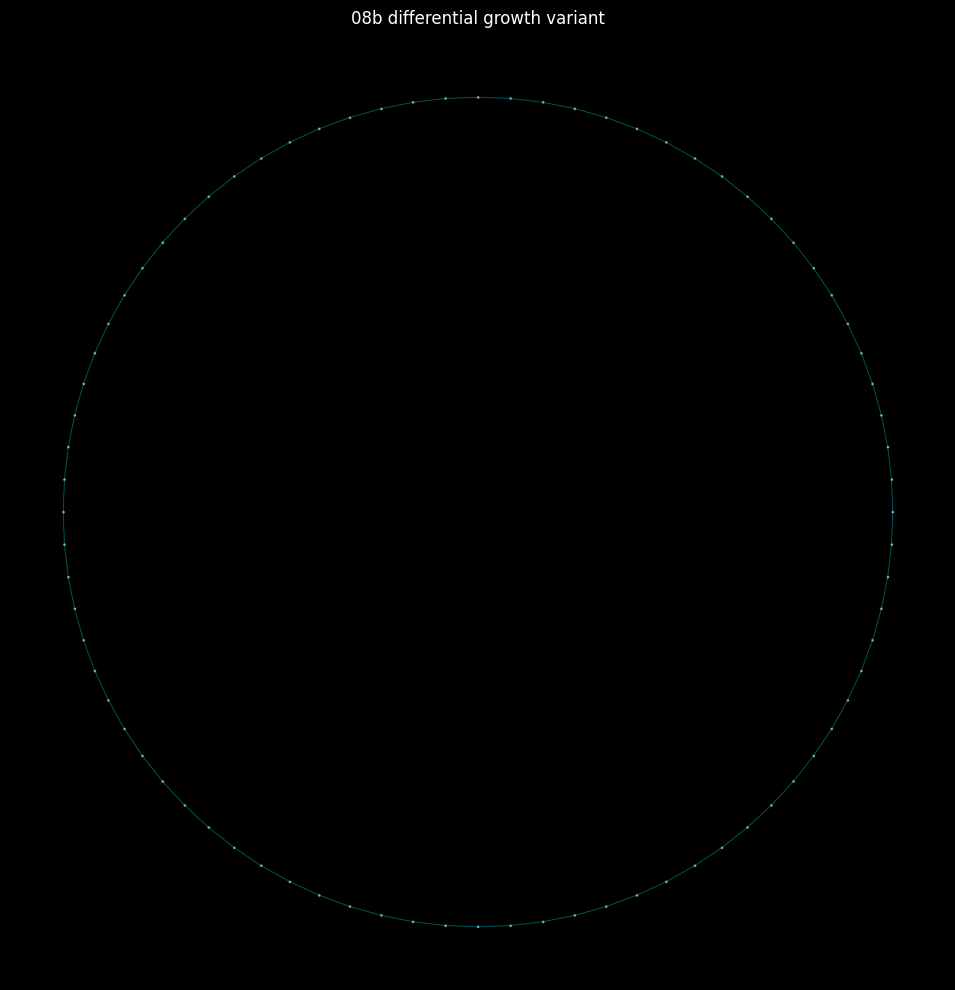

20/40: 08b_differential_growth_variant.png



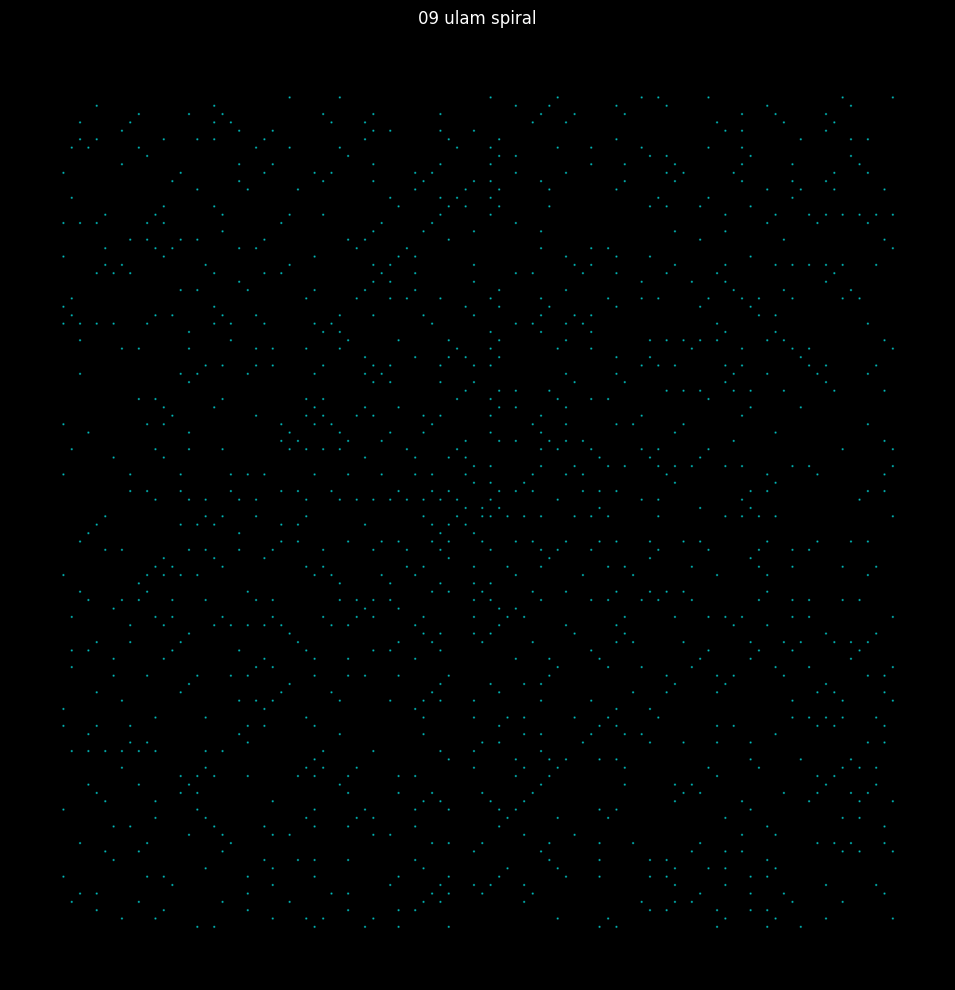

21/40: 09_ulam_spiral.png



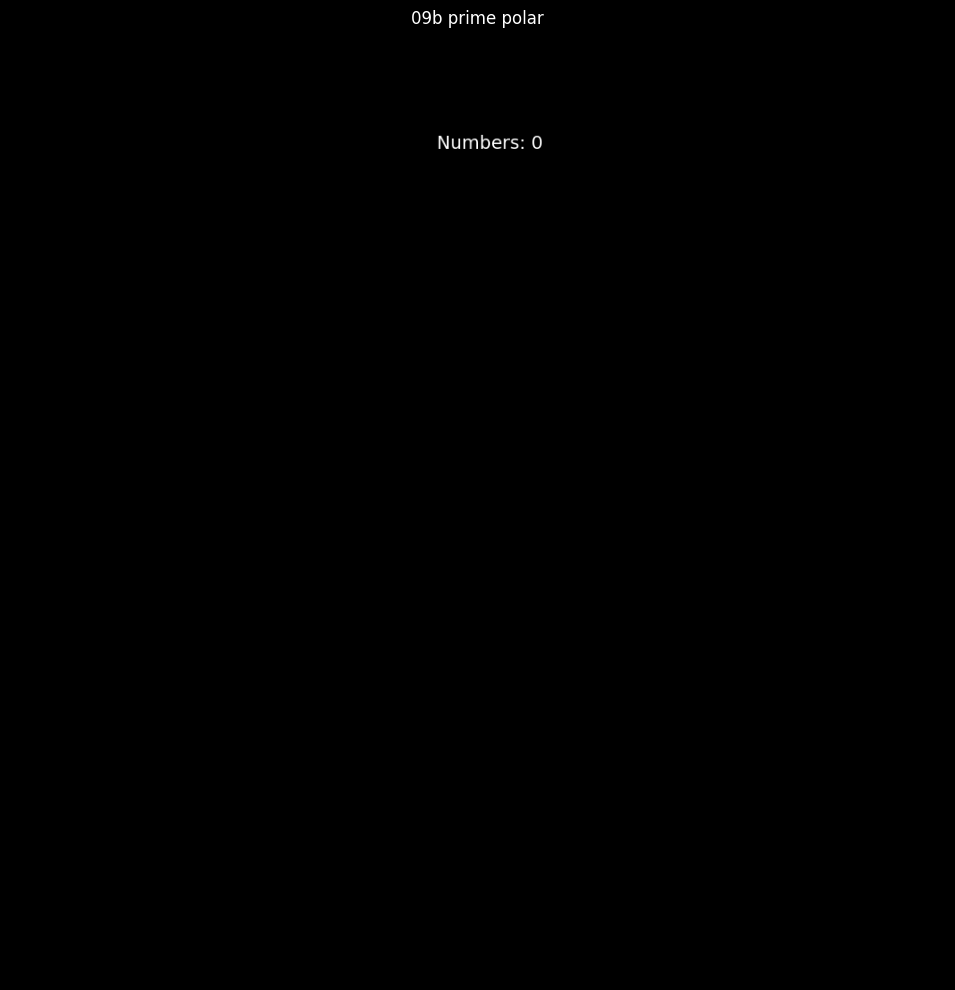

22/40: 09b_prime_polar.png



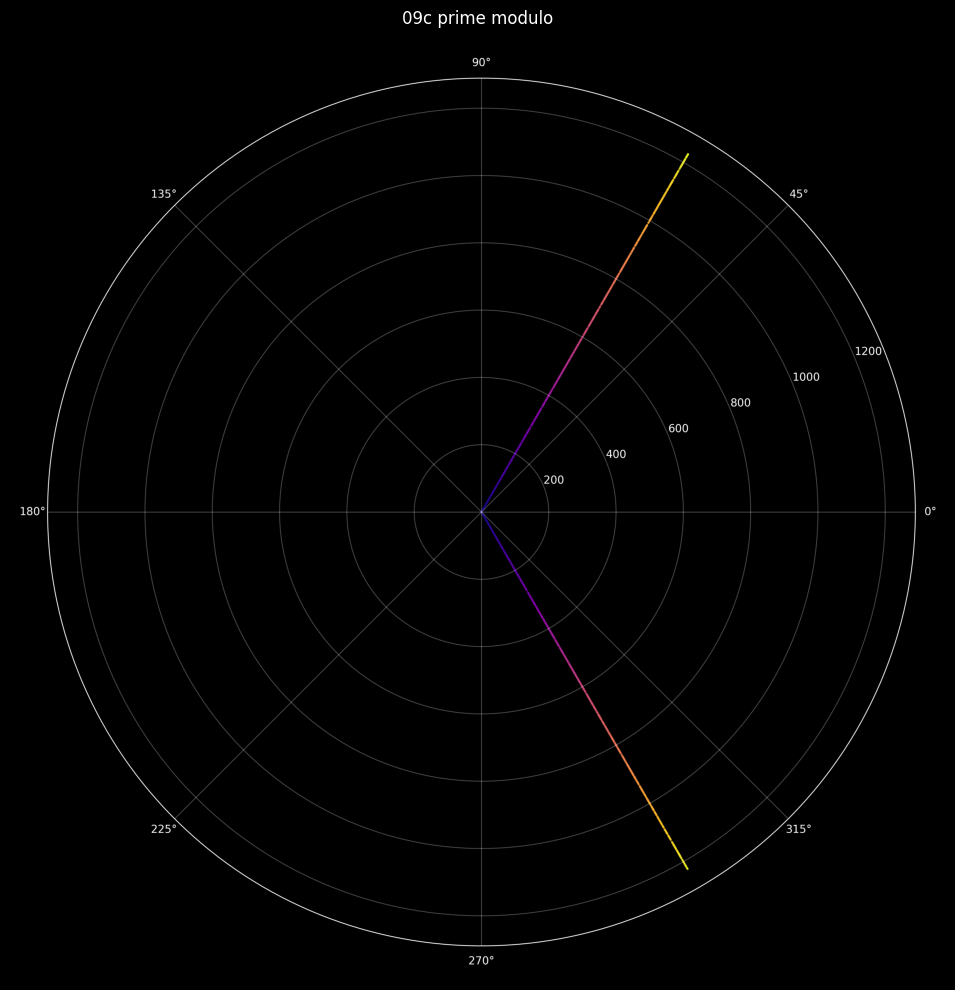

23/40: 09c_prime_modulo.png



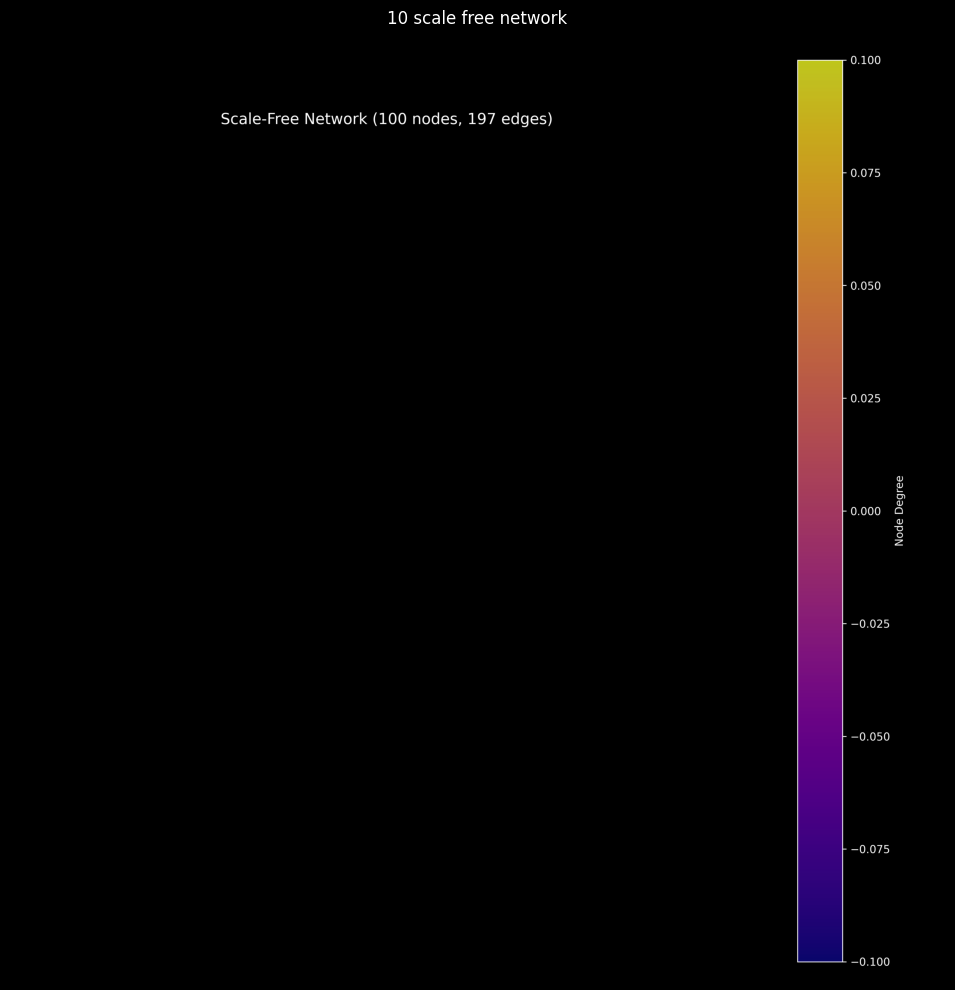

24/40: 10_scale_free_network.png



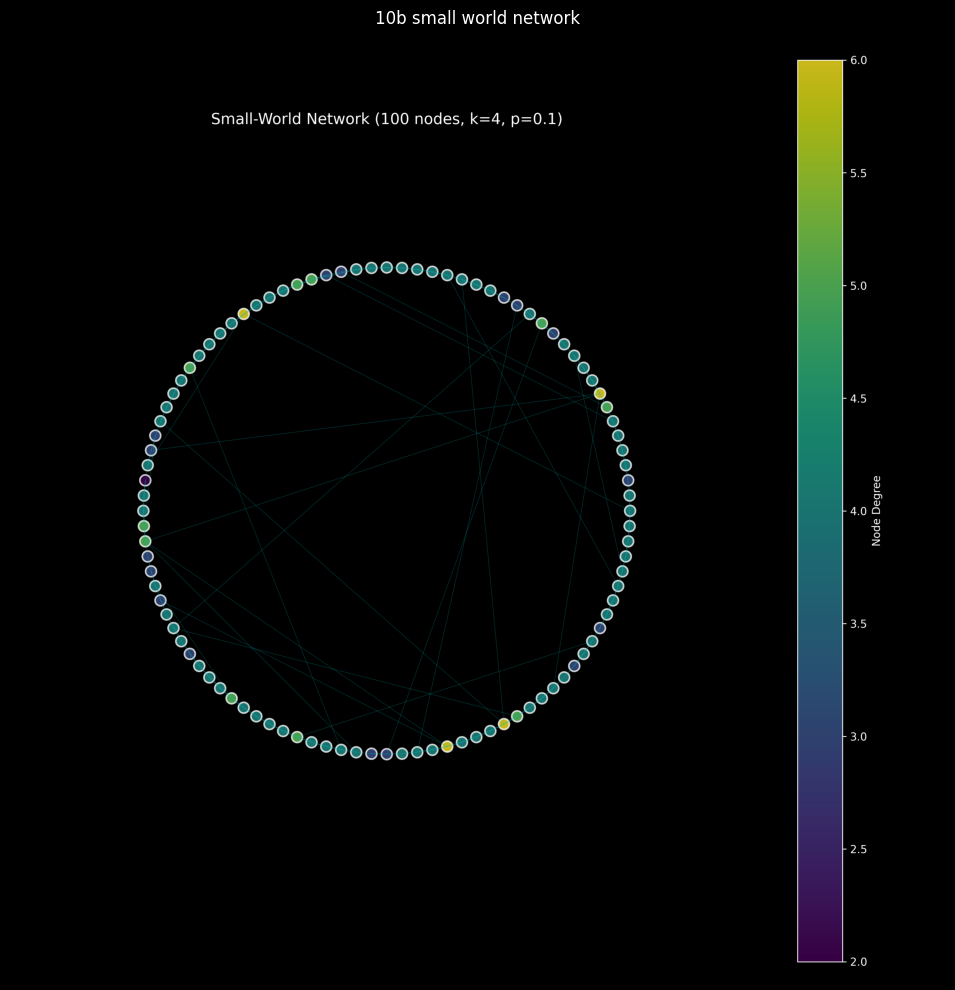

25/40: 10b_small_world_network.png



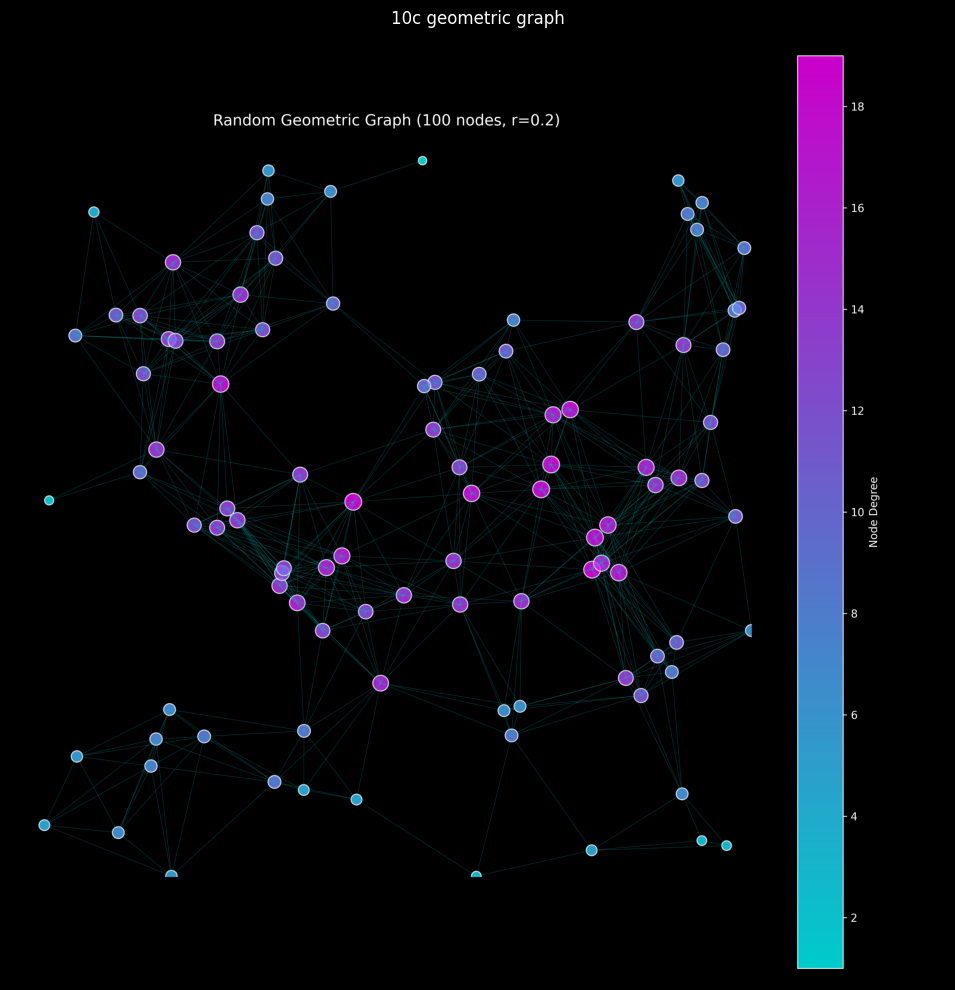

26/40: 10c_geometric_graph.png



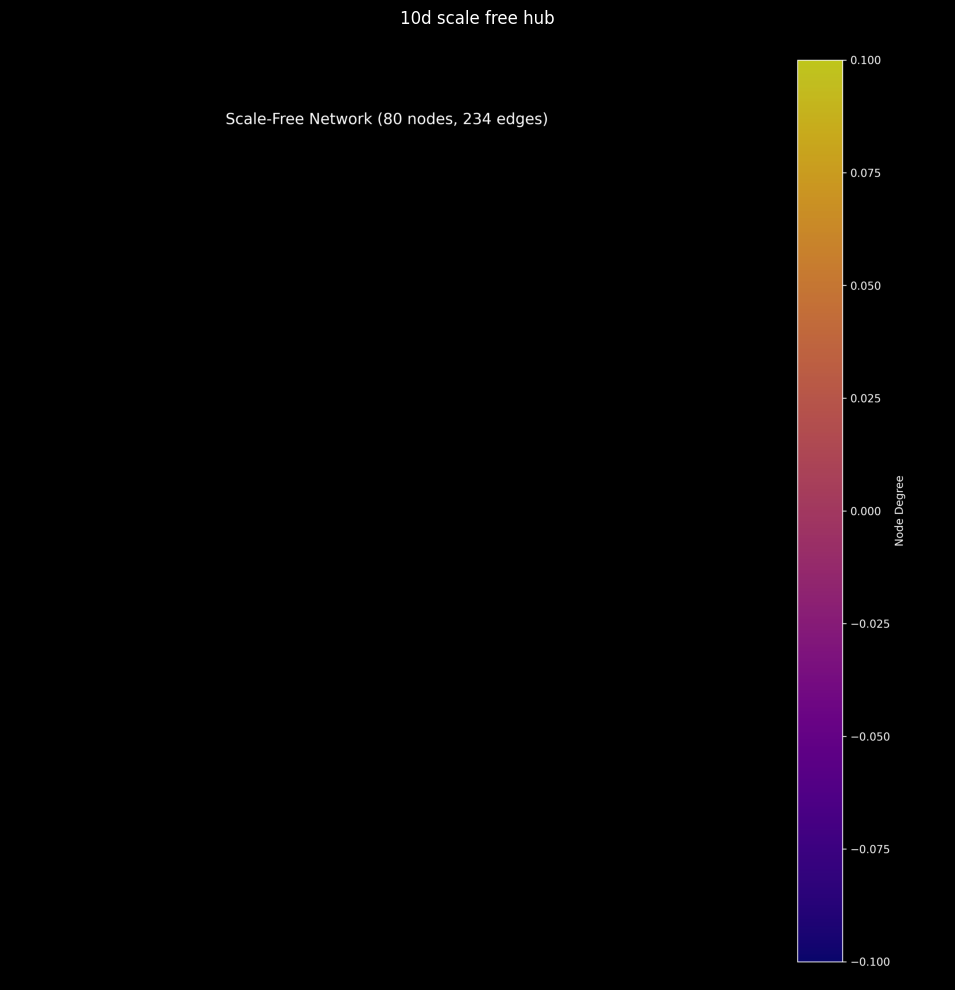

27/40: 10d_scale_free_hub.png



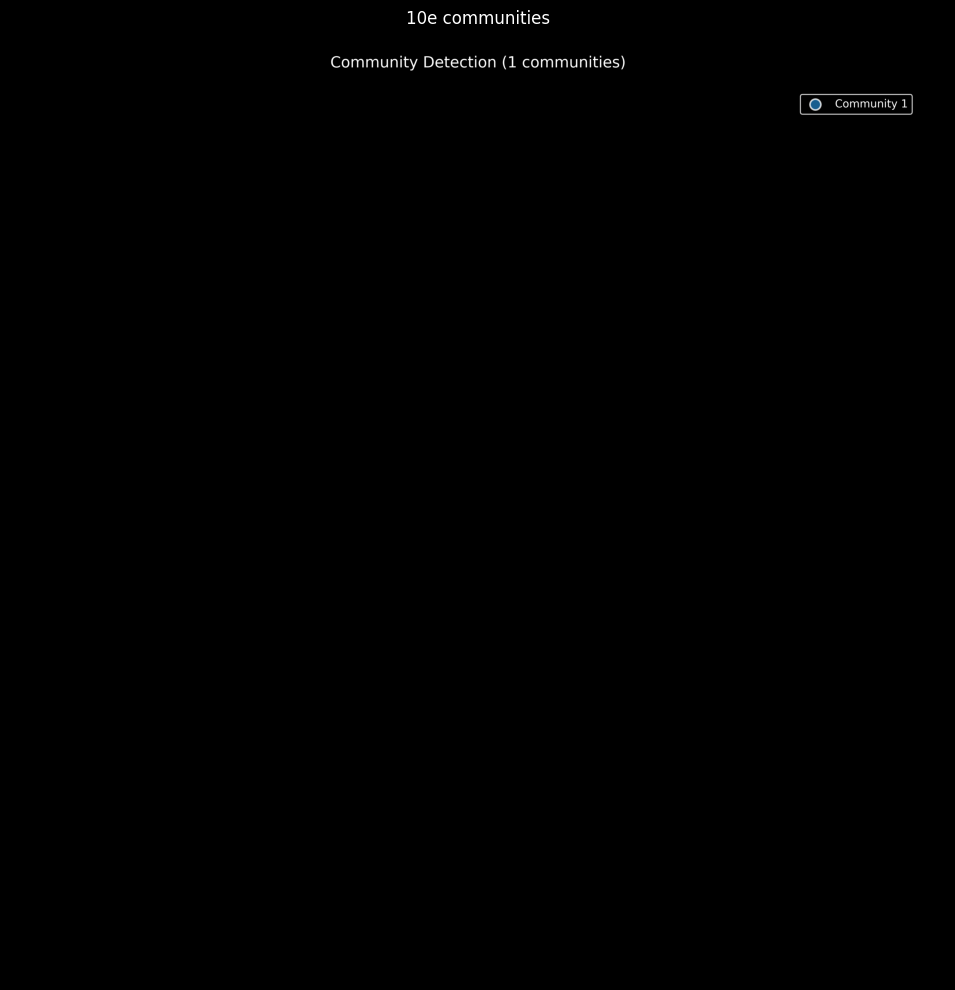

28/40: 10e_communities.png



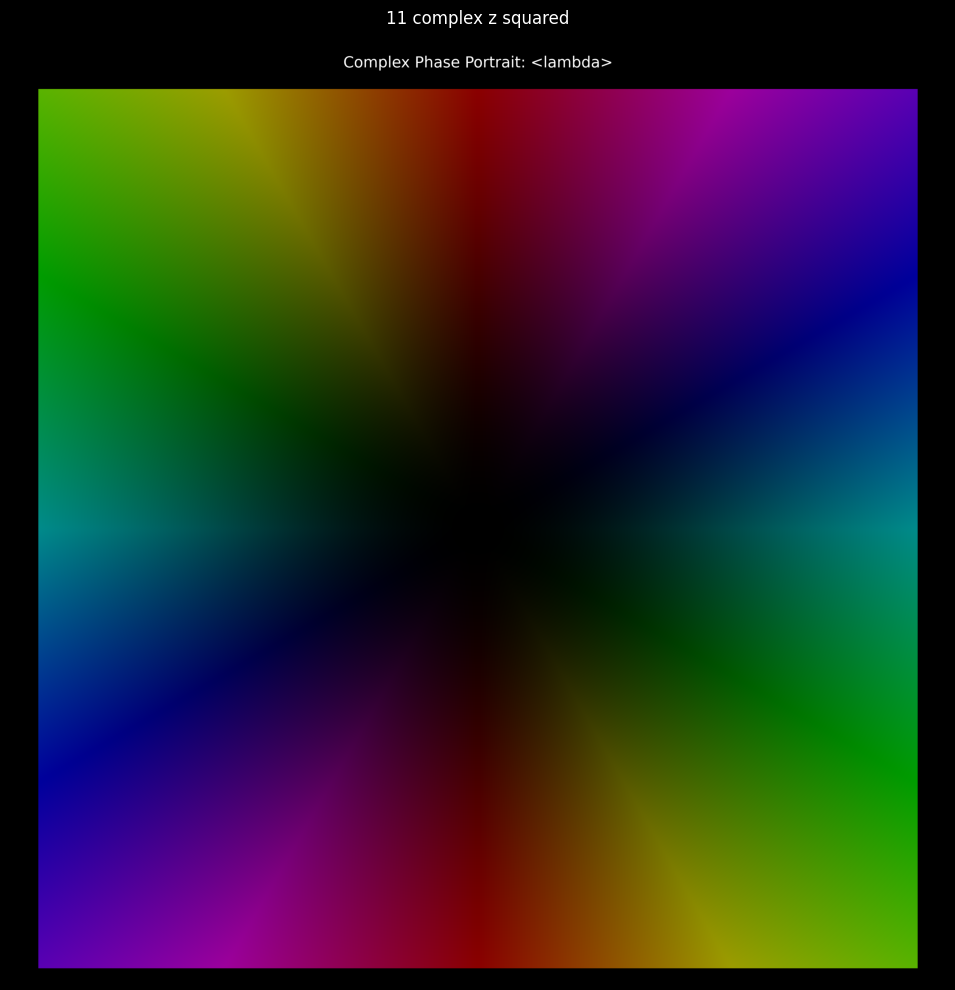

29/40: 11_complex_z_squared.png



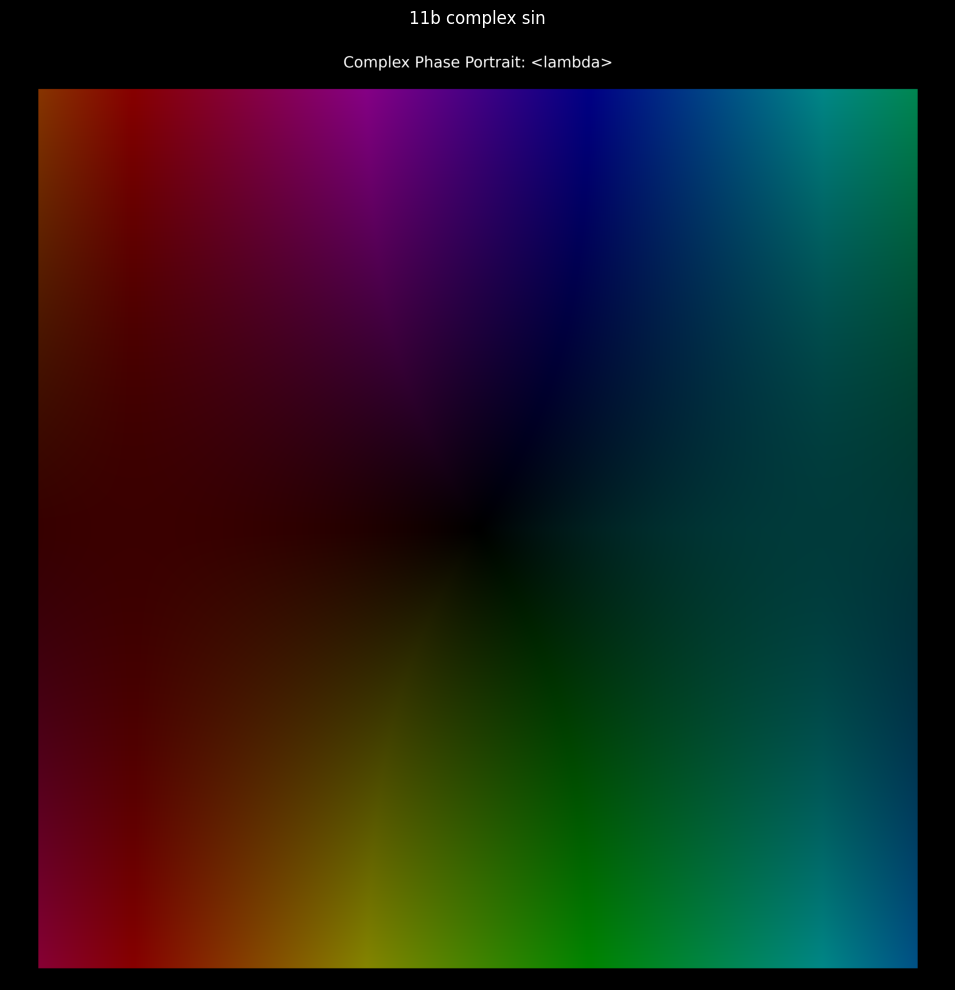

30/40: 11b_complex_sin.png



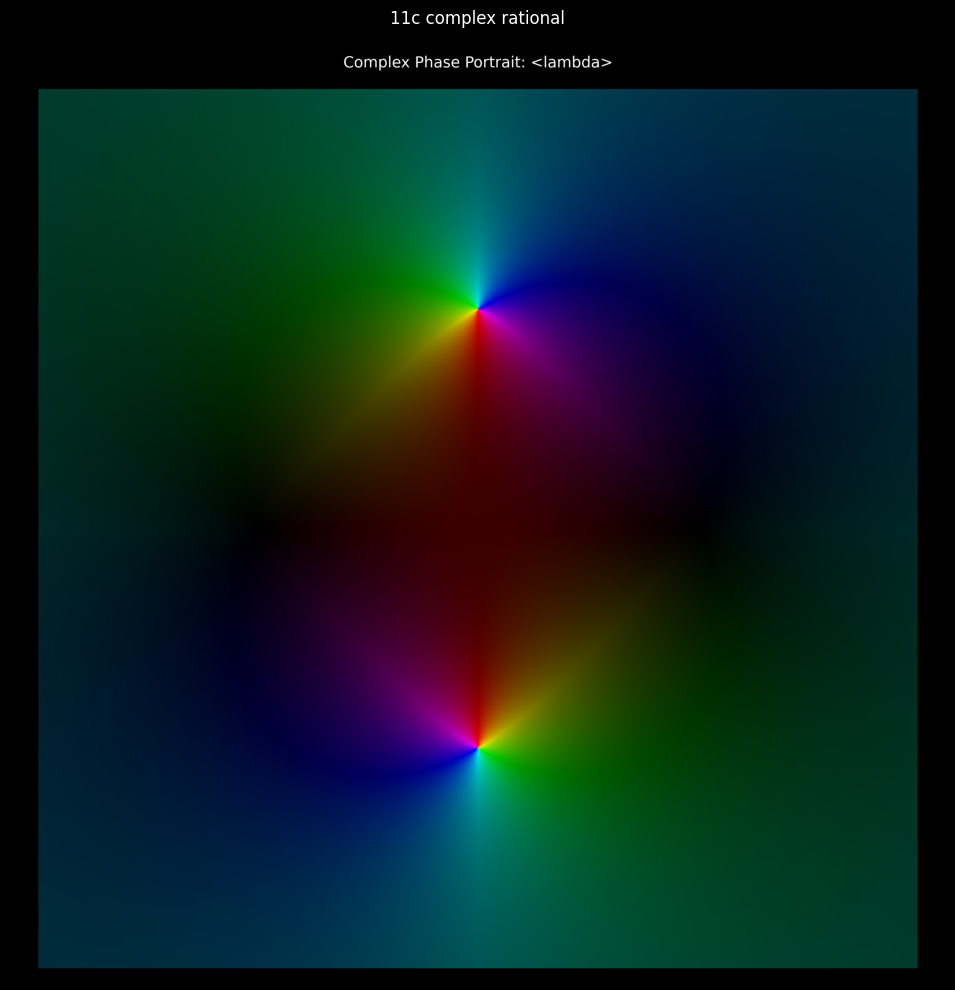

31/40: 11c_complex_rational.png



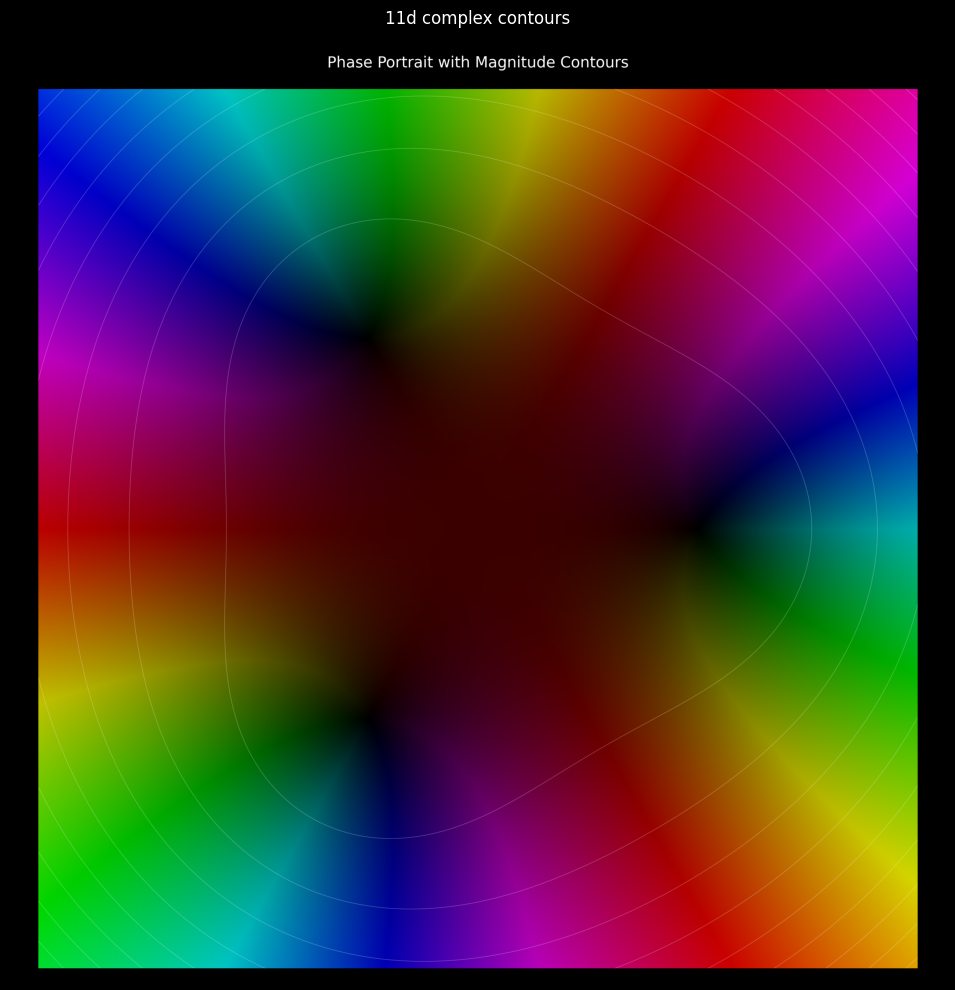

32/40: 11d_complex_contours.png



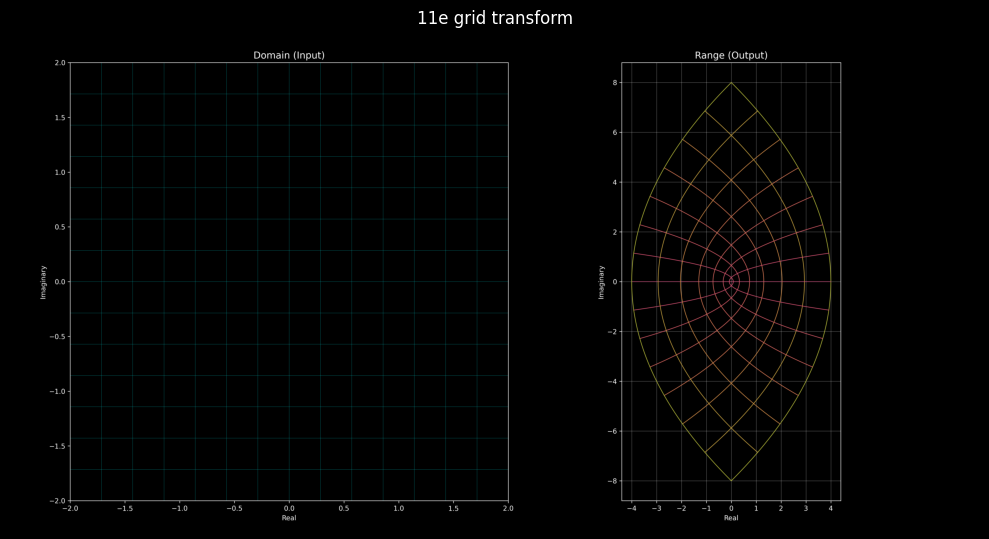

33/40: 11e_grid_transform.png



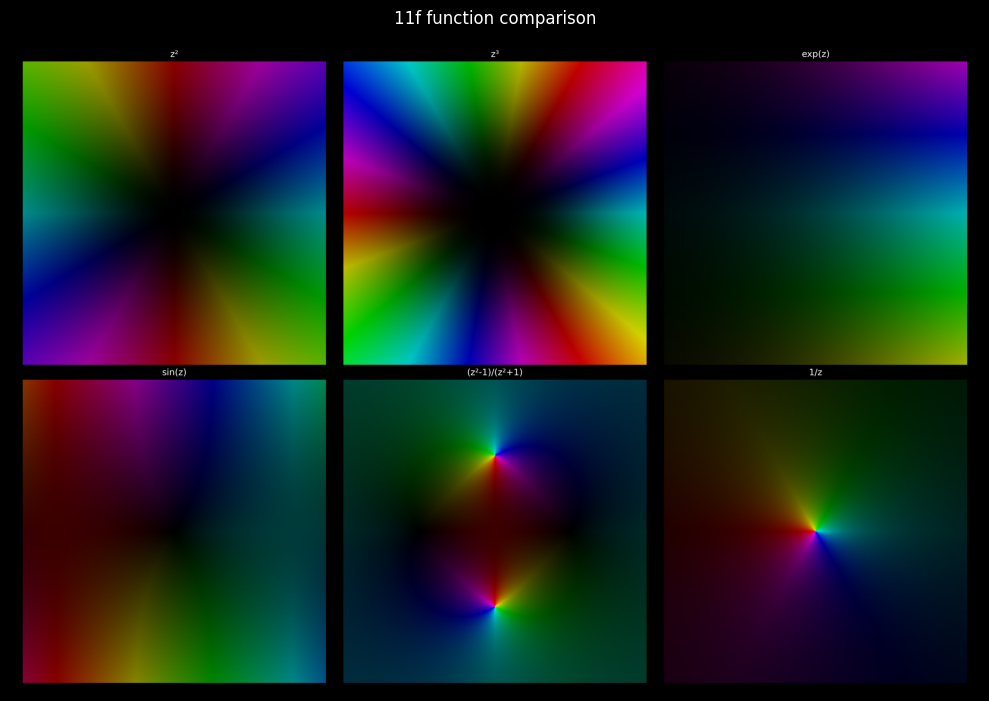

34/40: 11f_function_comparison.png



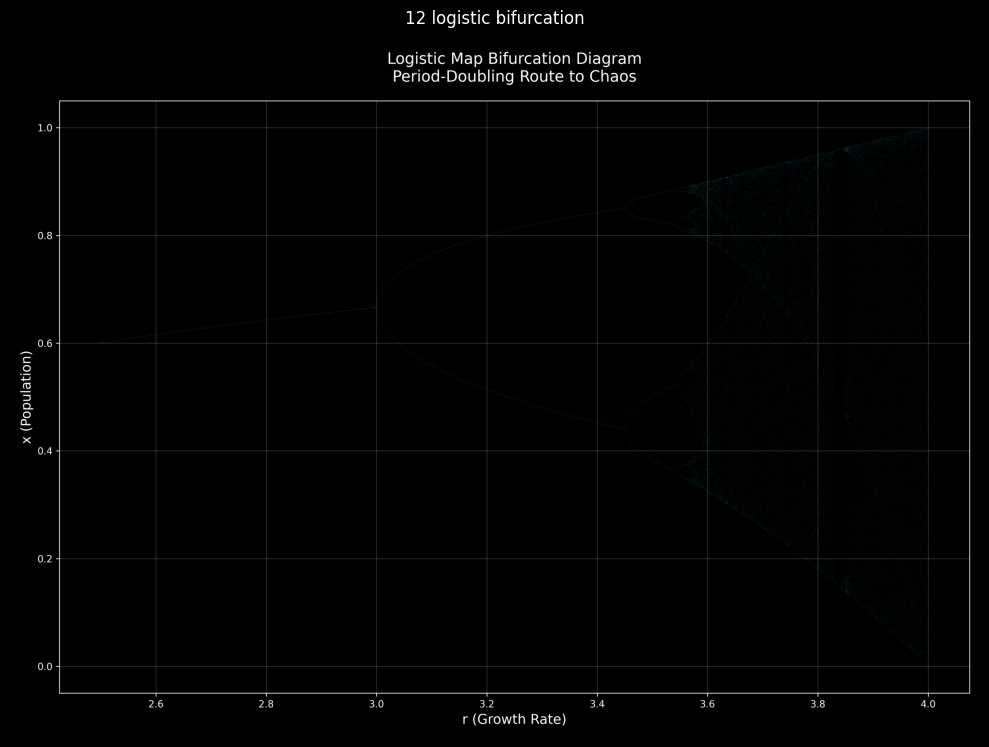

35/40: 12_logistic_bifurcation.png



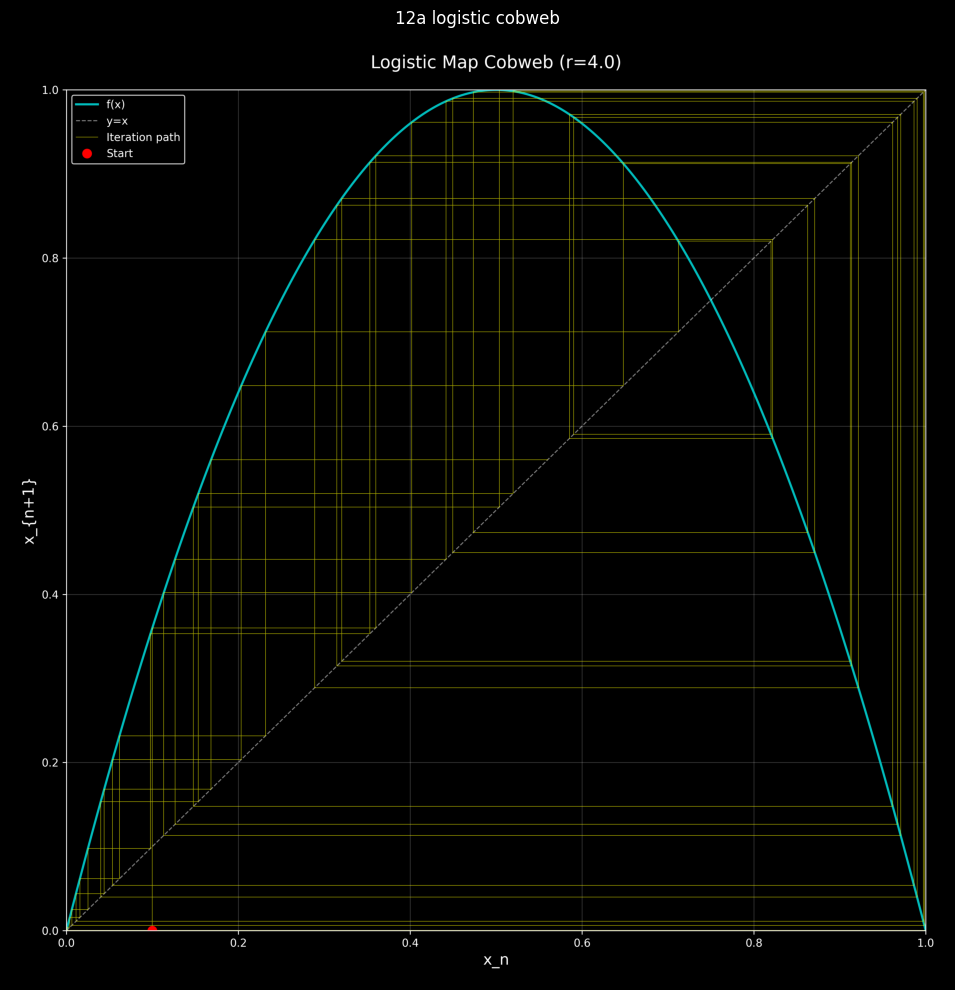

36/40: 12a_logistic_cobweb.png



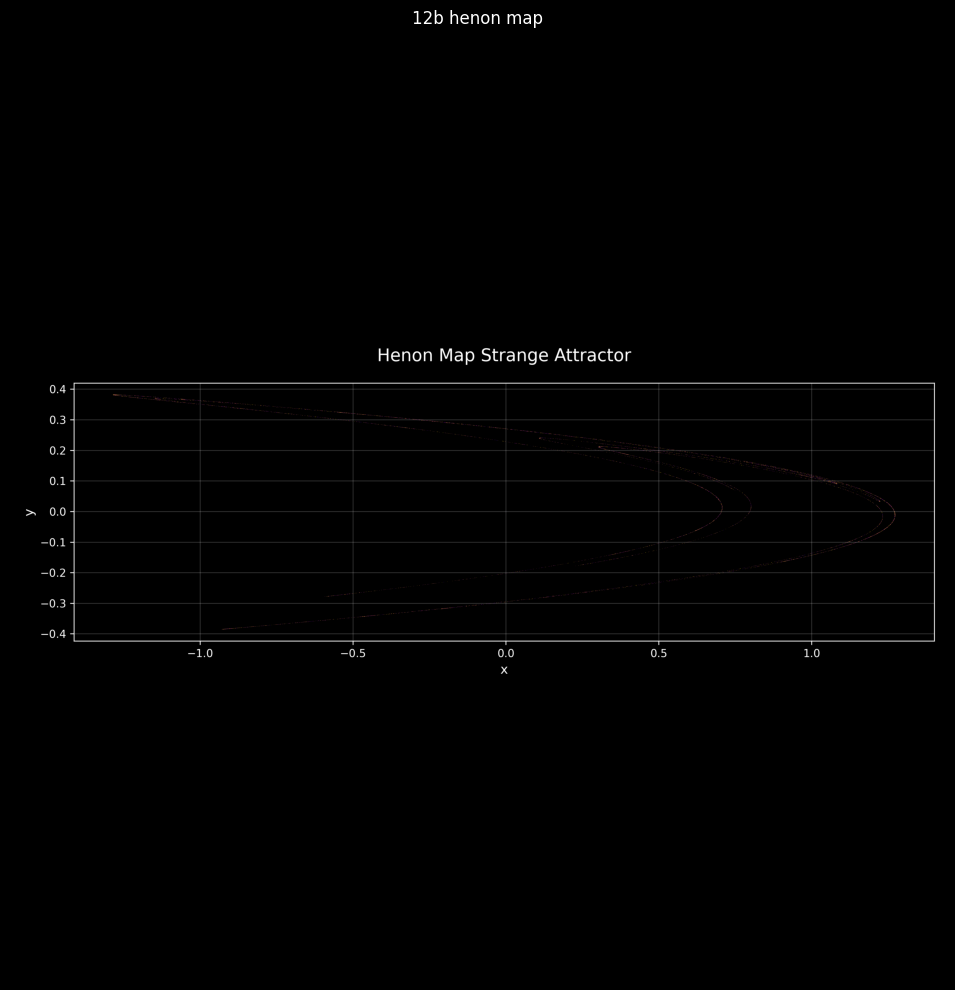

37/40: 12b_henon_map.png



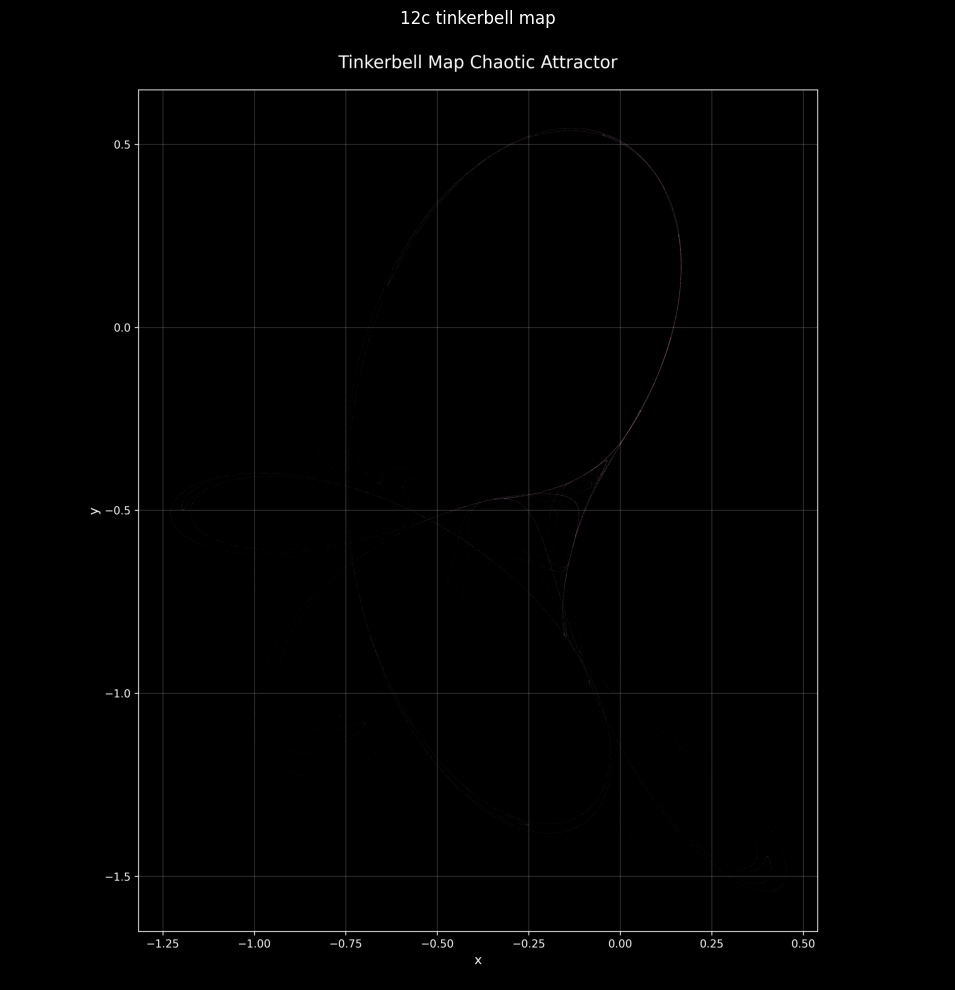

38/40: 12c_tinkerbell_map.png



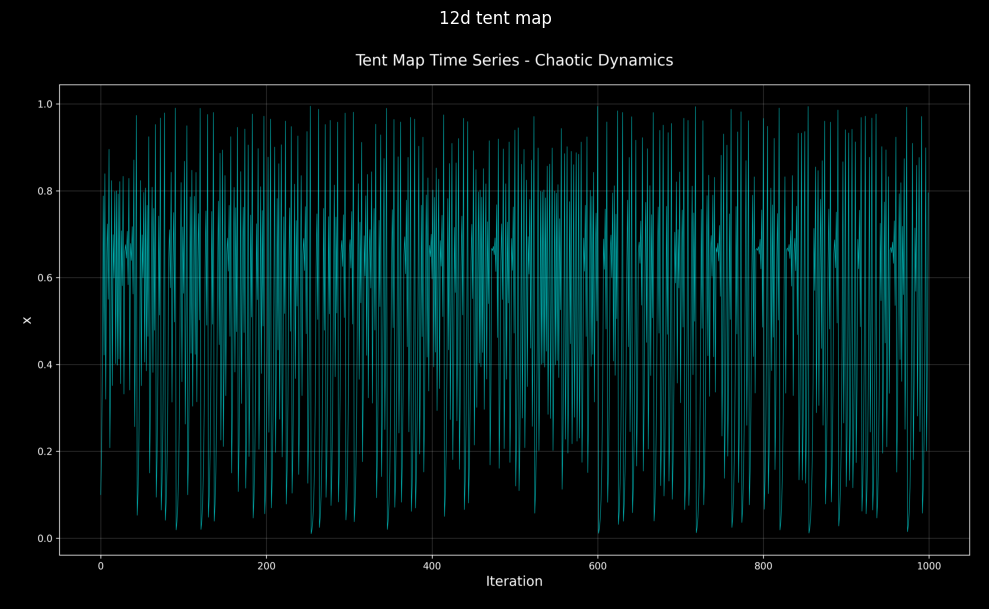

39/40: 12d_tent_map.png



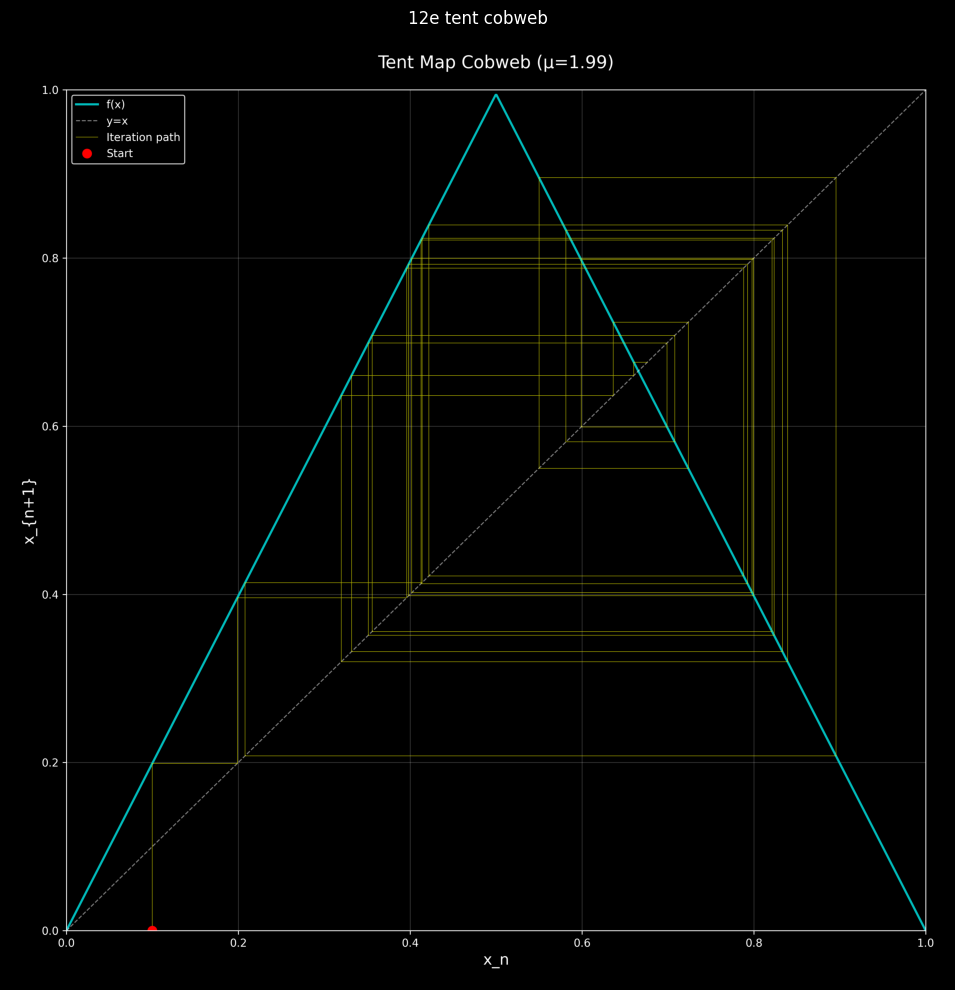

40/40: 12e_tent_cobweb.png



In [39]:
output_dir = "generative_art_gallery"
all_images = sorted([f for f in os.listdir(output_dir) if f.endswith(".png")])

for i, img_name in enumerate(all_images, 1):
    img_path = os.path.join(output_dir, img_name)
    
    plt.figure(figsize=(10, 10))
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name.replace("_", " ").replace(".png", ""), fontsize=12, pad=15)
    plt.tight_layout()
    plt.show()
    
    print(f"{i}/{len(all_images)}: {img_name}\n")